In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

import pingouin as pg
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

from matplotlib import ticker

%matplotlib inline 

from platform import python_version
print(python_version())

3.8.5


In [490]:
#pip install censusdata

In [ ]:
# read in census data at the census tract level

In [5]:
import censusdata

In [146]:
county_codes = {'001': 'Alameda',
                '003': 'Alpine',
                '005': 'Amador',
                '007': 'Butte',
                '009': 'Calaveras',
                '011': 'Colusa',
                '013': 'Contra Costa',
                '015': 'Del Norte',
                '017': 'El Dorado',
                '019': 'Fresno',
                '021': 'Glenn',
                '023': 'Humboldt',
                '025': 'Imperial',
                '027': 'Inyo',
                '029': 'Kern',
                '031': 'Kings',
                '033': 'Lake',
                '035': 'Lassen',
                '037': 'Los Angeles',
                '039': 'Madera',
                '041': 'Marin',
                '043': 'Mariposa',
                '045': 'Mendocino',
                '047': 'Merced',
                '049': 'Modoc',
                '051': 'Mono',
                '053': 'Monterey',
                '055': 'Napa',
                '057': 'Nevada',
                '059': 'Orange',
                '061': 'Placer',
                '063': 'Plumas',
                '065': 'Riverside',
                '067': 'Sacramento',
                '069': 'San Benito',
                '071': 'San Bernadino',
                '073': 'San Diego',
                '075': 'San Francisco',
                '077': 'San Joaquin',
                '079': 'San Luis Obispo',
                '081': 'San Mateo',
                '083': 'Santa Barbara',
                '085': 'Santa Clara',
                '087': 'Santa Cruz',
                '089': 'Shasta',
                '091': 'Sierra',
                '093': 'Siskiyou',
                '095': 'Solano',
                '097': 'Sonoma',
                '099': 'Stanislaus',
                '101': 'Sutter',
                '103': 'Tehama',
                '105': 'Trinity',
                '107': 'Tulare',
                '109': 'Tuolumne',
                '111': 'Ventura',
                '113': 'Yolo',
                '115': 'Yuba'}

census_datapoints = {
 'B01003_001E': 'Total Pop',
 'B03002_003E': 'White Pop',
 'B03002_004E': 'Black Pop',
 'B03002_012E': 'Hispanic Pop',
 'B03002_006E': 'Asian Pop',
 
 'B19001_001E': 'Tot HHs',
 'B19001_002E': 'HH < 10K',
 'B19001_003E': '10k < HH < 15K',
 'B19001_004E': '15k < HH < 20K',
 'B19001_005E': '20k < HH < 25K',
 'B19001_006E': '25k < HH < 30K',
 'B19001_007E': '30k < HH < 35K',
 'B19001_008E': '35k < HH < 40K',
 'B19001_009E': '40k < HH < 45K',
 'B19001_010E': '45k < HH < 50K',
 'B19001_011E': '50k < HH < 60K',
 'B19001_012E': '60k < HH < 75K',
 'B19001_013E': '75k < HH < 100K',
 'B19001_014E': '100k < HH < 125K',
 'B19001_015E': '125k < HH < 150K',
 'B19001_016E': '150k < HH < 200K',
 'B19001_017E': '200k < HH',
 
 'B23025_005E': 'Unemployed Labor Force',
 'B23025_003E': 'Labor Force',
 
 'B06009_001E': 'Education Known',
 'B06009_002E': 'Less than HS',
 'B06009_003E': 'HS',
 'B06009_004E': 'Some College',
 'B06009_005E': 'College',
 'B06009_006E': 'Graduate',
 
 'B25003_001E': 'Houses',
 'B25003_002E': 'Owner-occupied houses',
 
 'B25109_001E': 'Median house price',

 'B27011_001E': 'Insurance Denominator',   
 'B27011_007E': 'Uninsured Numerator 1',
 'B27011_012E': 'Uninsured Numerator 2',
 'B27011_017E': 'Uninsured Numerator 3',
    
 'B01001_001E': 'Total Population',
 'B01001_003E': 'Under 18 1',
 'B01001_004E': 'Under 18 2',
 'B01001_005E': 'Under 18 3', 
 'B01001_006E': 'Under 18 4',
 'B01001_027E': 'Under 18 5',
 'B01001_028E': 'Under 18 6', 
 'B01001_029E': 'Under 18 7',
 'B01001_030E': 'Under 18 8',
    
 'B01001_007E': '18 - 40 1',
 'B01001_008E': '18 - 40 2',    
 'B01001_009E': '18 - 40 3',  
 'B01001_010E': '18 - 40 4',
 'B01001_011E': '18 - 40 5',    
 'B01001_012E': '18 - 40 6',    
 'B01001_013E': '18 - 40 7',  
 'B01001_031E': '18 - 40 8',
 'B01001_032E': '18 - 40 9',    
 'B01001_033E': '18 - 40 10',  
 'B01001_034E': '18 - 40 11',
 'B01001_035E': '18 - 40 12',    
 'B01001_036E': '18 - 40 13',    
 'B01001_037E': '18 - 40 14',
    
 'B01001_014E': '40 - 60 1',
 'B01001_015E': '40 - 60 2',    
 'B01001_016E': '40 - 60 3',  
 'B01001_017E': '40 - 60 4',
 'B01001_038E': '40 - 60 5',    
 'B01001_039E': '40 - 60 6',    
 'B01001_040E': '40 - 60 7',  
 'B01001_041E': '40 - 60 8',
    
 'B01001_018E': '60 - 80 1',
 'B01001_019E': '60 - 80 2',    
 'B01001_020E': '60 - 80 3',  
 'B01001_021E': '60 - 80 4',
 'B01001_022E': '60 - 80 5',    
 'B01001_023E': '60 - 80 6', 
 'B01001_042E': '60 - 80 7',
 'B01001_043E': '60 - 80 8',    
 'B01001_044E': '60 - 80 9',  
 'B01001_045E': '60 - 80 10',
 'B01001_046E': '60 - 80 11',    
 'B01001_047E': '60 - 80 12'
 }
        

county_data = []
for county in county_codes.keys():
    county_data.append(censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '06') , 
                                        ('county',county),
                                         ('tract', '*')]), 
                                         list(census_datapoints.keys())))
df = pd.concat(county_data)
df['Census ID'] = df.index
df['Tract'] = df['Census ID'].apply(lambda x: str(x).split('tract:')[-1]) #.astype(int)
df['County Code'] = df['Census ID'].apply(lambda x: str(x).split('county:')[-1][:3])
df['County'] = df['County Code'].map(county_codes)
df['GEOID'] = ('6' + df['County Code'] + df['Tract'].astype(str)).astype(int)
del df['Census ID']

In [147]:
#download the square mileage of each zip code

gazeteer_url = 'https://www2.census.gov/geo/docs/maps-data/data/gazetteer/2019_Gazetteer/2019_gaz_tracts_06.txt'
census_tract_geometry = pd.read_table(gazeteer_url)
df = pd.merge(df,census_tract_geometry[['GEOID', 'ALAND_SQMI']], on='GEOID')
df.rename(columns={'ALAND_SQMI':'Square Miles'}, inplace=True)

In [148]:
# join the food security data from the UCSF Health Atlas

df_health_atlas = pd.read_csv('Health_Atlas_Data.csv')
df = pd.merge(df, df_health_atlas[['geoid', 'food_insecurity', 'pct_snap', 'lila_tracts']],
         how='left', left_on= 'GEOID', right_on = 'geoid')

In [149]:
# join the calenviroscreen 3.0 data

df_enviro = pd.read_excel('ces3results.xlsx')
df = pd.merge(df, df_enviro[['Census Tract', 'ZIP', 'Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Pesticides', 'Tox. Release', 'Traffic']],
          how='left', left_on= 'GEOID', right_on = 'Census Tract')

In [150]:
# clean up

df = df.rename(columns=census_datapoints)

df['frac_white'] = df['White Pop'] / df['Total Pop']
df['frac_black'] = df['Black Pop'] / df['Total Pop']
df['frac_hispanic'] = df['Hispanic Pop'] / df['Total Pop']
df['frac_asian'] = df['Asian Pop'] / df['Total Pop']
df['frac_other'] = 1 - df.frac_white - df.frac_black - df.frac_hispanic - df.frac_asian

df['frac_under_18'] = (df['Under 18 1'] + df['Under 18 2'] + df['Under 18 3'] + df['Under 18 4'] + df['Under 18 5'] + df['Under 18 6'] + df['Under 18 7'] + df['Under 18 8']) / df['Total Population']
df['frac_18_to_40'] = (df['18 - 40 1'] + df['18 - 40 2'] + df['18 - 40 3'] + df['18 - 40 4'] + df['18 - 40 5'] + df['18 - 40 6'] + df['18 - 40 7'] + df['18 - 40 8'] + df['18 - 40 9'] + df['18 - 40 10'] + df['18 - 40 11'] + df['18 - 40 12'] + df['18 - 40 13'] + df['18 - 40 14']) / df['Total Population']
df['frac_40_to_60'] = (df['40 - 60 1'] + df['40 - 60 2'] + df['40 - 60 3'] + df['40 - 60 4'] + df['40 - 60 5'] + df['40 - 60 6'] + df['40 - 60 7'] + df['40 - 60 8']) / df['Total Population']
df['frac_60_to_80'] = (df['60 - 80 1'] + df['60 - 80 2'] + df['60 - 80 3'] + df['60 - 80 4'] + df['60 - 80 5'] + df['60 - 80 6'] + df['60 - 80 7'] + df['60 - 80 8'] + df['60 - 80 9'] + df['60 - 80 10'] + df['60 - 80 11'] + df['60 - 80 12']) / df['Total Population']
df['frac_80_plus'] = 1 - df.frac_under_18 - df.frac_18_to_40 - df.frac_40_to_60 - df.frac_60_to_80

df['frac_lt_15k'] = (df['HH < 10K'] + df['10k < HH < 15K']) / df['Tot HHs']
df['frac_15k_to_30k'] = (df['15k < HH < 20K'] + df['20k < HH < 25K'] + df['25k < HH < 30K']) / df['Tot HHs']
df['frac_30k_to_45k'] = (df['30k < HH < 35K'] + df['35k < HH < 40K'] + df['40k < HH < 45K']) / df['Tot HHs']
df['frac_45k_to_60k'] = (df['45k < HH < 50K'] + df['50k < HH < 60K']) / df['Tot HHs']
df['frac_60k_to_100k'] = (df['60k < HH < 75K'] + df['75k < HH < 100K']) / df['Tot HHs']
df['frac_100k_to_125k'] = (df['100k < HH < 125K'] ) / df['Tot HHs']
df['frac_125k_to_200k'] = (df['125k < HH < 150K'] + df['150k < HH < 200K']) / df['Tot HHs']
df['frac_gt_200k'] = (df['200k < HH']) / df['Tot HHs']

df['frac_unemployed'] = df['Unemployed Labor Force'] / df['Labor Force']
df['frac_no_health_insurance'] = (df['Uninsured Numerator 1'] + df['Uninsured Numerator 2'] + df['Uninsured Numerator 3'])/df['Insurance Denominator']

df['frac_lt_hs'] = df['Less than HS'] / df['Education Known']
df['frac_hs'] = df['HS'] / df['Education Known']
df['frac_some_college'] = df['Some College'] / df['Education Known']
df['frac_college'] = df['College'] / df['Education Known']
df['frac_graduate'] = df['Graduate'] / df['Education Known']

df['frac_houses_owner_occupied'] = df['Owner-occupied houses'] / df['Houses']

df['pop_density'] = df['Total Pop'] / df['Square Miles']

df['median_house_price'] = df['Median house price']

df = df[['GEOID', 'Tract', 'County Code', 'County','ZIP', 'Square Miles',
     'Total Pop', 'pop_density',
     'frac_white', 'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
     'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 'frac_80_plus',
     'frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
           'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k', 'frac_gt_200k', 
     'frac_unemployed',  'frac_no_health_insurance',
     'frac_lt_hs', 'frac_hs', 'frac_some_college', 'frac_college', 'frac_graduate',
     'frac_houses_owner_occupied', 
     'median_house_price', 
     'food_insecurity', 'pct_snap', 'lila_tracts',
     'Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Pesticides', 'Tox. Release', 'Traffic']]

In [151]:
df.loc[df.median_house_price < 0, 'median_house_price'] = df.loc[df.median_house_price > 0, 'median_house_price'].min()

df['pct_snap'] = df['pct_snap'].mask(df.pct_snap == 'N').astype(float).fillna(0)
df['lila_tracts'] = df['lila_tracts'].mask(df.lila_tracts == 'N').astype(float).fillna(0)

In [152]:
# histograms

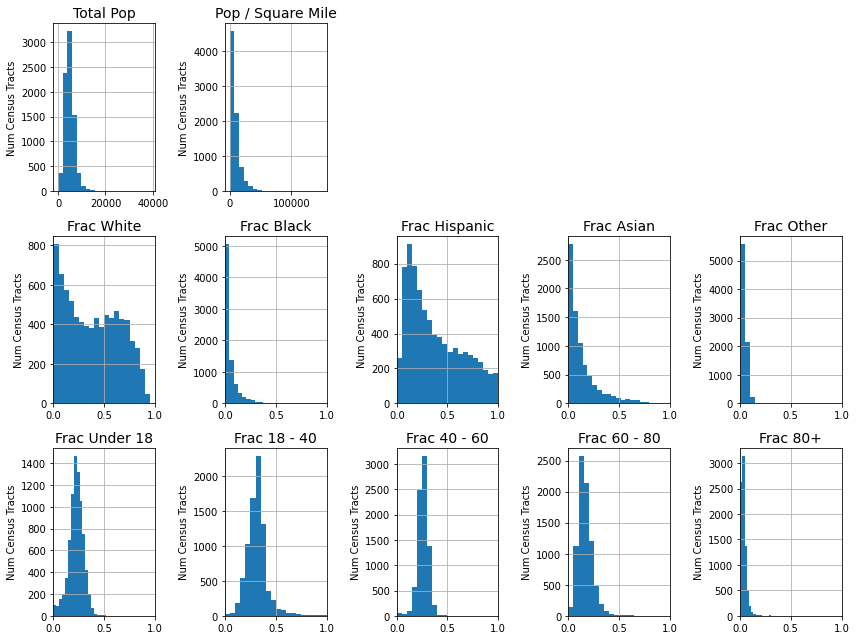

In [153]:
plt.figure(figsize=(12,9))

plt.subplot(3,5,1)
df['Total Pop'].hist(bins=20)
plt.title('Total Pop', fontsize=14)
plt.ylabel('Num Census Tracts')

plt.subplot(3,5,2)
df['pop_density'].hist(bins=20)
plt.title('Pop / Square Mile', fontsize=14)
plt.ylabel('Num Census Tracts')

plt.subplot(3,5,6)
df['frac_white'].hist(bins=20)
plt.title('Frac White', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,7)
df['frac_black'].hist(bins=20)
plt.title('Frac Black', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,8)
df['frac_hispanic'].hist(bins=20)
plt.title('Frac Hispanic', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,9)
df['frac_asian'].hist(bins=20)
plt.title('Frac Asian', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,10)
df['frac_other'].hist(bins=20)
plt.title('Frac Other', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,11)
df['frac_under_18'].hist(bins=20)
plt.title('Frac Under 18', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,12)
df['frac_18_to_40'].hist(bins=20)
plt.title('Frac 18 - 40', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,13)
df['frac_40_to_60'].hist(bins=20)
plt.title('Frac 40 - 60', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,14)
df['frac_60_to_80'].hist(bins=20)
plt.title('Frac 60 - 80', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,15)
df['frac_80_plus'].hist(bins=20)
plt.title('Frac 80+', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])
plt.tight_layout()


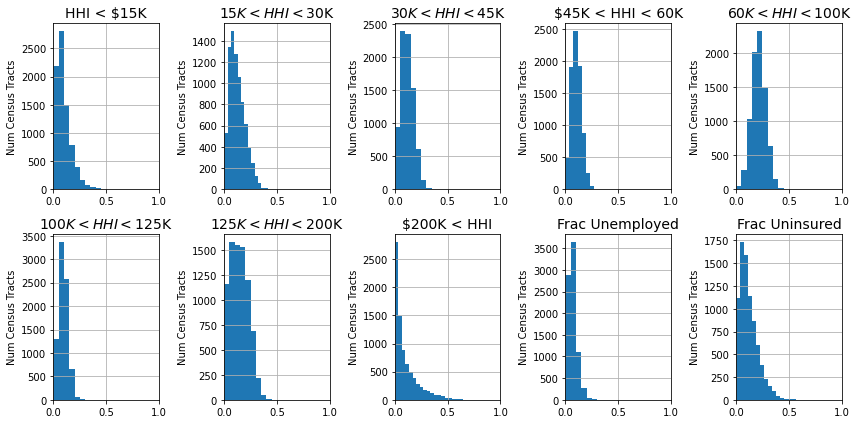

In [154]:
plt.figure(figsize=(12,6))

plt.subplot(2,5,1)
df['frac_lt_15k'].hist(bins=20)
plt.title('HHI < $15K', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,2)
df['frac_15k_to_30k'].hist(bins=20)
plt.title('$15K < HHI < $30K', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,3)
df['frac_30k_to_45k'].hist(bins=20)
plt.title('$30K < HHI < $45K', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,4)
df['frac_45k_to_60k'].hist(bins=20)
plt.title('$45K < HHI < 60K', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,5)
df['frac_60k_to_100k'].hist(bins=20)
plt.title('$60K < HHI < $100K', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,6)
df['frac_100k_to_125k'].hist(bins=20)
plt.title('$100K < HHI < $125K', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,7)
df['frac_125k_to_200k'].hist(bins=20)
plt.title('$125K < HHI < $200K', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,8)
df['frac_gt_200k'].hist(bins=20)
plt.title('$200K < HHI', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,9)
df['frac_unemployed'].hist(bins=20)
plt.title('Frac Unemployed', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,10)
df['frac_no_health_insurance'].hist(bins=20)
plt.title('Frac Uninsured', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.tight_layout()


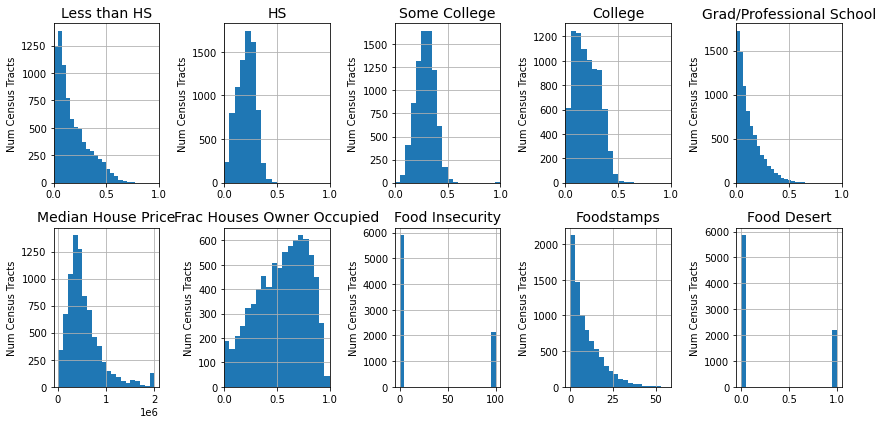

In [155]:
plt.figure(figsize=(12,6))

plt.subplot(2,5,1)
df['frac_lt_hs'].hist(bins=20)
plt.title('Less than HS', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,2)
df['frac_hs'].hist(bins=20)
plt.title('HS', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,3)
df['frac_some_college'].hist(bins=20)
plt.title('Some College', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,4)
df['frac_college'].hist(bins=20)
plt.title('College', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,5)
df['frac_graduate'].hist(bins=20)
plt.title('Grad/Professional School', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,6)
df['median_house_price'].hist(bins=20)
plt.title('Median House Price', fontsize=14)
plt.ylabel('Num Census Tracts')

plt.subplot(2,5,7)
df['frac_houses_owner_occupied'].hist(bins=20)
plt.title('Frac Houses Owner Occupied', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,8)
df['food_insecurity'].hist(bins=20)
plt.title('Food Insecurity', fontsize=14)
plt.ylabel('Num Census Tracts')

plt.subplot(2,5,9)
df['pct_snap'].hist(bins=20)
plt.title('Foodstamps', fontsize=14)
plt.ylabel('Num Census Tracts')

plt.subplot(2,5,10)
df['lila_tracts'].hist(bins=20)
plt.title('Food Desert', fontsize=14)
plt.ylabel('Num Census Tracts')



plt.tight_layout()

In [188]:
np.ones(len(df)) / len(df)

array([0.00012412, 0.00012412, 0.00012412, ..., 0.00012412, 0.00012412,
       0.00012412])

In [190]:
len(df)

8057

In [192]:
df['Ozone'].isna().sum()

23

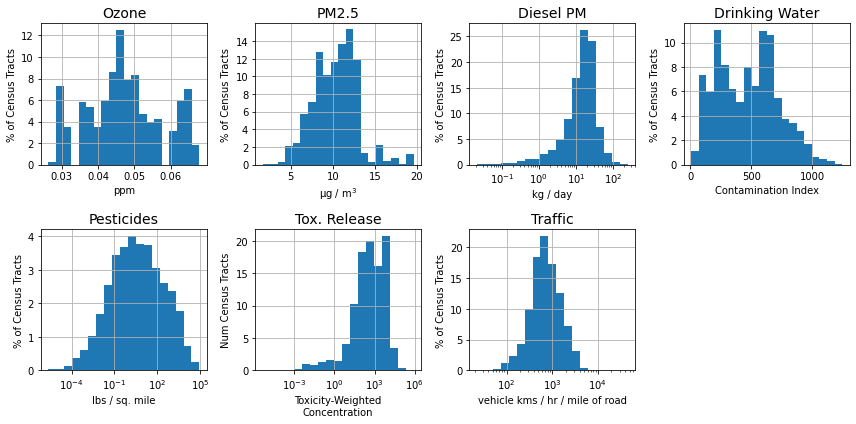

In [217]:
plt.figure(figsize=(12,6))

plt.subplot(2,4,1)
df['Ozone'].hist(bins=20,
                 weights=100 * np.ones(len(df[~df['Ozone'].isna()])) / len(df))
plt.title('Ozone', fontsize=14)
plt.ylabel('% of Census Tracts')
plt.xlabel('ppm')

plt.subplot(2,4,2)
df['PM2.5'].hist(bins=20,
                 weights=100 * np.ones(len(df[~df['PM2.5'].isna()])) / len(df))
plt.title('PM2.5', fontsize=14)
plt.ylabel('% of Census Tracts')
plt.xlabel('\u03BCg / m$^3$')
plt.ylim([0,16])
ax = plt.gca()
locs = np.array([0,2,4,6,8,10,12,14])
ax.set_yticks(locs)

plt.subplot(2,4,3)
df['Diesel PM'].hist(bins=np.logspace(np.log10(df['Diesel PM'].min()),np.log10(df['Diesel PM'].max()), 20),
                 weights=100 * np.ones(len(df[~df['Diesel PM'].isna()])) / len(df))
plt.title('Diesel PM', fontsize=14)
plt.ylabel('% of Census Tracts')
plt.xlabel('kg / day')
plt.gca().set_xscale("log")

plt.subplot(2,4,4)
df['Drinking Water'].hist(bins=20,
                 weights=100 * np.ones(len(df[~df['Drinking Water'].isna()])) / len(df))
plt.title('Drinking Water', fontsize=14)
plt.ylabel('% of Census Tracts')
plt.xlabel('Contamination Index')

plt.subplot(2,4,5)
df[df.Pesticides > 0]['Pesticides'].hist(bins=np.logspace(np.log10(df[df.Pesticides > 0]['Pesticides'].min()),np.log10(df['Pesticides'].max()), 20),
                 weights=100 * np.ones(len(df[df['Pesticides']>0])) / len(df))
plt.title('Pesticides', fontsize=14)
plt.ylabel('% of Census Tracts')
plt.xlabel('lbs / sq. mile')
plt.gca().set_xscale("log")

plt.subplot(2,4,6)   
df[df['Tox. Release'] > 0]['Tox. Release'].hist(bins=np.logspace(np.log10(df[df['Tox. Release'] > 0]['Tox. Release'].min()),np.log10(df['Tox. Release'].max()), 20),
                 weights=100 * np.ones(len(df[df['Tox. Release']>0])) / len(df))
plt.title('Tox. Release', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlabel('Toxicity-Weighted\nConcentration')
plt.gca().set_xscale("log")

plt.subplot(2,4,7)
df[df['Traffic'] > 0]['Traffic'].hist(bins=np.logspace(np.log10(df[df['Traffic'] > 0]['Traffic'].min()),np.log10(df['Traffic'].max()), 20),
                 weights=100 * np.ones(len(df[df['Traffic']>0])) / len(df))
plt.title('Traffic', fontsize=14)
plt.ylabel('% of Census Tracts')
plt.gca().set_xscale("log")
plt.xlabel('vehicle kms / hr / mile of road')

plt.tight_layout()
plt.savefig('enviro_histos.jpg')

In [213]:
len(df[df['Pesticides'] == 0]) / len(df[~df['Pesticides'].isna()])*100

64.05277570326115

In [214]:
len(df[df['Tox. Release'] == 0]) / len(df[~df['Tox. Release'].isna()])*100

0.21160069703759027

In [218]:
# correlation matrices

<AxesSubplot:>

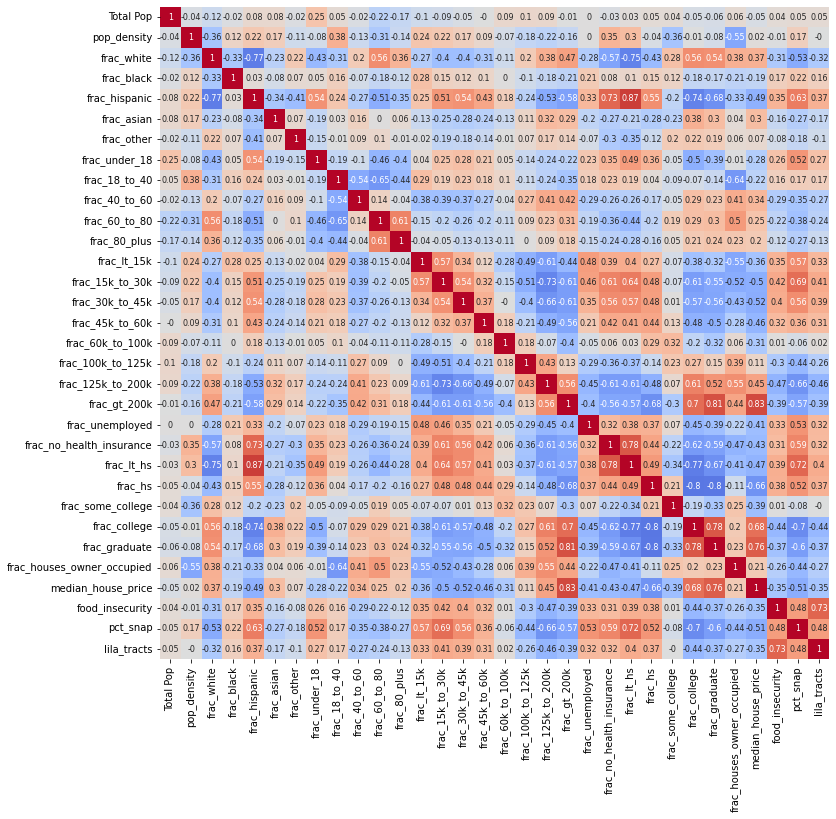

In [219]:
plt.figure(figsize=(12,12))

corr_mat =  df[['Total Pop', 'pop_density',
     'frac_white', 'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
     'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 'frac_80_plus',           
     'frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
           'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k', 'frac_gt_200k', 
     'frac_unemployed', 'frac_no_health_insurance',
     'frac_lt_hs', 'frac_hs', 'frac_some_college', 'frac_college', 'frac_graduate',
     'frac_houses_owner_occupied', 
     'median_house_price', 
     'food_insecurity', 'pct_snap', 'lila_tracts']].corr()

sns.heatmap(corr_mat,
           cmap = "coolwarm",  vmin=-1, vmax=1, cbar=False, robust=True, annot = np.round(corr_mat,2),
                annot_kws={'size':8})

<AxesSubplot:>

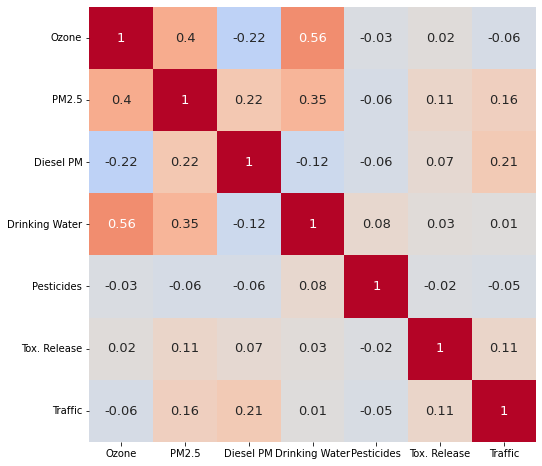

In [220]:
plt.figure(figsize=(8,8))

corr_mat = df[['Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Pesticides', 'Tox. Release', 'Traffic']].corr()

sns.heatmap(corr_mat,
           cmap = "coolwarm",  vmin=-1, vmax=1,  cbar=False, robust=True, annot = np.round(corr_mat,2),
                annot_kws={'size':13})

In [221]:
# regressions

In [222]:
features = ['Total Pop', 'pop_density',
      'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
     'frac_lt_15k',       
            'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k', 'frac_gt_200k', 
            'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 'frac_80_plus',
     'frac_unemployed', 'frac_no_health_insurance',
     'frac_hs', 'frac_some_college', 'frac_college', 'frac_graduate',
     'frac_houses_owner_occupied', 
     'median_house_price', 
     'food_insecurity', 'pct_snap', 'lila_tracts']
X = sm.add_constant(df[features] )
X = X.fillna(X.mean())

y = np.array(df['PM2.5'].fillna(0))

est = sm.OLS(y.astype(float), X.astype(float)).fit() 
est.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:                 OLS                Adj. R-squared:       0.207     
Dependent Variable:    y                  AIC:                  37014.1510
Date:                  2022-06-23 14:03   BIC:                  37202.9970
No. Observations:      8057               Log-Likelihood:       -18480.   
Df Model:              26                 F-statistic:          81.72     
Df Residuals:          8030               Prob (F-statistic):   0.00      
R-squared:             0.209              Scale:                5.7708    
--------------------------------------------------------------------------
                            Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------------
const                       3.9038   0.4869  8.0176 0.0000  2.9493  4.8582
Total Pop                   0.0000   0.0000  1.4220 0.1551 -0.0000  0.0000
pop_density                 0.0000   0.0000  1.1611 0.2456 -0.0000  0.0000
frac_black                  2.2906   0.3424  6.6905 0.0000  1.6194  2.9617
frac_hispanic               5.9126   0.2765 21.3833 0.0000  5.3706  6.4546
frac_asian                  2.2477   0.2148 10.4651 0.0000  1.8267  2.6688
frac_other                 -5.3747   0.8785 -6.1182 0.0000 -7.0967 -3.6526
frac_lt_15k                -0.0913   0.6358 -0.1436 0.8858 -1.3376  1.1550
frac_60k_to_100k           -0.8021   0.5737 -1.3982 0.1621 -1.9268  0.3225
frac_100k_to_125k          -0.6389   0.8061 -0.7926 0.4280 -2.2190  0.9412
frac_125k_to_200k          -1.1526   0.5902 -1.9530 0.0509 -2.3095  0.0043
frac_gt_200k               -0.4295   0.6742 -0.6370 0.5241 -1.7510  0.8921
frac_under_18              -1.2595   0.4854 -2.5949 0.0095 -2.2109 -0.3080
frac_18_to_40               0.4989   0.3280  1.5209 0.1283 -0.1441  1.1420
frac_40_to_60               2.5576   0.5258  4.8645 0.0000  1.5270  3.5883
frac_60_to_80              -4.2579   0.6149 -6.9246 0.0000 -5.4633 -3.0526
frac_80_plus                6.3646   0.9952  6.3952 0.0000  4.4138  8.3155
frac_unemployed             3.9871   0.8207  4.8579 0.0000  2.3782  5.5960
frac_no_health_insurance   -2.9292   0.5649 -5.1851 0.0000 -4.0366 -1.8218
frac_hs                     3.1231   0.6803  4.5906 0.0000  1.7895  4.4567
frac_some_college           2.7581   0.5667  4.8667 0.0000  1.6472  3.8691
frac_college                7.3182   0.6456 11.3351 0.0000  6.0526  8.5837
frac_graduate               3.7684   0.7014  5.3730 0.0000  2.3936  5.1432
frac_houses_owner_occupied  0.5196   0.2305  2.2545 0.0242  0.0678  0.9715
median_house_price          0.0000   0.0000  0.8939 0.3714 -0.0000  0.0000
food_insecurity            -0.0015   0.0009 -1.5850 0.1130 -0.0033  0.0004
pct_snap                    0.0697   0.0058 11.9395 0.0000  0.0583  0.0812
lila_tracts                -0.3031   0.0915 -3.3111 0.0009 -0.4825 -0.1237
--------------------------------------------------------------------------
Omnibus:             517.487      Durbin-Watson:         0.555            
Prob(Omnibus):       0.000        Jarque-Bera (JB):      2400.238         
Skew:                0.073        Prob(JB):              0.000            
Kurtosis:            5.670        Condition No.:         14871312795417132
==========================================================================
* The condition number is large (1e+16). This might indicate
strong multicollinearity or other numerical problems.
"""

In [223]:
features = ['Total Pop', 'pop_density',
      'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
            'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 'frac_80_plus',
     'frac_lt_15k',       
            'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k', 'frac_gt_200k', 
     'frac_unemployed', 'frac_no_health_insurance',
     'frac_hs', 'frac_some_college', 'frac_college', 'frac_graduate',
     'frac_houses_owner_occupied', 
     'median_house_price', 
     'food_insecurity', 'pct_snap', 'lila_tracts']
X = sm.add_constant(df[features] )
X = X.fillna(X.mean())

y = np.array(df['Pesticides'].fillna(0))

est = sm.OLS(y.astype(float), X.astype(float)).fit() 
est.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
====================================================================================
Model:                    OLS                   Adj. R-squared:          0.025      
Dependent Variable:       y                     AIC:                     150422.2279
Date:                     2022-06-23 14:03      BIC:                     150611.0739
No. Observations:         8057                  Log-Likelihood:          -75184.    
Df Model:                 26                    F-statistic:             9.056      
Df Residuals:             8030                  Prob (F-statistic):      4.78e-35   
R-squared:                0.028                 Scale:                   7.4859e+06 
------------------------------------------------------------------------------------
                             Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
------------------------------------------------------------------------------------
const                       2905.1592  554.5591  5.2387 0.0000  1818.0795  3992.2390
Total Pop                      0.0214    0.0147  1.4569 0.1452    -0.0074     0.0501
pop_density                   -0.0289    0.0043 -6.7476 0.0000    -0.0372    -0.0205
frac_black                  -826.4643  389.9279 -2.1195 0.0341 -1590.8241   -62.1044
frac_hispanic                151.5793  314.9241  0.4813 0.6303  -465.7536   768.9122
frac_asian                  -405.4707  244.6276 -1.6575 0.0975  -885.0043    74.0629
frac_other                   344.3231 1000.5394  0.3441 0.7308 -1616.9937  2305.6399
frac_under_18               1387.4274  552.8145  2.5098 0.0121   303.7675  2471.0873
frac_18_to_40                505.3069  373.6251  1.3524 0.1763  -227.0953  1237.7090
frac_40_to_60              -2323.0485  598.8326 -3.8793 0.0001 -3496.9158 -1149.1812
frac_60_to_80                769.7844  700.3369  1.0992 0.2717  -603.0577  2142.6264
frac_80_plus                2565.6891 1133.4999  2.2635 0.0236   343.7352  4787.6429
frac_lt_15k                -1065.6217  724.1215 -1.4716 0.1412 -2485.0877   353.8443
frac_60k_to_100k             828.7443  653.4361  1.2683 0.2047  -452.1600  2109.6485
frac_100k_to_125k           2113.9959  918.0499  2.3027 0.0213   314.3800  3913.6119
frac_125k_to_200k            475.3162  672.1649  0.7071 0.4795  -842.3013  1792.9337
frac_gt_200k                 895.2587  767.8249  1.1660 0.2437  -609.8773  2400.3947
frac_unemployed             -600.8340  934.7866 -0.6427 0.5204 -2433.2584  1231.5904
frac_no_health_insurance    1109.0573  643.4251  1.7237 0.0848  -152.2228  2370.3373
frac_hs                    -4387.7592  774.8567 -5.6627 0.0000 -5906.6794 -2868.8391
frac_some_college          -2623.9649  645.4794 -4.0651 0.0000 -3889.2720 -1358.6578
frac_college               -2676.0752  735.3238 -3.6393 0.0003 -4117.5007 -1234.6497
frac_graduate              -3274.7020  798.8059 -4.0995 0.0000 -4840.5688 -1708.8352
frac_houses_owner_occupied  -269.4746  262.5159 -1.0265 0.3047  -784.0739   245.1247
median_house_price            -0.0002    0.0002 -1.0596 0.2894    -0.0005     0.0002
food_insecurity               -1.1622    1.0693 -1.0869 0.2771    -3.2583     0.9339
pct_snap                     -16.5967    6.6508 -2.4954 0.0126   -29.6340    -3.5594
lila_tracts                   76.3274  104.2531  0.7321 0.4641  -128.0357   280.6906
------------------------------------------------------------------------------------
Omnibus:               16797.544         Durbin-Watson:            1.509            
Prob(Omnibus):         0.000             Jarque-Bera (JB):         59893135.467     
Skew:                  17.897            Prob(JB):                 0.000            
Kurtosis:              423.865           Condition No.:            14871312795482988
====================================================================================
* The condition number is large (1e+16). This might indicate        

<AxesSubplot:>

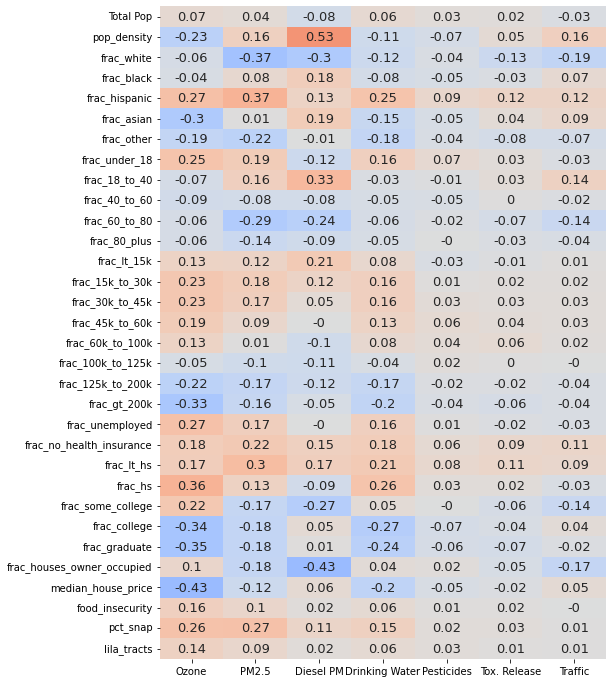

In [224]:
plt.figure(figsize=(8,12))

corr_mat =  df[['Total Pop', 'pop_density',
     'frac_white', 'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
                'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 'frac_80_plus',
     'frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
           'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k', 'frac_gt_200k', 
     'frac_unemployed', 'frac_no_health_insurance',
     'frac_lt_hs', 'frac_hs', 'frac_some_college', 'frac_college', 'frac_graduate',
     'frac_houses_owner_occupied', 
     'median_house_price', 
     'food_insecurity', 'pct_snap', 'lila_tracts', 
     'Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Pesticides', 'Tox. Release', 'Traffic']].corr()

corr_mat = corr_mat[corr_mat.index.isin(['Total Pop', 'pop_density',
     'frac_white', 'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
     'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 'frac_80_plus',
     'frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
           'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k', 'frac_gt_200k', 
     'frac_unemployed', 'frac_no_health_insurance',
     'frac_lt_hs', 'frac_hs', 'frac_some_college', 'frac_college', 'frac_graduate',
     'frac_houses_owner_occupied', 
     'median_house_price', 
     'food_insecurity', 'pct_snap', 'lila_tracts'])][['Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Pesticides', 'Tox. Release', 'Traffic']]

sns.heatmap(corr_mat,
           cmap = "coolwarm",  vmin=-1, vmax=1,  cbar=False, robust=True, annot = np.round(corr_mat,2),
                annot_kws={'size':13})

In [225]:
# roll up to the zip code level level

In [226]:
df_crosswalk = pd.read_excel('TRACT_ZIP_032019.xlsx')

In [227]:
df_temp = pd.merge(df, df_crosswalk[['tract', 'zip', 'res_ratio']], left_on = 'GEOID', right_on = 'tract')
df_temp = df_temp[(df_temp['Total Pop'] > 0) & (df_temp['res_ratio'] > 0)]

In [228]:
weighted_sum_metrics = ['Total Pop', 'Square Miles']
weighted_average_metrics = [
     'frac_white', 'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
    'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 'frac_80_plus',
     'frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
           'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k', 'frac_gt_200k', 
     'frac_unemployed', 'frac_no_health_insurance',
     'frac_lt_hs', 'frac_hs', 'frac_some_college', 'frac_college', 'frac_graduate',
     'frac_houses_owner_occupied', 
     'median_house_price', 
     'food_insecurity', 'pct_snap', 'lila_tracts', 
     'Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Pesticides', 'Tox. Release', 'Traffic']

def weighted_sum(group, column, weight):
    x = group[column]
    w = group[weight]
    return (x * w).sum()

def weighted_avg(group, column, weight):
    x = group[column]
    w = group[weight]
    return (x * w).sum() /  w.sum()

df_zip = pd.DataFrame(df_temp.zip.unique(), columns = ['zip'])

for column in weighted_sum_metrics:
    df_zip = pd.merge(df_zip, pd.DataFrame(df_temp.groupby('zip').apply(weighted_sum, column, 'res_ratio'), 
                               columns = [column]), on='zip')
    
for column in weighted_average_metrics:
    df_zip = pd.merge(df_zip, pd.DataFrame(df_temp.groupby('zip').apply(weighted_avg, column, 'res_ratio'), 
                               columns = [column]), on='zip')


In [229]:
df_zip['ZIP'] = df_zip.zip.astype(float)
df_zip = pd.merge(df_zip, df_temp.groupby('zip')['County Code'].agg(lambda x:x.value_counts().index[0]), on='zip', how='left')
df_zip = pd.merge(df_zip, df_temp.groupby('zip')['County'].agg(lambda x:x.value_counts().index[0]), on='zip', how='left')

df_zip['pop_density'] = df_zip['Total Pop'] / df_zip['Square Miles']

In [230]:
df_zip

zip     Total Pop  Square Miles  frac_white  frac_black  \
0     94545  32723.470236     20.568979    0.148432    0.083812   
1     94541  66043.425943      8.409740    0.216020    0.131047   
2     94587  74424.039688     20.326818    0.155100    0.049336   
3     94555  38766.148305     22.358183    0.137350    0.027620   
4     94538  68401.153950      6.618978    0.201644    0.036880   
...     ...           ...           ...         ...         ...   
2160  95925    111.502950      5.414751    0.819879    0.019789   
2161  95972    111.502950      5.414751    0.819879    0.019789   
2162  95935    209.887906     10.192472    0.819879    0.019789   
2163  95961  27651.416222     46.083265    0.454899    0.021208   
2164  95903   1613.716284     35.784901    0.539264    0.084663   

      frac_hispanic  frac_asian  frac_other  frac_under_18  frac_18_to_40  \
0          0.320684    0.359156    0.087916       0.198559       0.319729   
1          0.434641    0.165963    0.052329       0.229550       0.328099   
2          0.190617    0.548357    0.056590       0.186852       0.323810   
3          0.083492    0.708658    0.042880       0.267386       0.301783   
4          0.197723    0.511797    0.051956       0.207203       0.365809   
...             ...         ...         ...            ...            ...   
2160       0.071959    0.000000    0.088374       0.205307       0.157859   
2161       0.071959    0.000000    0.088374       0.205307       0.157859   
2162       0.071959    0.000000    0.088374       0.205307       0.157859   
2163       0.382287    0.068029    0.073576       0.300946       0.315165   
2164       0.218405    0.064417    0.093252       0.246012       0.706748   

      ...     PM2.5  Diesel PM  Drinking Water  Pesticides  Tox. Release  \
0     ...  8.697944  33.900099      102.107743    0.000000    736.565082   
1     ...  8.697944  38.059759       63.323077    0.000003    407.237219   
2     ...  8.697944  24.521697      115.116207    0.016972    308.685277   
3     ...  8.778035  30.320397       83.532001    0.010819    189.379746   
4     ...  9.455442  31.993220       83.532001   23.406579    154.476159   
...   ...       ...        ...             ...         ...           ...   
2160  ...  7.021225   0.135172      558.463539    9.132919      0.000695   
2161  ...  7.021225   0.135172      558.463539    9.132919      0.000695   
2162  ...  7.021225   0.135172      558.463539    9.132919      0.000695   
2163  ...  8.592790   6.621184      753.381914  205.497086      1.753427   
2164  ...  7.440405   0.289451      244.528002    2.118296      0.429944   

          Traffic      ZIP  County Code   County   pop_density  
0     1529.070738  94545.0          001  Alameda   1590.913681  
1     1325.100257  94541.0          001  Alameda   7853.206710  
2      755.365164  94587.0          001  Alameda   3661.371784  
3     1903.634972  94555.0          001  Alameda   1733.868460  
4      733.039377  94538.0          001  Alameda  10334.096568  
...           ...      ...          ...      ...           ...  
2160    47.430000  95925.0          115     Yuba     20.592444  
2161    47.430000  95972.0          115     Yuba     20.592444  
2162    47.430000  95935.0          115     Yuba     20.592444  
2163   355.398185  95961.0          115     Yuba    600.031618  
2164   112.930000  95903.0          115     Yuba     45.094893  

[2165 rows x 44 columns]

In [231]:
df_ca_zips = pd.read_csv('all_zips_output.csv')


In [232]:
dfzzz = df_ca_zips.ZIPCODE_5.str.split('_', 37, expand=True)
dfzzz = dfzzz.fillna(value=np.nan).astype(float)

dfzzz['num_zips'] = dfzzz.apply(lambda x: x.count(), axis=1).sort_values()

df_ca_zips = pd.concat([df_ca_zips, dfzzz], axis=1)

In [233]:
df_ca_zips

ZIPCODE_5        0        1        2        3  \
0                              06040   6040.0      NaN      NaN      NaN   
1                              60142  60142.0      NaN      NaN      NaN   
2                              55429  55429.0      NaN      NaN      NaN   
3                        15550_15534  15550.0  15534.0      NaN      NaN   
4                        28025_28026  28025.0  28026.0      NaN      NaN   
...                              ...      ...      ...      ...      ...   
22374        74764_74750_74755_74761  74764.0  74750.0  74755.0  74761.0   
22375                    48703_48765  48703.0  48765.0      NaN      NaN   
22376  84758_84729_84762_84710_84755  84758.0  84729.0  84762.0  84710.0   
22377                    04614_04629   4614.0   4629.0      NaN      NaN   
22378                          48618  48618.0      NaN      NaN      NaN   

             4   5   6   7   8  ...  29  30  31  32  33  34  35  36  37  \
0          NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1          NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2          NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
3          NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
4          NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
...        ...  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
22374      NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
22375      NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
22376  84755.0 NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
22377      NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
22378      NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   

       num_zips  
0             1  
1             1  
2             1  
3             2  
4             2  
...         ...  
22374         4  
22375         2  
22376         5  
22377         2  
22378         1  

[22379 rows x 40 columns]

In [234]:
good_cols = ['ZIPCODE_5', 'Total Pop', 'Square Miles',  'frac_white',
       'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
             'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 'frac_80_plus',
       'frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
       'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k',
       'frac_gt_200k', 'frac_unemployed', 'frac_no_health_insurance',
       'frac_lt_hs', 'frac_hs', 'frac_some_college', 'frac_college',
       'frac_graduate', 'frac_houses_owner_occupied', 'median_house_price',
       'food_insecurity', 'pct_snap', 'lila_tracts', 'Ozone', 'PM2.5',
       'Diesel PM', 'Drinking Water', 'Pesticides', 'Tox. Release', 'Traffic']

In [235]:
df_ans = pd.merge(df_zip, df_ca_zips, left_on = 'zip', right_on=0)[good_cols]

In [236]:
for i in range(1,37):
    df_temp = pd.merge(df_zip, df_ca_zips, left_on = 'zip', right_on=i)[good_cols]
    df_temp2 = pd.merge(df_ans, df_temp, how='left', on='ZIPCODE_5')
    
    for col in good_cols[1:]:
        pop_x = df_temp2['Total Pop_x']
        pop_y = df_temp2['Total Pop_y']
        sm_x = df_temp2['Square Miles_x']
        sm_y = df_temp2['Square Miles_y']
        col_x = df_temp2[col + '_x']
        col_y = df_temp2[col + '_y']
        if col == 'Total Population':
            df_temp2['Total Population'] = (pop_x.fillna(0) + pop_y.fillna(0)).mask(pop_x.isna() & pop_y.isna())
        elif col == 'Square Miles':
            df_temp2['Square Miles'] = (sm_x.fillna(0) + sm_y.fillna(0)).mask(sm_x.isna() & sm_y.isna())
        else:
            df_temp2[col] = ((col_x.fillna(0) * pop_x.fillna(0) + col_y.fillna(0) * pop_y.fillna(0))/ (pop_x.fillna(0) + pop_y.fillna(0))).mask(pop_x.isna() & pop_y.isna()).mask(col_x.isna() & col_y.isna())
    
    df_ans = df_temp2[good_cols]

In [237]:
df_ans

ZIPCODE_5     Total Pop  Square Miles  frac_white  frac_black  \
0           94545  32723.470236     20.568979    0.148432    0.083812   
1     94541_94543  65256.286922      8.505524    0.215981    0.131759   
2           94587  74424.039688     20.326818    0.155100    0.049336   
3           94555  38766.148305     22.358183    0.137350    0.027620   
4           94538  68401.153950      6.618978    0.201644    0.036880   
...           ...           ...           ...         ...         ...   
1371        95918   2234.337805     60.372109    0.807953    0.042105   
1372        95962    420.870003     20.255536    0.819722    0.020081   
1373        95919   1744.693215     84.724923    0.819879    0.019789   
1374        95961  27651.416222     46.083265    0.454899    0.021208   
1375        95903   1613.716284     35.784901    0.539264    0.084663   

      frac_hispanic  frac_asian  frac_other  frac_under_18  frac_18_to_40  \
0          0.320684    0.359156    0.087916       0.198559       0.319729   
1          0.433310    0.166102    0.052849       0.229266       0.328249   
2          0.190617    0.548357    0.056590       0.186852       0.323810   
3          0.083492    0.708658    0.042880       0.267386       0.301783   
4          0.197723    0.511797    0.051956       0.207203       0.365809   
...             ...         ...         ...            ...            ...   
1371       0.091972    0.021600    0.036370       0.241000       0.203223   
1372       0.072221    0.000283    0.087693       0.205774       0.158453   
1373       0.071959    0.000000    0.088374       0.205307       0.157859   
1374       0.382287    0.068029    0.073576       0.300946       0.315165   
1375       0.218405    0.064417    0.093252       0.246012       0.706748   

      ...  food_insecurity   pct_snap  lila_tracts     Ozone     PM2.5  \
0     ...        57.535275   9.363476     0.575505  0.032532  8.697944   
1     ...        46.386356   9.556595     0.618551  0.033005  8.697944   
2     ...        19.591504   5.780490     0.348278  0.034368  8.697944   
3     ...         0.000000   2.712541     0.000000  0.035258  8.778035   
4     ...         0.000000   3.352163     0.080868  0.035258  9.455442   
...   ...              ...        ...          ...       ...       ...   
1371  ...         0.000000   9.234946     0.000000  0.051825  7.377507   
1372  ...         0.000000   8.312241     0.000000  0.055079  7.025890   
1373  ...         0.000000   8.300000     0.000000  0.055122  7.021225   
1374  ...        74.914407  16.286123     0.749144  0.048311  8.592790   
1375  ...         0.000000   5.300000     0.000000  0.051243  7.440405   

      Diesel PM  Drinking Water  Pesticides  Tox. Release      Traffic  
0     33.900099      102.107743    0.000000    736.565082  1529.070738  
1     37.959027       63.267620    0.000003    407.045972  1319.268819  
2     24.521697      115.116207    0.016972    308.685277   755.365164  
3     30.320397       83.532001    0.010819    189.379746  1903.634972  
4     31.993220       83.532001   23.406579    154.476159   733.039377  
...         ...             ...         ...           ...          ...  
1371   1.572509      827.153130  349.356620      0.058799   117.083506  
1372   0.153991      561.981385   13.587332      0.001456    48.341945  
1373   0.135172      558.463539    9.132919      0.000695    47.430000  
1374   6.621184      753.381914  205.497086      1.753427   355.398185  
1375   0.289451      244.528002    2.118296      0.429944   112.930000  

[1376 rows x 40 columns]

In [238]:
temp_1 = pd.merge(df_zip, df_ca_zips, left_on = 'zip', right_on=0)[['ZIPCODE_5', 'County', 'County Code']]
temp_2 = pd.merge(df_zip, df_ca_zips, left_on = 'zip', right_on=1)[['ZIPCODE_5', 'County', 'County Code']]
temp_3 = pd.merge(df_zip, df_ca_zips, left_on = 'zip', right_on=2)[['ZIPCODE_5', 'County', 'County Code']]
df_ans = pd.merge(df_ans, temp_1.combine_first(temp_2).combine_first(temp_3), on='ZIPCODE_5', how='left')

df_ans['pop_density'] = df_ans['Total Pop'] / df_ans['Square Miles']

In [239]:
#double check that distributions aren't that different after all this rolling up

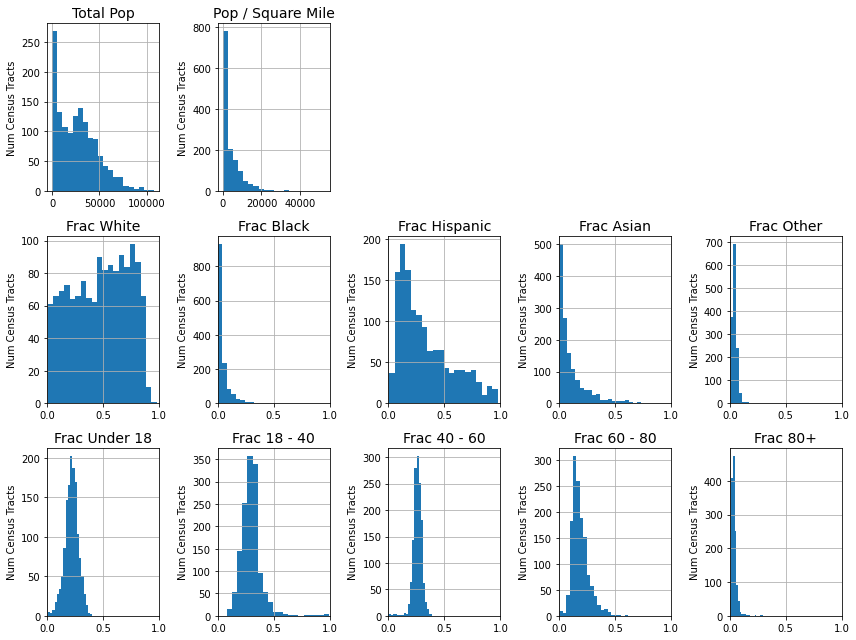

In [240]:
plt.figure(figsize=(12,9))

plt.subplot(3,5,1)
df_ans['Total Pop'].hist(bins=20)
plt.title('Total Pop', fontsize=14)
plt.ylabel('Num Census Tracts')

plt.subplot(3,5,2)
df_ans['pop_density'].hist(bins=20)
plt.title('Pop / Square Mile', fontsize=14)
plt.ylabel('Num Census Tracts')

plt.subplot(3,5,6)
df_ans['frac_white'].hist(bins=20)
plt.title('Frac White', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,7)
df_ans['frac_black'].hist(bins=20)
plt.title('Frac Black', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,8)
df_ans['frac_hispanic'].hist(bins=20)
plt.title('Frac Hispanic', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,9)
df_ans['frac_asian'].hist(bins=20)
plt.title('Frac Asian', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,10)
df_ans['frac_other'].hist(bins=20)
plt.title('Frac Other', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,11)
df_ans['frac_under_18'].hist(bins=20)
plt.title('Frac Under 18', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,12)
df_ans['frac_18_to_40'].hist(bins=20)
plt.title('Frac 18 - 40', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,13)
df_ans['frac_40_to_60'].hist(bins=20)
plt.title('Frac 40 - 60', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,14)
df_ans['frac_60_to_80'].hist(bins=20)
plt.title('Frac 60 - 80', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,15)
df_ans['frac_80_plus'].hist(bins=20)
plt.title('Frac 80+', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])
plt.tight_layout()


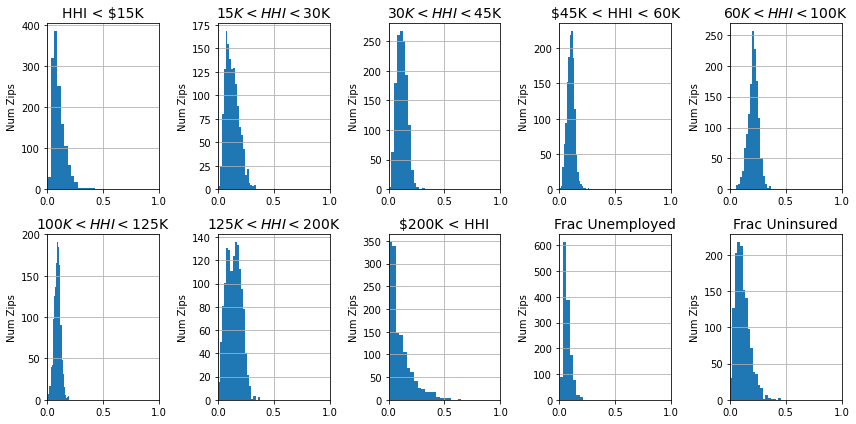

In [241]:
plt.figure(figsize=(12,6))

plt.subplot(2,5,1)
df_ans['frac_lt_15k'].hist(bins=20)
plt.title('HHI < $15K', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,2)
df_ans['frac_15k_to_30k'].hist(bins=20)
plt.title('$15K < HHI < $30K', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,3)
df_ans['frac_30k_to_45k'].hist(bins=20)
plt.title('$30K < HHI < $45K', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,4)
df_ans['frac_45k_to_60k'].hist(bins=20)
plt.title('$45K < HHI < 60K', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,5)
df_ans['frac_60k_to_100k'].hist(bins=20)
plt.title('$60K < HHI < $100K', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,6)
df_ans['frac_100k_to_125k'].hist(bins=20)
plt.title('$100K < HHI < $125K', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,7)
df_ans['frac_125k_to_200k'].hist(bins=20)
plt.title('$125K < HHI < $200K', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,8)
df_ans['frac_gt_200k'].hist(bins=20)
plt.title('$200K < HHI', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,9)
df_ans['frac_unemployed'].hist(bins=20)
plt.title('Frac Unemployed', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,10)
df_ans['frac_no_health_insurance'].hist(bins=20)
plt.title('Frac Uninsured', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.tight_layout()


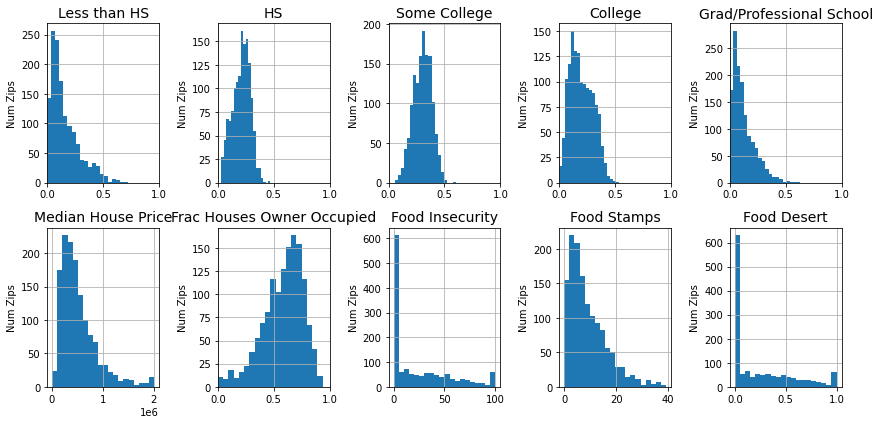

In [242]:
plt.figure(figsize=(12,6))

plt.subplot(2,5,1)
df_ans['frac_lt_hs'].hist(bins=20)
plt.title('Less than HS', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,2)
df_ans['frac_hs'].hist(bins=20)
plt.title('HS', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,3)
df_ans['frac_some_college'].hist(bins=20)
plt.title('Some College', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,4)
df_ans['frac_college'].hist(bins=20)
plt.title('College', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,5)
df_ans['frac_graduate'].hist(bins=20)
plt.title('Grad/Professional School', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,6)
df_ans['median_house_price'].hist(bins=20)
plt.title('Median House Price', fontsize=14)
plt.ylabel('Num Zips')

plt.subplot(2,5,7)
df_ans['frac_houses_owner_occupied'].hist(bins=20)
plt.title('Frac Houses Owner Occupied', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,8)
df_ans['food_insecurity'].hist(bins=20)
plt.title('Food Insecurity', fontsize=14)
plt.ylabel('Num Zips')

plt.subplot(2,5,9)
df_ans['pct_snap'].hist(bins=20)
plt.title('Food Stamps', fontsize=14)
plt.ylabel('Num Zips')

plt.subplot(2,5,10)
df_ans['lila_tracts'].hist(bins=20)
plt.title('Food Desert', fontsize=14)
plt.ylabel('Num Zips')



plt.tight_layout()

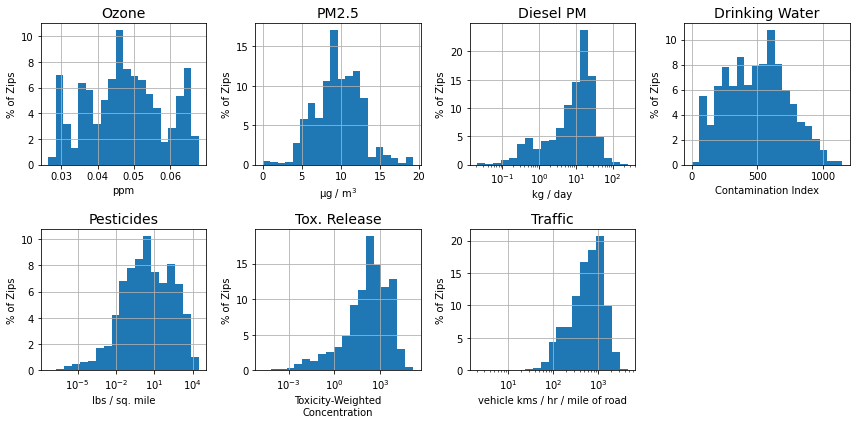

In [245]:
plt.figure(figsize=(12,6))

plt.subplot(2,4,1)
df_ans['Ozone'].hist(bins=20,
                 weights=100 * np.ones(len(df_ans[~df_ans['Ozone'].isna()])) / len(df_ans))
plt.title('Ozone', fontsize=14)
plt.ylabel('% of Zips')
plt.xlabel('ppm')

plt.subplot(2,4,2)
df_ans['PM2.5'].hist(bins=20,
                 weights=100 * np.ones(len(df_ans[~df_ans['PM2.5'].isna()])) / len(df_ans))
plt.title('PM2.5', fontsize=14)
plt.ylabel('% of Zips')
plt.xlabel('\u03BCg / m$^3$')

plt.subplot(2,4,3)
df_ans['Diesel PM'].hist(bins=np.logspace(np.log10(df_ans['Diesel PM'].min()),np.log10(df_ans['Diesel PM'].max()), 20),
                 weights=100 * np.ones(len(df_ans[~df_ans['Diesel PM'].isna()])) / len(df_ans))
plt.title('Diesel PM', fontsize=14)
plt.ylabel('% of Zips')
plt.xlabel('kg / day')
plt.gca().set_xscale("log")

plt.subplot(2,4,4)
df_ans['Drinking Water'].hist(bins=20,
                 weights=100 * np.ones(len(df_ans[~df_ans['Drinking Water'].isna()])) / len(df_ans))
plt.title('Drinking Water', fontsize=14)
plt.ylabel('% of Zips')
plt.xlabel('Contamination Index')

plt.subplot(2,4,5)
df_ans[df_ans.Pesticides > 0]['Pesticides'].hist(bins=np.logspace(np.log10(df_ans[df_ans.Pesticides > 0]['Pesticides'].min()),np.log10(df_ans['Pesticides'].max()), 20),
                 weights=100 * np.ones(len(df_ans[df_ans['Pesticides']>0])) / len(df_ans))
plt.title('Pesticides', fontsize=14)
plt.ylabel('% of Zips')
plt.xlabel('lbs / sq. mile')
plt.gca().set_xscale("log")

plt.subplot(2,4,6)   
df_ans[df_ans['Tox. Release'] > 0]['Tox. Release'].hist(bins=np.logspace(np.log10(df_ans[df_ans['Tox. Release'] > 0]['Tox. Release'].min()),np.log10(df_ans['Tox. Release'].max()), 20),
                 weights=100 * np.ones(len(df_ans[df_ans['Tox. Release']>0])) / len(df_ans))
plt.title('Tox. Release', fontsize=14)
plt.ylabel('% of Zips')
plt.xlabel('Toxicity-Weighted\nConcentration')
plt.gca().set_xscale("log")

plt.subplot(2,4,7)
df_ans[df_ans['Traffic'] > 0]['Traffic'].hist(bins=np.logspace(np.log10(df_ans[df_ans['Traffic'] > 0]['Traffic'].min()),np.log10(df_ans['Traffic'].max()), 20),
                 weights=100 * np.ones(len(df_ans[df_ans['Traffic']>0])) / len(df_ans))
plt.title('Traffic', fontsize=14)
plt.ylabel('% of Zips')
plt.gca().set_xscale("log")
plt.xlabel('vehicle kms / hr / mile of road')

plt.tight_layout()
plt.savefig('enviro_histos.jpg')

<AxesSubplot:>

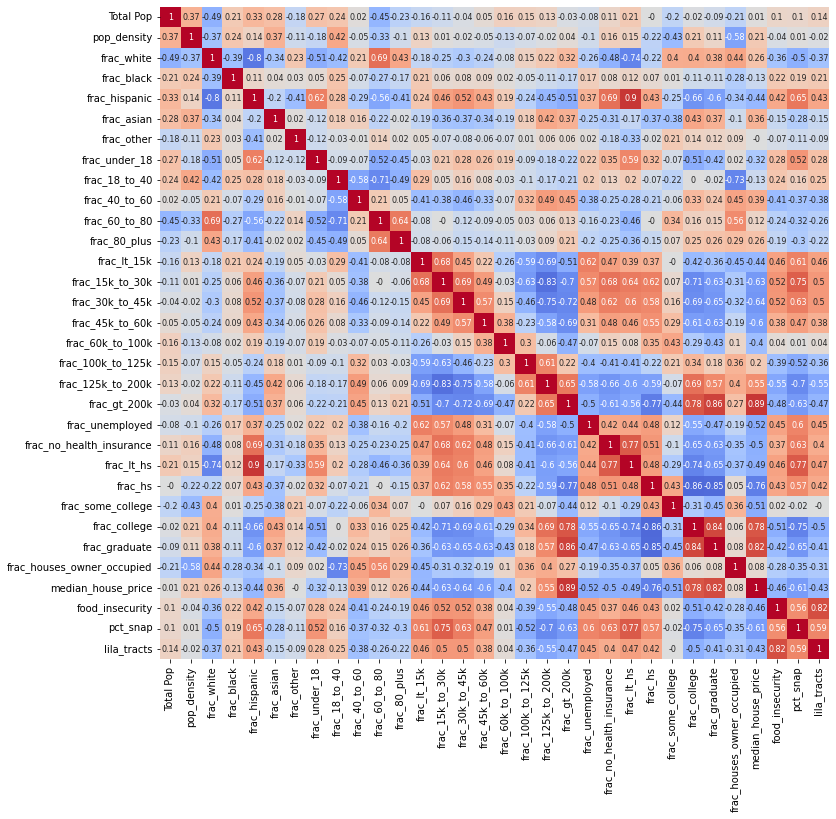

In [246]:
plt.figure(figsize=(12,12))

corr_mat =  df_ans[['Total Pop', 'pop_density',
     'frac_white', 'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
                    'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 'frac_80_plus',
     'frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
           'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k', 'frac_gt_200k', 
     'frac_unemployed', 'frac_no_health_insurance',
     'frac_lt_hs', 'frac_hs', 'frac_some_college', 'frac_college', 'frac_graduate',
     'frac_houses_owner_occupied', 
     'median_house_price', 
     'food_insecurity', 'pct_snap', 'lila_tracts']].corr()

sns.heatmap(corr_mat,
           cmap = "coolwarm",  vmin=-1, vmax=1, cbar=False, robust=True, annot = np.round(corr_mat,2),
                annot_kws={'size':8})

<AxesSubplot:>

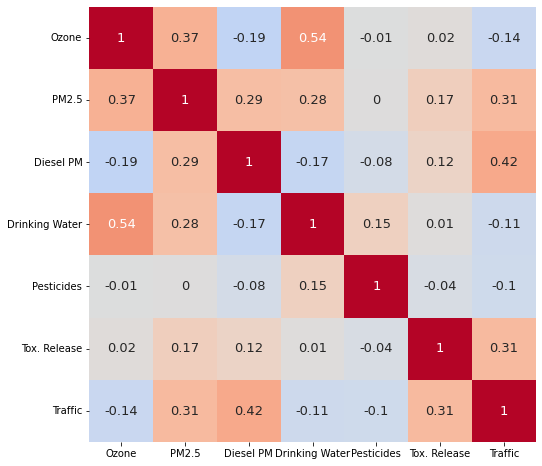

In [247]:
plt.figure(figsize=(8,8))

corr_mat = df_ans[['Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Pesticides', 'Tox. Release', 'Traffic']].corr()

sns.heatmap(corr_mat,
           cmap = "coolwarm",  vmin=-1, vmax=1,  cbar=False, robust=True, annot = np.round(corr_mat,2),
                annot_kws={'size':13})

In [248]:
#disease basics

In [249]:
xls = pd.ExcelFile('disease_by_zip_2.xlsx')

xls.sheet_names

['FuncDyspep_1',
 'IBS_1',
 'Ulcerative_1',
 'Crohns_1',
 'Esoph_1',
 'Femur_1',
 'Asthma_1',
 'Shoulder_1',
 'FuncDyspep_2',
 'IBS_2',
 'Ulcerative_2',
 'Crohns_2',
 'Esoph_2',
 'Asthma_2',
 'Shoulder_2']

In [250]:
df_disease = pd.DataFrame(df_ans.ZIPCODE_5.unique(), columns = ['ZIPCODE_5'])

for sheet in xls.sheet_names:
    print(sheet)
    df_temp = pd.read_excel(xls, sheet)
    df_temp['ZIPCODE_5'] = df_temp['ZIPCODE_5'].astype(str)
    df_temp['rate_' + sheet] = df_temp.cases/df_temp.tot_coverage_months * 1200
    df_temp['offset_' + sheet] = df_temp.tot_coverage_months / 1200
    df_temp['cases_' + sheet] = df_temp.cases
    #df_temp['num_' + sheet] = df_temp.num_residents
    df_disease = pd.merge(df_disease, df_temp[['ZIPCODE_5', 'rate_' + sheet, 'cases_' + sheet, 'offset_' + sheet]], on='ZIPCODE_5', how='left')

FuncDyspep_1
IBS_1
Ulcerative_1
Crohns_1
Esoph_1
Femur_1
Asthma_1
Shoulder_1
FuncDyspep_2
IBS_2
Ulcerative_2
Crohns_2
Esoph_2
Asthma_2
Shoulder_2


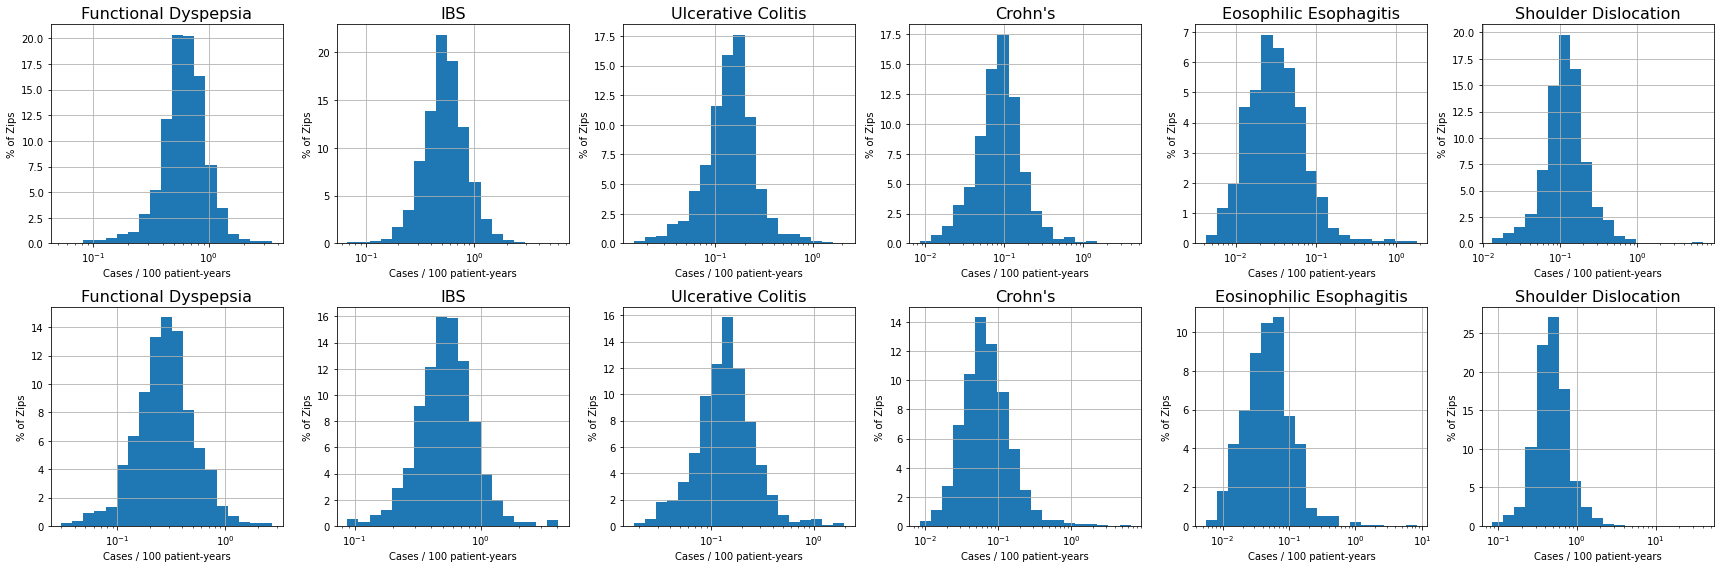

In [267]:
plt.figure(figsize=(24,8))

plt.subplot(2,6,1)
df_disease[df_disease['rate_FuncDyspep_1'] > 0]['rate_FuncDyspep_1'].hist(bins=np.logspace(np.log10(df_disease[df_disease['rate_FuncDyspep_1'] > 0]['rate_FuncDyspep_1'].min()),np.log10(df_disease['rate_FuncDyspep_1'].max()), 20),
                 weights=100 * np.ones(len(df_disease[df_disease['rate_FuncDyspep_1']>0])) / len(df_disease))
plt.title('Functional Dyspepsia', fontsize=16)
plt.ylabel('% of Zips')
plt.xlabel('Cases / 100 patient-years')
plt.gca().set_xscale("log")

plt.subplot(2,6,2)
df_disease[df_disease['rate_IBS_1'] > 0]['rate_IBS_1'].hist(bins=np.logspace(np.log10(df_disease[df_disease['rate_IBS_1'] > 0]['rate_IBS_1'].min()),np.log10(df_disease['rate_IBS_1'].max()), 20),
                 weights=100 * np.ones(len(df_disease[df_disease['rate_IBS_1']>0])) / len(df_disease))
plt.title('IBS', fontsize=16)
plt.ylabel('% of Zips')
plt.xlabel('Cases / 100 patient-years')
plt.gca().set_xscale("log")

plt.subplot(2,6,3)
df_disease[df_disease['rate_Ulcerative_1'] > 0]['rate_Ulcerative_1'].hist(bins=np.logspace(np.log10(df_disease[df_disease['rate_Ulcerative_1'] > 0]['rate_Ulcerative_1'].min()),np.log10(df_disease['rate_Ulcerative_1'].max()), 20),
                 weights=100 * np.ones(len(df_disease[df_disease['rate_Ulcerative_1']>0])) / len(df_disease))
plt.title('Ulcerative Colitis', fontsize=16)
plt.ylabel('% of Zips')
plt.xlabel('Cases / 100 patient-years')
plt.gca().set_xscale("log")

plt.subplot(2,6,4)
df_disease[df_disease['rate_Crohns_1'] > 0]['rate_Crohns_1'].hist(bins=np.logspace(np.log10(df_disease[df_disease['rate_Crohns_1'] > 0]['rate_Crohns_1'].min()),np.log10(df_disease['rate_Crohns_1'].max()), 20),
                 weights=100 * np.ones(len(df_disease[df_disease['rate_Crohns_1']>0])) / len(df_disease))
plt.title('Crohn\'s', fontsize=16)
plt.ylabel('% of Zips')
plt.xlabel('Cases / 100 patient-years')
plt.gca().set_xscale("log")

plt.subplot(2,6,5)
df_disease[df_disease['rate_Esoph_1'] > 0]['rate_Esoph_1'].hist(bins=np.logspace(np.log10(df_disease[df_disease['rate_Esoph_1'] > 0]['rate_Esoph_1'].min()),np.log10(df_disease['rate_Esoph_1'].max()), 20),
                 weights=100 * np.ones(len(df_disease[df_disease['rate_Esoph_1']>0])) / len(df_disease))
plt.title('Eosophilic Esophagitis', fontsize=16)
plt.ylabel('% of Zips')
plt.xlabel('Cases / 100 patient-years')
plt.gca().set_xscale("log")

plt.subplot(2,6,6)
df_disease[df_disease['rate_Shoulder_1'] > 0]['rate_Shoulder_1'].hist(bins=np.logspace(np.log10(df_disease[df_disease['rate_Shoulder_1'] > 0]['rate_Shoulder_1'].min()),np.log10(df_disease['rate_Shoulder_1'].max()), 20),
                 weights=100 * np.ones(len(df_disease[df_disease['rate_Shoulder_1']>0])) / len(df_disease))
plt.title('Shoulder Dislocation', fontsize=16)
plt.ylabel('% of Zips')
plt.xlabel('Cases / 100 patient-years')
plt.gca().set_xscale("log")

plt.subplot(2,6,7)
df_disease[df_disease['rate_FuncDyspep_2'] > 0]['rate_FuncDyspep_2'].hist(bins=np.logspace(np.log10(df_disease[df_disease['rate_FuncDyspep_2'] > 0]['rate_FuncDyspep_2'].min()),np.log10(df_disease['rate_FuncDyspep_2'].max()), 20),
                 weights=100 * np.ones(len(df_disease[df_disease['rate_FuncDyspep_2']>0])) / len(df_disease))
plt.title('Functional Dyspepsia', fontsize=16)
plt.ylabel('% of Zips')
plt.xlabel('Cases / 100 patient-years')
plt.gca().set_xscale("log")

plt.subplot(2,6,8)
df_disease[df_disease['rate_IBS_2'] > 0]['rate_IBS_2'].hist(bins=np.logspace(np.log10(df_disease[df_disease['rate_IBS_2'] > 0]['rate_IBS_2'].min()),np.log10(df_disease['rate_IBS_2'].max()), 20),
                 weights=100 * np.ones(len(df_disease[df_disease['rate_IBS_2']>0])) / len(df_disease))
plt.title('IBS', fontsize=16)
plt.ylabel('% of Zips')
plt.xlabel('Cases / 100 patient-years')
plt.gca().set_xscale("log")

plt.subplot(2,6,9)
df_disease[df_disease['rate_Ulcerative_2'] > 0]['rate_Ulcerative_2'].hist(bins=np.logspace(np.log10(df_disease[df_disease['rate_Ulcerative_2'] > 0]['rate_Ulcerative_2'].min()),np.log10(df_disease['rate_Ulcerative_2'].max()), 20),
                 weights=100 * np.ones(len(df_disease[df_disease['rate_Ulcerative_2']>0])) / len(df_disease))
plt.title('Ulcerative Colitis', fontsize=16)
plt.ylabel('% of Zips')
plt.xlabel('Cases / 100 patient-years')
plt.gca().set_xscale("log")

plt.subplot(2,6,10)
df_disease[df_disease['rate_Crohns_2'] > 0]['rate_Crohns_2'].hist(bins=np.logspace(np.log10(df_disease[df_disease['rate_Crohns_2'] > 0]['rate_Crohns_2'].min()),np.log10(df_disease['rate_Crohns_2'].max()), 20),
                 weights=100 * np.ones(len(df_disease[df_disease['rate_Crohns_2']>0])) / len(df_disease))
plt.title('Crohn\'s', fontsize=16)
plt.ylabel('% of Zips')
plt.xlabel('Cases / 100 patient-years')
plt.gca().set_xscale("log")

plt.subplot(2,6,11)
df_disease[df_disease['rate_Esoph_2'] > 0]['rate_Esoph_2'].hist(bins=np.logspace(np.log10(df_disease[df_disease['rate_Esoph_2'] > 0]['rate_Esoph_2'].min()),np.log10(df_disease['rate_Esoph_2'].max()), 20),
                 weights=100 * np.ones(len(df_disease[df_disease['rate_Esoph_2']>0])) / len(df_disease))
plt.title('Eosinophilic Esophagitis', fontsize=16)
plt.ylabel('% of Zips')
plt.xlabel('Cases / 100 patient-years')
plt.gca().set_xscale("log")

plt.subplot(2,6,12)
df_disease[df_disease['rate_Shoulder_2'] > 0]['rate_Shoulder_2'].hist(bins=np.logspace(np.log10(df_disease[df_disease['rate_Shoulder_2'] > 0]['rate_Shoulder_2'].min()),np.log10(df_disease['rate_Shoulder_2'].max()), 20),
                 weights=100 * np.ones(len(df_disease[df_disease['rate_Shoulder_2']>0])) / len(df_disease))
plt.title('Shoulder Dislocation', fontsize=16)
plt.ylabel('% of Zips')
plt.xlabel('Cases / 100 patient-years')
plt.gca().set_xscale("log")

plt.tight_layout()
plt.savefig('disease_distribution.jpg', dpi=400)

In [264]:
df_dist = pd.DataFrame([], columns=['feature', 'era', '%zeros', 'p2.5', 'p25', 'p50', 'p75', 'p97.5'])
i=0
for ff in xls.sheet_names:
    temp = df_disease['rate_' + ff].dropna()
    tt = [np.round(100*len(temp[temp==0])/len(temp),1),
          np.round(np.percentile(temp,2.5),2),
          np.round(np.percentile(temp,25),2),
          np.round(np.percentile(temp,50),2),
          np.round(np.percentile(temp,75),2), 
          np.round(np.percentile(temp,97.5),2)]
    feat = ff[:-2]
    era = 'ICD-9'
    if ff[-1:] == '2':
        era = 'ICD-10'
    df_dist.loc[i] = [feat, era] + tt
    i += 1
df_dist

feature     era  %zeros  p2.5   p25   p50   p75  p97.5
0   FuncDyspep   ICD-9     6.8  0.00  0.44  0.60  0.80   1.37
1          IBS   ICD-9     7.6  0.00  0.37  0.52  0.68   1.30
2   Ulcerative   ICD-9    18.9  0.00  0.06  0.12  0.19   0.44
3       Crohns   ICD-9    25.0  0.00  0.01  0.07  0.11   0.31
4        Esoph   ICD-9    57.9  0.00  0.00  0.00  0.02   0.12
5        Femur   ICD-9    14.6  0.00  0.10  0.23  0.38   0.81
6       Asthma   ICD-9     1.7  0.75  1.57  1.92  2.42   4.45
7     Shoulder   ICD-9    21.2  0.00  0.04  0.10  0.15   0.41
8   FuncDyspep  ICD-10    13.9  0.00  0.14  0.25  0.37   0.86
9          IBS  ICD-10     8.0  0.00  0.35  0.50  0.69   1.32
10  Ulcerative  ICD-10    19.3  0.00  0.05  0.12  0.18   0.43
11      Crohns  ICD-10    31.9  0.00  0.00  0.04  0.09   0.28
12       Esoph  ICD-10    45.3  0.00  0.00  0.02  0.05   0.17
13      Asthma  ICD-10     1.9  0.53  1.37  1.72  2.29   3.97
14    Shoulder  ICD-10     7.2  0.00  0.32  0.45  0.61   1.33

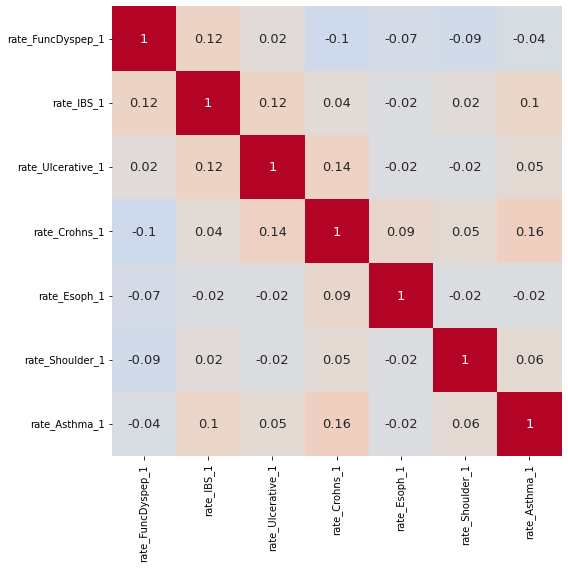

In [268]:
plt.figure(figsize=(8,8))

corr_mat = df_disease[['rate_FuncDyspep_1', 'rate_IBS_1', 'rate_Ulcerative_1',
       'rate_Crohns_1', 'rate_Esoph_1', 'rate_Shoulder_1', 'rate_Asthma_1']].corr()

sns.heatmap(corr_mat,
           cmap = "coolwarm",  vmin=-1, vmax=1,  cbar=False, robust=True, annot = np.round(corr_mat,2),
                annot_kws={'size':13})
plt.tight_layout()

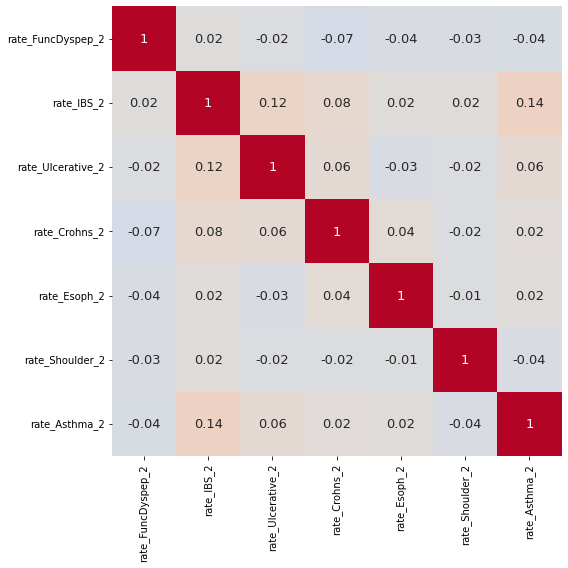

In [269]:
plt.figure(figsize=(8,8))

corr_mat = df_disease[['rate_FuncDyspep_2', 'rate_IBS_2', 'rate_Ulcerative_2',
       'rate_Crohns_2', 'rate_Esoph_2', 'rate_Shoulder_2', 'rate_Asthma_2']].corr()

sns.heatmap(corr_mat,
           cmap = "coolwarm",  vmin=-1, vmax=1,  cbar=False, robust=True, annot = np.round(corr_mat,2),
                annot_kws={'size':13})
plt.tight_layout()

In [270]:
# put it all together

In [271]:
df1=pd.read_csv('Optum_population_2018.csv')
df_ans = pd.merge(df_ans, df_disease, on='ZIPCODE_5')
df_ans = pd.merge(df_ans, df1, on='ZIPCODE_5', how='left')

In [272]:
df_ans.shape

(1376, 89)

In [273]:
df_ans=df_ans[df_ans.Optum_pop > 0]
df_ans = df_ans[df_ans['Total Pop'] >= 100]

In [274]:
# optum sampling frac

In [275]:
df_ans['frac_pop_included_in_Optum'] = df_ans['Optum_pop'] / df_ans['Total Pop']

In [276]:
df_ans.frac_pop_included_in_Optum.describe()

count    1365.000000
mean        0.045721
std         0.035769
min         0.000295
25%         0.025229
50%         0.041334
75%         0.058799
max         0.655518
Name: frac_pop_included_in_Optum, dtype: float64

In [277]:
np.percentile(df_ans.frac_pop_included_in_Optum,95) * 100

9.016902847521965

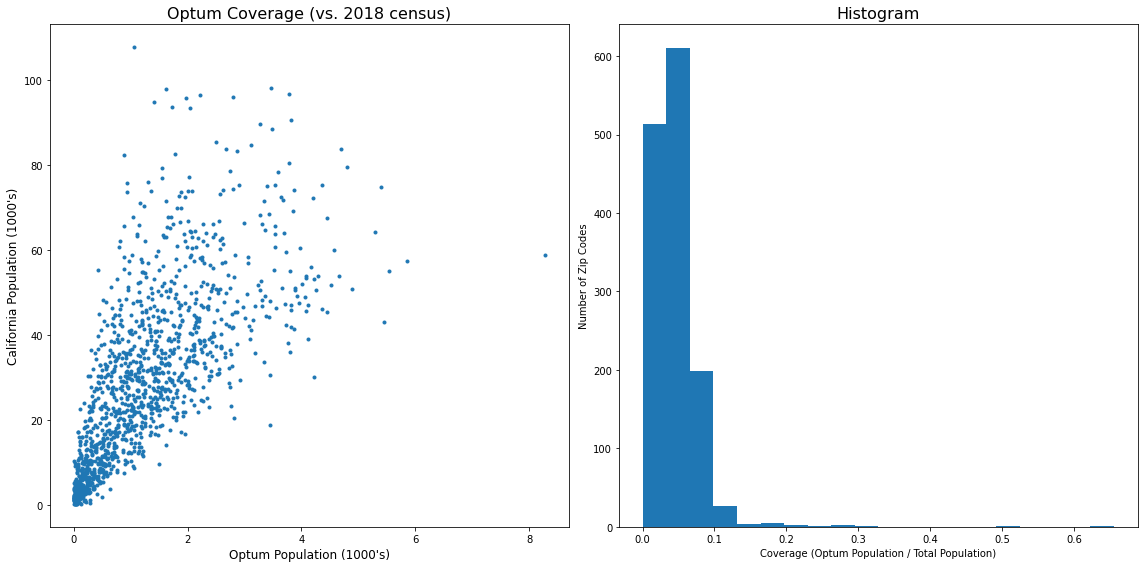

In [278]:
plt.subplots(1,2,figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(df_ans['Optum_pop']/1000, df_ans['Total Pop']/1000, '.')
#plt.xlim([0,9000])
#plt.ylim([0,130000])
plt.xlabel('Optum Population (1000\'s)', fontsize=12)
plt.ylabel('California Population (1000\'s)', fontsize=12)
plt.title('Optum Coverage (vs. 2018 census)', fontsize=16)

plt.subplot(1,2,2)

plt.hist(df_ans[df_ans.frac_pop_included_in_Optum < 5.5].frac_pop_included_in_Optum, bins=20)
plt.title('Histogram', fontsize=16)
plt.xlabel('Coverage (Optum Population / Total Population)')
plt.ylabel('Number of Zip Codes')

plt.tight_layout()
plt.savefig('coverage.jpg')


Text(0, 0.5, 'Number of Zip Codes')

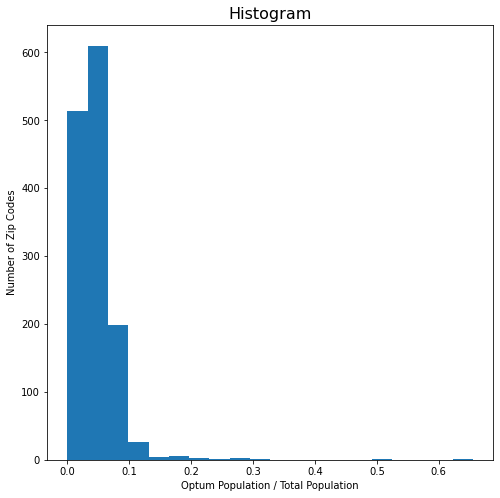

In [279]:
plt.figure(figsize=(8,8))
plt.hist(df_ans[df_ans.frac_pop_included_in_Optum < 5.5].frac_pop_included_in_Optum, bins=20)
plt.title('Histogram', fontsize=16)
plt.xlabel('Optum Population / Total Population')
plt.ylabel('Number of Zip Codes')


In [280]:
features = [ 'Total Pop', 'pop_density', 'frac_black',
       'frac_hispanic', 'frac_asian', 'frac_other', 
            'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 'frac_80_plus',
       'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
       'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k',
       'frac_gt_200k', 'frac_unemployed', 'frac_no_health_insurance',
        'frac_hs', 'frac_some_college', 'frac_college',
       'frac_graduate', 'frac_houses_owner_occupied', 'median_house_price',
       'food_insecurity', 'pct_snap', 'lila_tracts']

X = sm.add_constant(df_ans[features] ).fillna(0)
y = df_ans['frac_pop_included_in_Optum'].clip(upper=0.1)

est = sm.OLS(y, X).fit() #maxiter=50000, method='nm')
est.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
=============================================================================
Model:              OLS                        Adj. R-squared:     0.395     
Dependent Variable: frac_pop_included_in_Optum AIC:                -7003.7750
Date:               2022-06-23 14:46           BIC:                -6852.4266
No. Observations:   1365                       Log-Likelihood:     3530.9    
Df Model:           28                         F-statistic:        32.81     
Df Residuals:       1336                       Prob (F-statistic): 1.27e-130 
R-squared:          0.407                      Scale:              0.00033888
-----------------------------------------------------------------------------
                               Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------------------
const                         -0.0652   0.0234 -2.7832 0.0055 -0.1111 -0.0192
Total Pop                     -0.0000   0.0000 -1.0277 0.3043 -0.0000  0.0000
pop_density                   -0.0000   0.0000 -0.1702 0.8649 -0.0000  0.0000
frac_black                    -0.0201   0.0084 -2.4053 0.0163 -0.0366 -0.0037
frac_hispanic                  0.0235   0.0067  3.5105 0.0005  0.0104  0.0366
frac_asian                     0.0059   0.0053  1.1113 0.2666 -0.0045  0.0164
frac_other                    -0.0648   0.0186 -3.4938 0.0005 -0.1013 -0.0284
frac_18_to_40                 -0.0371   0.0169 -2.1927 0.0285 -0.0703 -0.0039
frac_40_to_60                  0.0483   0.0238  2.0266 0.0429  0.0015  0.0951
frac_60_to_80                 -0.0119   0.0176 -0.6774 0.4983 -0.0465  0.0226
frac_80_plus                   0.1237   0.0340  3.6335 0.0003  0.0569  0.1905
frac_15k_to_30k               -0.0215   0.0239 -0.9018 0.3673 -0.0683  0.0253
frac_30k_to_45k                0.0197   0.0218  0.9054 0.3654 -0.0230  0.0625
frac_45k_to_60k                0.0178   0.0238  0.7475 0.4549 -0.0289  0.0645
frac_60k_to_100k              -0.0167   0.0178 -0.9399 0.3474 -0.0516  0.0182
frac_100k_to_125k              0.0340   0.0280  1.2121 0.2257 -0.0210  0.0889
frac_125k_to_200k              0.0553   0.0204  2.7059 0.0069  0.0152  0.0953
frac_gt_200k                   0.0269   0.0220  1.2218 0.2220 -0.0163  0.0701
frac_unemployed                0.0196   0.0206  0.9496 0.3425 -0.0208  0.0600
frac_no_health_insurance       0.0600   0.0149  4.0323 0.0001  0.0308  0.0892
frac_hs                        0.1163   0.0187  6.2253 0.0000  0.0796  0.1529
frac_some_college              0.0808   0.0152  5.3105 0.0000  0.0509  0.1106
frac_college                   0.0887   0.0178  4.9686 0.0000  0.0537  0.1237
frac_graduate                  0.1340   0.0173  7.7621 0.0000  0.1002  0.1679
frac_houses_owner_occupied    -0.0060   0.0065 -0.9315 0.3518 -0.0188  0.0067
median_house_price             0.0000   0.0000  0.6924 0.4888 -0.0000  0.0000
food_insecurity                0.0001   0.0000  2.8770 0.0041  0.0000  0.0001
pct_snap                      -0.0000   0.0002 -0.3062 0.7595 -0.0004  0.0003
lila_tracts                   -0.0088   0.0030 -2.8995 0.0038 -0.0148 -0.0028
-----------------------------------------------------------------------------
Omnibus:                 153.117          Durbin-Watson:             1.214   
Prob(Omnibus):           0.000            Jarque-Bera (JB):          243.818 
Skew:                    0.780            Prob(JB):                  0.000   
Kurtosis:                4.361            Condition No.:             57093070
=============================================================================
* The condition number is large (6e+07). This might indicate
strong multicollinearity or other numerical problems.
"""

In [282]:
results_as_html = est.summary().tables[1].as_html()
temp = pd.read_html(results_as_html, header=0, index_col=0)[0]


<AxesSubplot:>

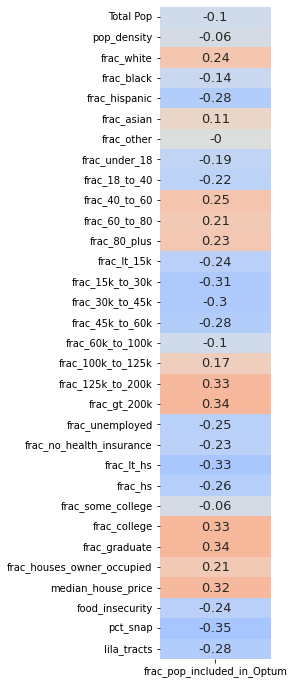

In [283]:
plt.figure(figsize=(2,24/2))

features = ['Total Pop', 'pop_density',
     'frac_white', 'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
                    'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 'frac_80_plus',
     'frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
           'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k', 'frac_gt_200k', 
     'frac_unemployed', 'frac_no_health_insurance',
     'frac_lt_hs', 'frac_hs', 'frac_some_college', 'frac_college', 'frac_graduate',
     'frac_houses_owner_occupied', 
     'median_house_price', 
     'food_insecurity', 'pct_snap', 'lila_tracts']

corr_mat =  df_ans[['frac_pop_included_in_Optum'] + features].corr()

corr_mat = corr_mat[corr_mat.index.isin(features)][['frac_pop_included_in_Optum']]

sns.heatmap(corr_mat,
           cmap = "coolwarm",  vmin=-1, vmax=1,  cbar=False, robust=True, annot = np.round(corr_mat,2),
                annot_kws={'size':13})

<AxesSubplot:>

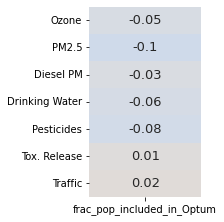

In [284]:
plt.figure(figsize=(2,7/2))

features = ['Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Pesticides', 'Tox. Release', 'Traffic']

corr_mat =  df_ans[['frac_pop_included_in_Optum'] + features].corr()

corr_mat = corr_mat[corr_mat.index.isin(features)][['frac_pop_included_in_Optum']]

sns.heatmap(corr_mat,
           cmap = "coolwarm",  vmin=-1, vmax=1,  cbar=False, robust=True, annot = np.round(corr_mat,2),
                annot_kws={'size':13})

<AxesSubplot:>

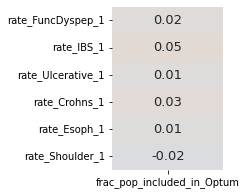

In [285]:
plt.figure(figsize=(2,6/2))

features = ['rate_FuncDyspep_1', 'rate_IBS_1', 'rate_Ulcerative_1',
       'rate_Crohns_1', 'rate_Esoph_1', 'rate_Shoulder_1']

corr_mat =  df_ans[['frac_pop_included_in_Optum'] + features].corr()

corr_mat = corr_mat[corr_mat.index.isin(features)][['frac_pop_included_in_Optum']]

sns.heatmap(corr_mat,
           cmap = "coolwarm",  vmin=-1, vmax=1,  cbar=False, robust=True, annot = np.round(corr_mat,2),
                annot_kws={'size':13})

<AxesSubplot:>

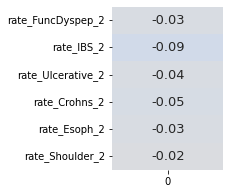

In [286]:
plt.figure(figsize=(2,6/2))

features = ['rate_FuncDyspep_2', 'rate_IBS_2', 'rate_Ulcerative_2',
       'rate_Crohns_2', 'rate_Esoph_2', 'rate_Shoulder_2']

corr_mat =  pd.concat([df_ans[features], resids], axis=1).corr()
corr_mat = corr_mat[corr_mat.index.isin(features)][[0]]

sns.heatmap(corr_mat,
           cmap = "coolwarm",  vmin=-1, vmax=1,  cbar=False, robust=True, annot = np.round(corr_mat,2),
                annot_kws={'size':13})

<AxesSubplot:>

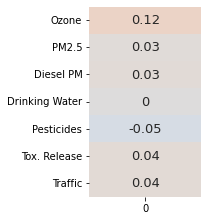

In [287]:
plt.figure(figsize=(2,7/2))

features = ['Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Pesticides', 'Tox. Release', 'Traffic']

corr_mat =  pd.concat([df_ans[features], resids], axis=1).corr()
corr_mat = corr_mat[corr_mat.index.isin(features)][[0]]

sns.heatmap(corr_mat,
           cmap = "coolwarm",  vmin=-1, vmax=1,  cbar=False, robust=True, annot = np.round(corr_mat,2),
                annot_kws={'size':13})

In [288]:
# unadjusted associations between pollution and disease rates

In [289]:
for col in ['Diesel PM', 'Pesticides', 'Tox. Release', 'Traffic']:
    df_ans['Log '+ col] = np.log(1 + df_ans[col])
    
df_ans['Drinking Water (100)'] = df_ans['Drinking Water'] / 100
df_ans['Ozone (100)'] = df_ans['Ozone'] * 100

<AxesSubplot:>

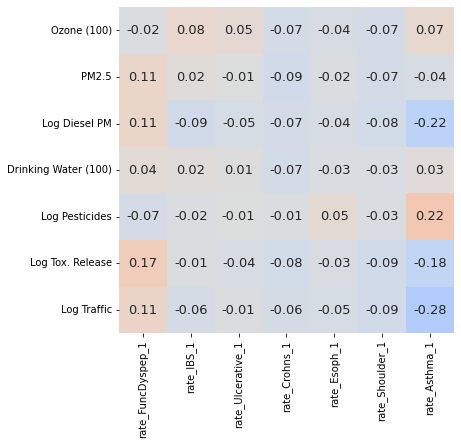

In [290]:
plt.figure(figsize=(6,6))

disease_features = ['rate_FuncDyspep_1', 'rate_IBS_1', 'rate_Ulcerative_1',
       'rate_Crohns_1', 'rate_Esoph_1', 'rate_Shoulder_1', 'rate_Asthma_1']
pollution_cols= ['Ozone (100)', 'PM2.5', 'Log Diesel PM', 'Drinking Water (100)', 'Log Pesticides', 'Log Tox. Release', 'Log Traffic']

corr_mat =  df_ans[pollution_cols + disease_features].corr()

corr_mat = corr_mat[corr_mat.index.isin(pollution_cols)][disease_features]

sns.heatmap(corr_mat,
           cmap = "coolwarm",  vmin=-1, vmax=1,  cbar=False, robust=True, annot = np.round(corr_mat,2),
                annot_kws={'size':13})

<AxesSubplot:>

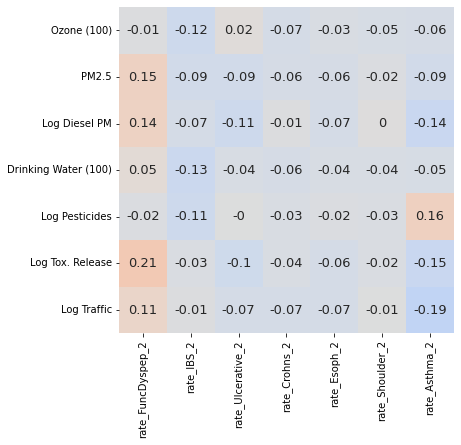

In [291]:
plt.figure(figsize=(6,6))

disease_features = ['rate_FuncDyspep_2', 'rate_IBS_2', 'rate_Ulcerative_2',
       'rate_Crohns_2', 'rate_Esoph_2', 'rate_Shoulder_2', 'rate_Asthma_2']
pollution_cols= ['Ozone (100)', 'PM2.5', 'Log Diesel PM', 'Drinking Water (100)', 'Log Pesticides', 'Log Tox. Release', 'Log Traffic']

corr_mat =  df_ans[pollution_cols + disease_features].corr()

corr_mat = corr_mat[corr_mat.index.isin(pollution_cols)][disease_features]

sns.heatmap(corr_mat,
           cmap = "coolwarm",  vmin=-1, vmax=1,  cbar=False, robust=True, annot = np.round(corr_mat,2),
                annot_kws={'size':13})

In [292]:
df_ans.to_csv('zip_code_level_data.csv')

In [294]:
controls = ['Total Pop', 'pop_density',  'frac_black',
       'frac_hispanic', 'frac_asian', 'frac_other',
            'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80',
       'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
       'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k',
       'frac_gt_200k', 'frac_unemployed', 'frac_no_health_insurance',
        'frac_hs', 'frac_some_college', 'frac_college',
       'frac_graduate', 'frac_houses_owner_occupied', 'median_house_price',
       'food_insecurity', 'pct_snap', 'lila_tracts', 'frac_pop_included_in_Optum']

In [295]:
#get one negbin model together so we can run some diagnostics

In [298]:
feature = 'PM2.5'
disease = 'Shoulder'
case_col = 'cases_' + disease + '_2'
offset_col = 'offset_' + disease + '_2'
rate_col = 'rate_' + disease + '_2'


df_temp = df_ans[df_ans[offset_col] > 0].copy()
    
y = df_temp[case_col]#.clip(upper = np.percentile(df_temp[case_col], 99)) 
X = sm.add_constant(df_temp[[feature] + controls])
#X = X.fillna(X.mean())

def ct_response(row):
    #“Calculate response observation for Cameron-Trivedi dispersion test”
    y = row[case_col]
    m = row['bev_mu']
    return ((y - m)**2 - y) / m

res = sm.GLM(y, X,
    family=sm.families.Poisson(),
    offset = np.log(df_temp[offset_col]) 
).fit()
    
ct_data = df_temp.copy()
ct_data['bev_mu'] = res.mu
ct_data['ct_resp'] = ct_data.apply(ct_response, axis=1)
        # Linear regression of auxiliary formula
ct_results = smf.ols('ct_resp ~ bev_mu - 1', ct_data).fit()
        # Construct confidence interval for alpha, the coefficient of bev_mu
alpha_ci95 = ct_results.conf_int(0.05).loc['bev_mu']
    #print('\nC-T dispersion test: alpha = {:5.3f}, 95% CI = ({:5.3f}, {:5.3f})'.format(ct_results.params[0], alpha_ci95.loc[0], alpha_ci95.loc[1]))
alpha0 = ct_results.params[0]
    
print(alpha0)

res = sm.GLM(y, X,
    family=sm.families.NegativeBinomial(alpha = alpha0),
    offset = np.log(df_temp[offset_col])   
).fit(cov_type = 'cluster', cov_kwds = {'groups' : df_temp['County Code']})

res.summary()

0.034459478213467926


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       cases_Shoulder_2   No. Observations:                 1365
Model:                            GLM   Df Residuals:                     1334
Model Family:        NegativeBinomial   Df Model:                           30
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3875.1
Date:                Thu, 23 Jun 2022   Deviance:                       1558.1
Time:                        14:51:41   Pearson chi2:                 1.66e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3218
Covariance Type:              cluster                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0223      0.790      0.028      0.977      -1.527       1.571
PM2.5                         -0.0012      0.010     -0.120      0.905      -0.021       0.018
Total Pop                  -7.148e-07   6.04e-07     -1.183      0.237    -1.9e-06     4.7e-07
pop_density                 1.363e-06   4.05e-06      0.337      0.736   -6.57e-06     9.3e-06
frac_black                    -0.2735      0.163     -1.678      0.093      -0.593       0.046
frac_hispanic                 -0.4534      0.168     -2.705      0.007      -0.782      -0.125
frac_asian                    -0.9419      0.113     -8.341      0.000      -1.163      -0.721
frac_other                     1.6470      0.809      2.036      0.042       0.061       3.233
frac_under_18                  0.1274      0.760      0.168      0.867      -1.362       1.616
frac_18_to_40                  0.1108      0.619      0.179      0.858      -1.103       1.325
frac_40_to_60                  0.4401      0.804      0.548      0.584      -1.135       2.015
frac_60_to_80                  0.0776      0.834      0.093      0.926      -1.556       1.712
frac_15k_to_30k               -0.6333      0.546     -1.161      0.246      -1.703       0.436
frac_30k_to_45k               -0.3784      0.543     -0.697      0.486      -1.442       0.686
frac_45k_to_60k               -0.4169      0.749     -0.556      0.578      -1.885       1.051
frac_60k_to_100k              -0.1964      0.423     -0.464      0.643      -1.026       0.633
frac_100k_to_125k             -0.7035      0.412     -1.707      0.088      -1.511       0.104
frac_125k_to_200k             -0.3407      0.392     -0.870      0.384      -1.109       0.427
frac_gt_200k                   0.7814      0.630      1.241      0.215      -0.452       2.015
frac_unemployed               -0.9937      0.577     -1.721      0.085      -2.126       0.138
frac_no_health_insurance      -0.7409      0.617     -1.201      0.230      -1.950       0.468
frac_hs                       -0.5884      0.635     -0.926      0.354      -1.834       0.657
frac_some_college             -0.4332      0.452     -0.959      0.337      -1.318       0.452
frac_college                   0.1318      0.613      0.215      0.830      -1.070       1.333
frac_graduate                 -1.1830      0.538     -2.200      0.028      -2.237      -0.129
frac_houses_owner_occupied     0.0003      0.144      0.002      0.998      -0.283       0.283
median_house_price          6.598e-08   1.08e-07      0.611      0.541   -1.46e-07    2.78e-07
food_insecurity             1.695e-05      0.001      0.024      0.981      -0.001       0.001
pct_snap                       0.0073      0.004      1.621      0.105      -0.002       0.016
lila_tracts                   -0.0180      

Text(0.5, 1.0, 'Hist: Number of Cases / zip')

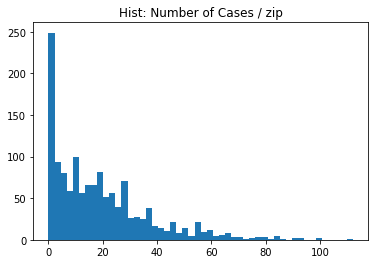

In [299]:
plt.hist( y, bins=50)
plt.title('Hist: Number of Cases / zip')

Text(0.5, 1.0, 'Hist: Number of Patient-years / zip')

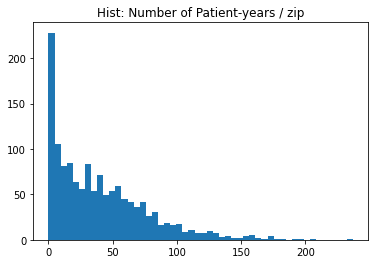

In [300]:
plt.hist( df_temp[offset_col], bins=50)
plt.title('Hist: Number of Patient-years / zip')

Text(0.5, 1.0, 'Hist: rate of femur breaks / zip')

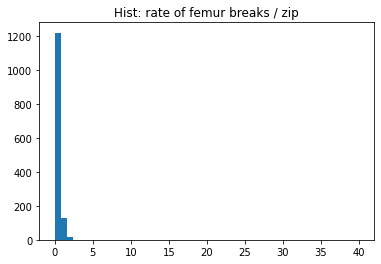

In [301]:
plt.hist( df_temp[rate_col], bins=50)
plt.title('Hist: rate of femur breaks / zip')

(-60.0, 60.0)

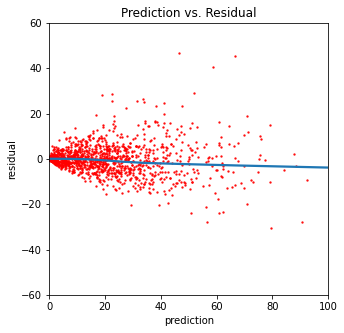

In [302]:
plt.figure(figsize=(5,5))
sns.regplot(x = res.predict(X) * df_temp[offset_col], y = y - res.predict(X) * df_temp[offset_col], lowess=True, scatter_kws={'color':'r', 's':2})
plt.title('Prediction vs. Residual')
plt.xlabel('prediction')
plt.ylabel('residual')
plt.xlim([0,100])
plt.ylim([-60,60])

(0.0, 130.0)

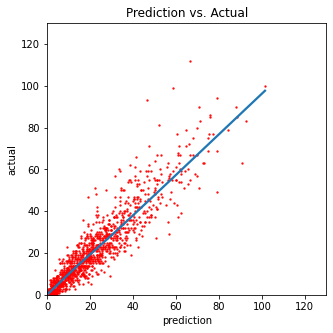

In [303]:
plt.figure(figsize=(5,5))
sns.regplot(x = res.predict(X) * df_temp[offset_col], y = y, lowess=True, scatter_kws={'color':'r', 's':2})
#plt.xlim([0,1])
#plt.ylim([0,5])
plt.title('Prediction vs. Actual')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.xlim([0,130])
plt.ylim([0,130])

Text(0, 0.5, 'residual')

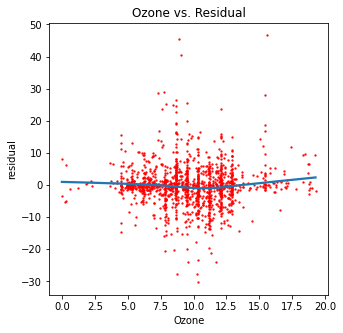

In [305]:
plt.figure(figsize=(5,5))
sns.regplot(x = X.iloc[:,1], y = y - res.predict(X) * df_temp[offset_col], lowess=True, scatter_kws={'color':'r', 's':2})
#plt.xlim([0,10])
#plt.ylim([0,5])
plt.title('Ozone vs. Residual')
plt.xlabel('Ozone')
plt.ylabel('residual')
#plt.xlim([0,130])
#plt.ylim([0,130])

(array([  1.,   2.,   0.,   0.,   3.,   1.,   3.,   1.,   1.,   6.,   9.,
         17.,  25.,  30.,  31.,  67.,  62., 109., 162., 289., 178.,  89.,
         80.,  68.,  28.,  29.,  18.,   9.,   9.,  13.,   7.,   1.,   3.,
          0.,   1.,   4.,   3.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   2.]),
 array([-30.32412867, -28.78599139, -27.24785411, -25.70971683,
        -24.17157955, -22.63344227, -21.09530499, -19.55716771,
        -18.01903043, -16.48089316, -14.94275588, -13.4046186 ,
        -11.86648132, -10.32834404,  -8.79020676,  -7.25206948,
         -5.7139322 ,  -4.17579492,  -2.63765764,  -1.09952037,
          0.43861691,   1.97675419,   3.51489147,   5.05302875,
          6.59116603,   8.12930331,   9.66744059,  11.20557787,
         12.74371515,  14.28185243,  15.8199897 ,  17.35812698,
         18.89626426,  20.43440154,  21.97253882,  23.5106761 ,
         25.04881338,  26.58695066,  28.12508794,  29.66322522,
         31.201362

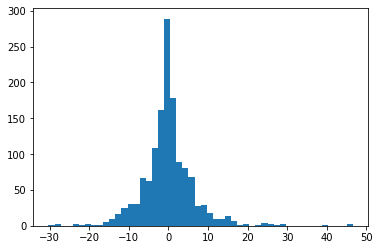

In [306]:
plt.hist(y - res.predict(X) * df_temp[offset_col], bins=50)
#plt.xlim([-55,55])

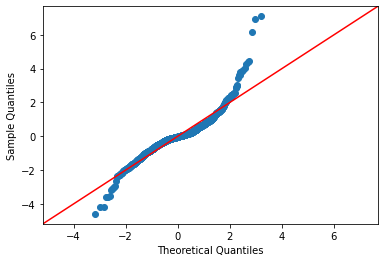

In [307]:
sm.qqplot(y - res.predict(X)* df_temp[offset_col], fit=True, line='45')
plt.show()

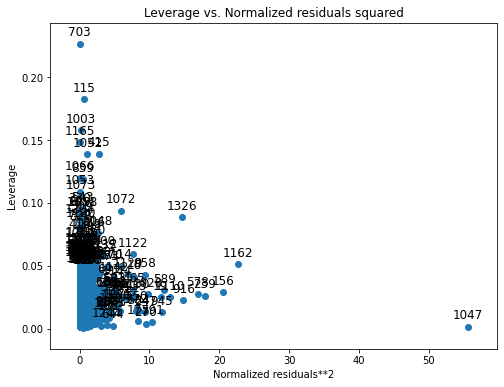

In [308]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(res, ax=ax)

In [309]:
df_temp.loc[1290,['ZIPCODE_5', case_col, offset_col, rate_col, 'Ozone (100)']]

ZIPCODE_5            95350_95352
cases_Shoulder_2              85
offset_Shoulder_2        173.436
rate_Shoulder_2         0.490095
Ozone (100)               5.3109
Name: 1290, dtype: object

In [310]:
df_temp.loc[839,['ZIPCODE_5', case_col, offset_col, rate_col, 'Ozone (100)']]

ZIPCODE_5               92549
cases_Shoulder_2            3
offset_Shoulder_2        9.61
rate_Shoulder_2      0.312175
Ozone (100)           6.48885
Name: 839, dtype: object

In [311]:
df_temp.loc[703,['ZIPCODE_5', case_col, offset_col, rate_col, 'Ozone (100)']]

ZIPCODE_5               92637
cases_Shoulder_2           42
offset_Shoulder_2     127.464
rate_Shoulder_2      0.329504
Ozone (100)           4.82321
Name: 703, dtype: object

Text(0.5, 1.0, 'residual across counties')

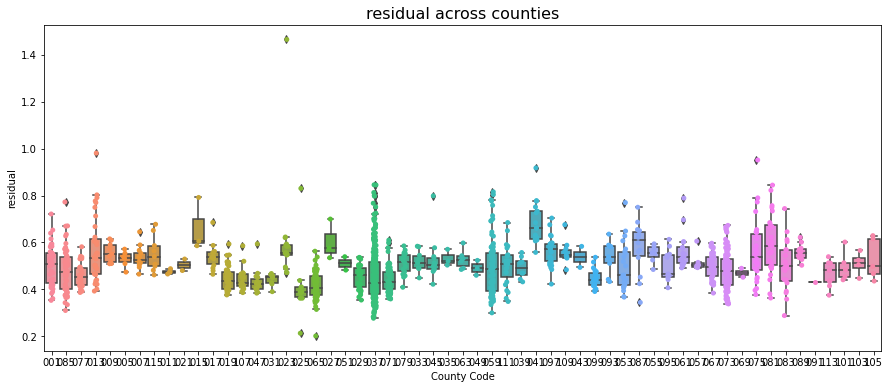

In [312]:
#do residuals cluster by county?

df_temp['residual'] = res.predict(X)

plt.figure(figsize=(15,6))
sns.boxplot(x='County Code', y='residual', data=df_temp)
sns.stripplot(x='County Code', y='residual', data=df_temp)
plt.title('residual across counties', size=16)








In [313]:
from statsmodels.formula.api import ols
model = ols('residual ~ C(County)', data=df_temp).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df         F        PR(>F)
C(County)   3.549086    56.0  7.504896  3.741943e-48
Residual   11.045659  1308.0       NaN           NaN

In [317]:
#get the overdispersion parameter so we can build a negative binomial model

In [318]:
def ct_response(row):
    #“Calculate response observation for Cameron-Trivedi dispersion test”
    y = row[case_col]
    m = row['bev_mu']
    return ((y - m)**2 - y) / m

ct_data = df_temp.copy()
ct_data['bev_mu'] = res.mu
ct_data['ct_resp'] = ct_data.apply(ct_response, axis=1)
        # Linear regression of auxiliary formula
ct_results = smf.ols('ct_resp ~ bev_mu - 1', ct_data).fit()
        # Construct confidence interval for alpha, the coefficient of bev_mu
alpha_ci95 = ct_results.conf_int(0.05).loc['bev_mu']
    #print('\nC-T dispersion test: alpha = {:5.3f}, 95% CI = ({:5.3f}, {:5.3f})'.format(ct_results.params[0], alpha_ci95.loc[0], alpha_ci95.loc[1]))
#alpha0 = ct_results.params[0]

In [319]:
alpha_ci95

0    0.028814
1    0.043042
Name: bev_mu, dtype: float64

In [320]:
ct_results.params[0]

0.03592761980517985

In [321]:
#look at county-level custering

In [322]:
pollution_cols= ['Ozone (100)', 'PM2.5', 'Log Diesel PM', 'Drinking Water (100)', 'Log Pesticides', 'Log Tox. Release', 'Log Traffic']


Text(0, 0.5, 'Rate')

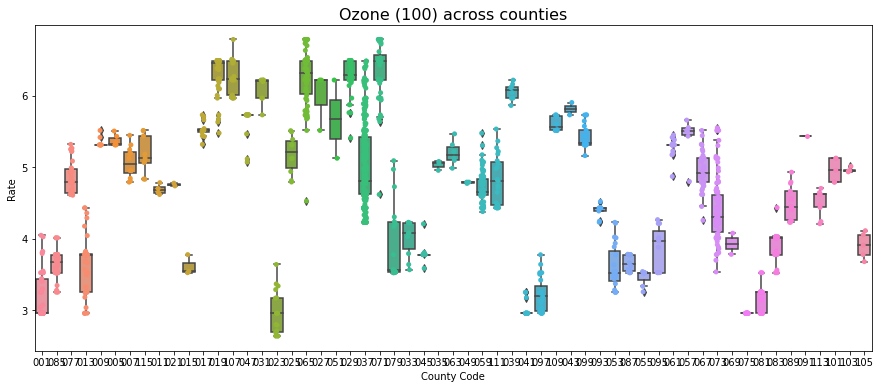

In [323]:
pollution = 'Ozone (100)'

plt.figure(figsize=(15,6))
sns.boxplot(x='County Code', y=pollution, data=df_ans)
sns.stripplot(x='County Code', y=pollution, data=df_ans)
plt.title(pollution + ' across counties', size=16)
plt.ylabel('Rate')

In [324]:
from statsmodels.formula.api import ols
model = ols('Ozone ~ C(County)', data=df_ans).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df           F  PR(>F)
C(County)  0.134923    56.0  173.498032     0.0
Residual   0.018164  1308.0         NaN     NaN

In [325]:
for col in pollution_cols:
    df_temp = df_ans.copy()
    df_temp['xcol'] = df_temp[col]
    model = ols('xcol ~ C(County)', data=df_temp).fit()
    print([col, model.summary2().tables[0].loc[6,1]])

['Ozone (100)', '0.881']
['PM2.5', '0.694']
['Log Diesel PM', '0.563']
['Drinking Water (100)', '0.520']
['Log Pesticides', '0.515']
['Log Tox. Release', '0.720']
['Log Traffic', '0.508']


In [326]:
disease_col = ['rate_FuncDyspep_1', 'rate_IBS_1', 'rate_Ulcerative_1',
       'rate_Crohns_1', 'rate_Esoph_1', 'rate_Shoulder_1']

for col in disease_col:
    df_temp = df_ans.copy()
    df_temp['xcol'] = df_temp[col]
    model = ols('xcol ~ C(County)', data=df_temp).fit()
    print([col, model.summary2().tables[0].loc[6,1]])

['rate_FuncDyspep_1', '0.165']
['rate_IBS_1', '0.143']
['rate_Ulcerative_1', '0.147']
['rate_Crohns_1', '0.156']
['rate_Esoph_1', '0.096']
['rate_Shoulder_1', '0.080']


In [327]:
disease_col = ['rate_FuncDyspep_2', 'rate_IBS_2', 'rate_Ulcerative_2',
       'rate_Crohns_2', 'rate_Esoph_2', 'rate_Shoulder_2']

for col in disease_col:
    df_temp = df_ans.copy()
    df_temp['xcol'] = df_temp[col]
    model = ols('xcol ~ C(County)', data=df_temp).fit()
    print([col, model.summary2().tables[0].loc[6,1]])

['rate_FuncDyspep_2', '0.186']
['rate_IBS_2', '0.247']
['rate_Ulcerative_2', '0.123']
['rate_Crohns_2', '0.045']
['rate_Esoph_2', '0.109']
['rate_Shoulder_2', '0.022']


Text(0, 0.5, 'Rate')

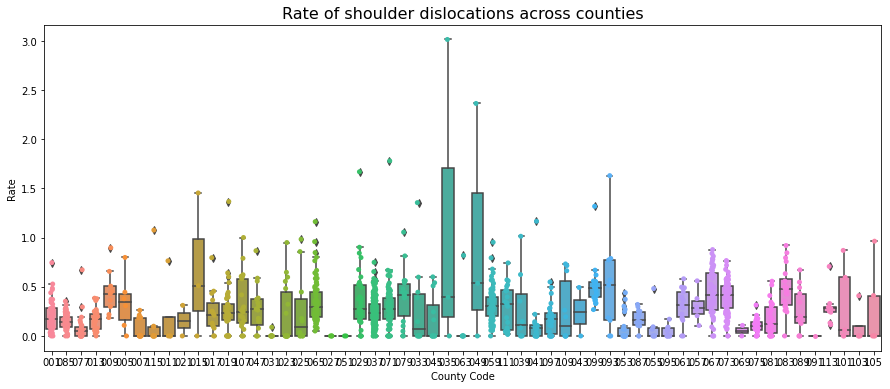

In [328]:
plt.figure(figsize=(15,6))
sns.boxplot(x='County Code', y='rate_Femur_1', data=df_ans)
sns.stripplot(x='County Code', y='rate_Femur_1', data=df_ans)
plt.title('Rate of shoulder dislocations across counties', size=16)
plt.ylabel('Rate')

In [329]:
from statsmodels.formula.api import ols
model = ols('rate_Shoulder_2 ~ C(County)', data=df_ans).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df        F    PR(>F)
C(County)    36.800232    56.0  0.51884  0.998754
Residual   1656.671556  1308.0      NaN       NaN

In [460]:
# No County-Level Fixed Effects Model
# Cluster-Robust CIs

In [461]:
df_results = pd.DataFrame([], columns=['feature', 'rr_mid', 'rr_low', 'rr_high', 'rr', 'p', 'alpha0'])
i = 0

pollution_cols= ['Ozone (100)', 'PM2.5', 'Log Diesel PM', 'Drinking Water (100)', 'Log Pesticides', 'Log Tox. Release', 'Log Traffic']

controls = ['Total Pop', 'pop_density',  'frac_black',
       'frac_hispanic', 'frac_asian', 'frac_other',
        'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 
       'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
       'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k',
       'frac_gt_200k', 'frac_unemployed', 'frac_no_health_insurance',
        'frac_hs', 'frac_some_college', 'frac_college',
       'frac_graduate', 'frac_houses_owner_occupied', 'median_house_price',
       'food_insecurity', 'pct_snap', 'lila_tracts', 'frac_pop_included_in_Optum']

#controls = []

disease = 'IBS'

#diseases = ['FuncDyspep', 'IBS', 'Ulcerative', 'Crohns', 'Esoph', 'Femur', 'Shoulder', 'Asthma']



case_col = 'cases_' + disease + '_1'
offset_col = 'offset_' + disease + '_1'
rate_col = 'rate_' + disease + '_1'

def ct_response(row):
    #“Calculate response observation for Cameron-Trivedi dispersion test”
    y = row[case_col]
    m = row['bev_mu']
    return ((y - m)**2 - y) / m

print('ICD-9')
for feature in pollution_cols:
    
    print(feature)

    df_temp = df_ans[~df_ans[case_col].isna()].copy()
    
    y = df_temp[rate_col]#.clip(upper = np.percentile(df_temp[rate_col], 99)) 
    y_case = df_temp[case_col]
    X = sm.add_constant(df_temp[[feature] + controls])
    X = X.fillna(X.mean())
    
    res = sm.GLM(y_case, X,
        family=sm.families.Poisson(),
        offset = np.log(df_temp[offset_col]) 
    ).fit() 
    

    ct_data = df_temp.copy()
    ct_data['bev_mu'] = res.mu
    ct_data['ct_resp'] = ct_data.apply(ct_response, axis=1)
        # Linear regression of auxiliary formula
    ct_results = smf.ols('ct_resp ~ bev_mu - 1', ct_data).fit()
        # Construct confidence interval for alpha, the coefficient of bev_mu
    alpha_ci95 = ct_results.conf_int(0.05).loc['bev_mu']
    #print('\nC-T dispersion test: alpha = {:5.3f}, 95% CI = ({:5.3f}, {:5.3f})'.format(ct_results.params[0], alpha_ci95.loc[0], alpha_ci95.loc[1]))
    alpha0 = ct_results.params[0]
    
    res = sm.GLM(y_case, X,
        family=sm.families.NegativeBinomial(alpha = alpha0),
        offset = np.log(df_temp[offset_col]) 
    ).fit(use_t = True, cov_type = 'cluster', cov_kwds = {'groups' : df_temp['County Code']}) 

    results_as_html = res.summary().tables[1].as_html()
    temp = pd.read_html(results_as_html, header=0, index_col=0)[0]
    temp = temp[temp.index == feature]
    rr_mid = np.exp(temp['coef']).values[0]
    rr_low = np.exp(temp['[0.025']).values[0]
    rr_high = np.exp(temp['0.975]']).values[0]
    rr = (np.round(np.exp(temp['coef']),3).astype(str) + ' [' + np.round(np.exp(temp['[0.025']),3).astype(str) + ', ' + np.round(np.exp(temp['0.975]']),3).astype(str) + ']' ).values[0]
    p = (temp['P>|t|']).values[0]
    
    df_results.loc[i] = [feature, rr_mid, rr_low, rr_high, rr, p, np.round(alpha0,3)]
    i+=1
    
df_results['era'] = 'ICD-9'
df_icd9 = df_results.copy()


df_results = pd.DataFrame([], columns=['feature', 'rr_mid', 'rr_low', 'rr_high', 'rr', 'p', 'alpha0'])
i = 0

case_col = 'cases_' + disease + '_2'
offset_col = 'offset_' + disease + '_2'
rate_col = 'rate_' + disease + '_2'

print('ICD-10')
for feature in pollution_cols:
    
    print(feature)

    df_temp = df_ans[~df_ans[case_col].isna()].copy()
    
    y = df_temp[rate_col]#.clip(upper = np.percentile(df_temp[rate_col], 99)) 
    y_case = df_temp[case_col]
    X = sm.add_constant(df_temp[[feature] + controls])
    X = X.fillna(X.mean())
    
    res = sm.GLM(y_case, X,
        family=sm.families.Poisson(),
        offset = np.log(df_temp[offset_col]) 
    ).fit()
    

    ct_data = df_temp.copy()
    ct_data['bev_mu'] = res.mu
    ct_data['ct_resp'] = ct_data.apply(ct_response, axis=1)
        # Linear regression of auxiliary formula
    ct_results = smf.ols('ct_resp ~ bev_mu - 1', ct_data).fit()
        # Construct confidence interval for alpha, the coefficient of bev_mu
    alpha_ci95 = ct_results.conf_int(0.05).loc['bev_mu']
    #print('\nC-T dispersion test: alpha = {:5.3f}, 95% CI = ({:5.3f}, {:5.3f})'.format(ct_results.params[0], alpha_ci95.loc[0], alpha_ci95.loc[1]))
    alpha0 = ct_results.params[0]
    
    res = sm.GLM(y_case, X,
        family=sm.families.NegativeBinomial(alpha = alpha0),
        offset = np.log(df_temp[offset_col]) 
    ).fit(use_t = True, cov_type = 'cluster', cov_kwds = {'groups' : df_temp['County Code']}) #.fit() #cov_type = 'HC3') #.

    results_as_html = res.summary().tables[1].as_html()
    temp = pd.read_html(results_as_html, header=0, index_col=0)[0]
    temp = temp[temp.index == feature]
    rr_mid = np.exp(temp['coef']).values[0]
    rr_low = np.exp(temp['[0.025']).values[0]
    rr_high = np.exp(temp['0.975]']).values[0]
    rr = (np.round(np.exp(temp['coef']),3).astype(str) + ' [' + np.round(np.exp(temp['[0.025']),3).astype(str) + ', ' + np.round(np.exp(temp['0.975]']),3).astype(str) + ']' ).values[0]
    p = (temp['P>|t|']).values[0]
    
    df_results.loc[i] = [feature, rr_mid, rr_low, rr_high, rr, p, np.round(alpha0,3)]
    i+=1

df_results['era'] = 'ICD-10'
df_icd10 = df_results.copy()

df_res = pd.merge(df_icd9, df_icd10, on='feature')

ICD-9
Ozone (100)
PM2.5
Log Diesel PM
Drinking Water (100)
Log Pesticides
Log Tox. Release
Log Traffic
ICD-10
Ozone (100)
PM2.5
Log Diesel PM
Drinking Water (100)
Log Pesticides
Log Tox. Release
Log Traffic


In [462]:
df_res[['feature', 'rr_x', 'p_x', 'alpha0_x', 'rr_y', 'p_y', 'alpha0_y']]

feature                  rr_x    p_x  alpha0_x  \
0           Ozone (100)  1.083 [1.034, 1.134]  0.001     0.034   
1                 PM2.5   1.031 [1.01, 1.053]  0.005     0.035   
2         Log Diesel PM  1.076 [1.017, 1.139]  0.012     0.037   
3  Drinking Water (100)    1.017 [1.0, 1.035]  0.045     0.035   
4        Log Pesticides  1.002 [0.988, 1.016]  0.766     0.038   
5      Log Tox. Release   1.04 [1.022, 1.059]  0.000     0.035   
6           Log Traffic  1.032 [0.966, 1.104]  0.348     0.037   

                   rr_y    p_y  alpha0_y  
0  1.011 [0.963, 1.062]  0.653     0.036  
1  1.011 [0.993, 1.028]  0.230     0.036  
2  1.052 [0.997, 1.111]  0.065     0.036  
3  0.996 [0.978, 1.014]  0.658     0.036  
4  0.996 [0.979, 1.012]  0.596     0.036  
5  1.021 [1.001, 1.041]  0.042     0.036  
6  1.032 [0.986, 1.081]  0.175     0.036

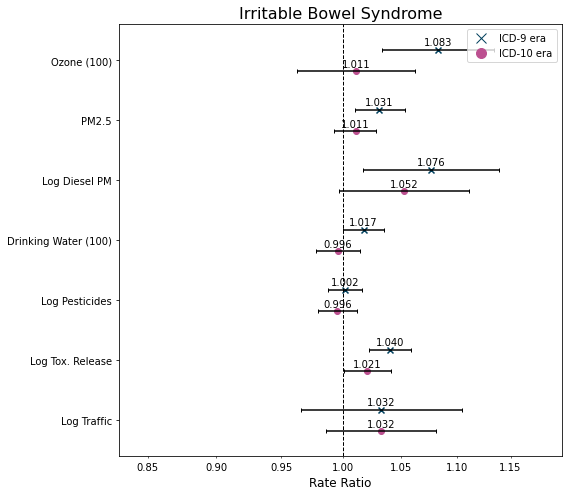

In [463]:
import matplotlib.lines as mlines

fig, ax = plt.subplots(1,1,figsize=(8,7))

err = []
err.append([df_res['rr_mid_x'].values - df_res['rr_low_x'].values, df_res['rr_high_x'].values - df_res['rr_mid_x'].values])
err.append([df_res['rr_mid_y'].values - df_res['rr_low_y'].values, df_res['rr_high_y'].values - df_res['rr_mid_y'].values])

df_res.plot(x='feature', y=['rr_mid_x', 'rr_mid_y'], kind='barh', legend=False, facecolor='none', xerr=err, capsize = 2, width=0.7, ax=ax)

plt.scatter(df_res['rr_mid_x'],  np.array(range(len(df_res)))-0.175, label='ICD-9 Era', color='#003f5c', marker='x')
plt.scatter(df_res['rr_mid_y'],  np.array(range(len(df_res)))+0.175, label='ICD-10 Era', color='#bc5090', marker='o')

plt.axvline(1.0 , color='black', linestyle='--', linewidth=1)

plt.xlim(0.83,1.2)
plt.xlabel('Rate Ratio', fontsize=12)
plt.ylabel('', fontsize=12)

title_lookup = {'FuncDyspep': 'Functional Dyspepsia', 'IBS': 'Irritable Bowel Syndrome', 'Ulcerative': 'Ulcerative Colitis',
               'Crohns': 'Chron\'s Disease', 'Esoph': 'Eosophilic Esophagitis', 'Femur': 'Control: Femur Break',
               'Shoulder': 'Neg. Control: Shoulder Dislocation', 'Asthma': 'Pos. Control: Asthma'}

plt.title(title_lookup[disease], fontsize=16)

plt.xscale('log')
plt.gca().invert_yaxis()

ax = plt.gca()
locs = np.array([0.8, 0.85, 0.9, 0.95, 1. , 1.05, 1.1, 1.15])

ax.xaxis.set_minor_locator(ticker.FixedLocator(locs))
ax.xaxis.set_major_locator(ticker.NullLocator())

ax.xaxis.set_minor_formatter(ticker.ScalarFormatter())

for i in range(len(df_res.rr_mid_x)):
    x = np.array(df_res.rr_mid_x)[i]
    y = i#np.array(df_res['feature'])[i]
    label = "{:.3f}".format(x)
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,15), # distance from text to points (x,y)
                 ha='center')
    
for i in range(len(df_res.rr_mid_y)):
    x = np.array(df_res.rr_mid_y)[i]
    y = i#np.array(df_res['feature'])[i]
    label = "{:.3f}".format(x)
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-7), # distance from text to points (x,y)
                 ha='center')

icd9_dot = mlines.Line2D([], [], color='#003f5c', marker='x', linestyle='None',
                          markersize=10, label='ICD-9 era')
icd10_dot = mlines.Line2D([], [], color='#bc5090', marker='o', linestyle='None',
                          markersize=10, label='ICD-10 era')

plt.legend(handles=[icd9_dot, icd10_dot], loc='upper right')    
    
plt.tight_layout()
plt.savefig('temp.pdf')

In [464]:
# fixed effects model (PRIMARY!)

In [465]:
df_results = pd.DataFrame([], columns=['feature', 'rr_mid', 'rr_low', 'rr_high', 'rr', 'p', 'alpha0'])
i = 0

pollution_cols= ['Ozone (100)', 'PM2.5', 'Log Diesel PM', 'Drinking Water (100)', 'Log Pesticides', 'Log Tox. Release', 'Log Traffic']

controls = ['Total Pop', 'pop_density',  'frac_black',
       'frac_hispanic', 'frac_asian', 'frac_other',
        'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 
       'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
       'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k',
       'frac_gt_200k', 'frac_unemployed', 'frac_no_health_insurance',
        'frac_hs', 'frac_some_college', 'frac_college',
       'frac_graduate', 'frac_houses_owner_occupied', 'median_house_price',
       'food_insecurity', 'pct_snap', 'lila_tracts', 'frac_pop_included_in_Optum']

#controls = []

disease = 'IBS'

#diseases = ['FuncDyspep', 'IBS', 'Ulcerative', 'Crohns', 'Esoph', 'Femur', 'Shoulder', 'Asthma']



case_col = 'cases_' + disease + '_1'
offset_col = 'offset_' + disease + '_1'
rate_col = 'rate_' + disease + '_1'

def ct_response(row):
    #“Calculate response observation for Cameron-Trivedi dispersion test”
    y = row[case_col]
    m = row['bev_mu']
    return ((y - m)**2 - y) / m

print('ICD-9')
for feature in pollution_cols:
    
    print(feature)

    df_temp = df_ans[~df_ans[case_col].isna()].copy()
    
    y = df_temp[rate_col]#.clip(upper = np.percentile(df_temp[rate_col], 99)) 
    y_case = df_temp[case_col]
    X = sm.add_constant(df_temp[[feature] + controls])
    X = X.fillna(X.mean())
    
    X = pd.concat([X, pd.get_dummies(df_temp['County Code']).iloc[:,:-1]], axis=1)
    
    res = sm.GLM(y_case, X,
        family=sm.families.Poisson(),
        offset = np.log(df_temp[offset_col]) 
    ).fit()#cov_type = 'cluster', cov_kwds = {'groups' : df_temp['County']})# (cov_type = 'HC3') #.fit
    

    ct_data = df_temp.copy()
    ct_data['bev_mu'] = res.mu
    ct_data['ct_resp'] = ct_data.apply(ct_response, axis=1)
        # Linear regression of auxiliary formula
    ct_results = smf.ols('ct_resp ~ bev_mu - 1', ct_data).fit()
        # Construct confidence interval for alpha, the coefficient of bev_mu
    alpha_ci95 = ct_results.conf_int(0.05).loc['bev_mu']
    #print('\nC-T dispersion test: alpha = {:5.3f}, 95% CI = ({:5.3f}, {:5.3f})'.format(ct_results.params[0], alpha_ci95.loc[0], alpha_ci95.loc[1]))
    alpha0 = ct_results.params[0]
    
    res = sm.GLM(y_case, X,
        family=sm.families.NegativeBinomial(alpha = alpha0),
        offset = np.log(df_temp[offset_col]) 
    ).fit() 

    results_as_html = res.summary().tables[1].as_html()
    temp = pd.read_html(results_as_html, header=0, index_col=0)[0]
    temp = temp[temp.index == feature]
    rr_mid = np.exp(temp['coef']).values[0]
    rr_low = np.exp(temp['[0.025']).values[0]
    rr_high = np.exp(temp['0.975]']).values[0]
    rr = (np.round(np.exp(temp['coef']),3).astype(str) + ' [' + np.round(np.exp(temp['[0.025']),3).astype(str) + ', ' + np.round(np.exp(temp['0.975]']),3).astype(str) + ']' ).values[0]
    p = (temp['P>|z|']).values[0]
    
    df_results.loc[i] = [feature, rr_mid, rr_low, rr_high, rr, p, np.round(alpha0,3)]
    i+=1
    
df_results['era'] = 'ICD-9'
df_icd9 = df_results.copy()


df_results = pd.DataFrame([], columns=['feature', 'rr_mid', 'rr_low', 'rr_high', 'rr', 'p', 'alpha0'])
i = 0

case_col = 'cases_' + disease + '_2'
offset_col = 'offset_' + disease + '_2'
rate_col = 'rate_' + disease + '_2'

print('ICD-10')
for feature in pollution_cols:
    
    print(feature)

    df_temp = df_ans[~df_ans[case_col].isna()].copy()
    
    y = df_temp[rate_col]#.clip(upper = np.percentile(df_temp[rate_col], 99)) 
    y_case = df_temp[case_col]
    X = sm.add_constant(df_temp[[feature] + controls])
    X = X.fillna(X.mean())
    
    X = pd.concat([X, pd.get_dummies(df_temp['County Code']).iloc[:,:-1]], axis=1)
    
    res = sm.GLM(y_case, X,
        family=sm.families.Poisson(),
        offset = np.log(df_temp[offset_col]) 
    ).fit()#cov_type = 'cluster', cov_kwds = {'groups' : df_temp['County']})# (cov_type = 'HC3') #.fit
    

    ct_data = df_temp.copy()
    ct_data['bev_mu'] = res.mu
    ct_data['ct_resp'] = ct_data.apply(ct_response, axis=1)
        # Linear regression of auxiliary formula
    ct_results = smf.ols('ct_resp ~ bev_mu - 1', ct_data).fit()
        # Construct confidence interval for alpha, the coefficient of bev_mu
    alpha_ci95 = ct_results.conf_int(0.05).loc['bev_mu']
    #print('\nC-T dispersion test: alpha = {:5.3f}, 95% CI = ({:5.3f}, {:5.3f})'.format(ct_results.params[0], alpha_ci95.loc[0], alpha_ci95.loc[1]))
    alpha0 = ct_results.params[0]
    
    res = sm.GLM(y_case, X,
        family=sm.families.NegativeBinomial(alpha = alpha0),
        offset = np.log(df_temp[offset_col]) 
    ).fit() #cov_type = 'cluster', cov_kwds = {'groups' : df_temp['County Code']}) #.fit() #cov_type = 'HC3') #.

    results_as_html = res.summary().tables[1].as_html()
    temp = pd.read_html(results_as_html, header=0, index_col=0)[0]
    temp = temp[temp.index == feature]
    rr_mid = np.exp(temp['coef']).values[0]
    rr_low = np.exp(temp['[0.025']).values[0]
    rr_high = np.exp(temp['0.975]']).values[0]
    rr = (np.round(np.exp(temp['coef']),3).astype(str) + ' [' + np.round(np.exp(temp['[0.025']),3).astype(str) + ', ' + np.round(np.exp(temp['0.975]']),3).astype(str) + ']' ).values[0]
    p = (temp['P>|z|']).values[0]
    
    df_results.loc[i] = [feature, rr_mid, rr_low, rr_high, rr, p, np.round(alpha0,3)]
    i+=1

df_results['era'] = 'ICD-10'
df_icd10 = df_results.copy()

df_res = pd.merge(df_icd9, df_icd10, on='feature')

ICD-9
Ozone (100)
PM2.5
Log Diesel PM
Drinking Water (100)
Log Pesticides
Log Tox. Release
Log Traffic
ICD-10
Ozone (100)
PM2.5
Log Diesel PM
Drinking Water (100)
Log Pesticides
Log Tox. Release
Log Traffic


In [466]:
feature_translate = {'Ozone (100)': 'Ozone Concentration',
                     'PM2.5': 'PM2.5 Concentration',
                     'Log Diesel PM': 'Log Diesel Emissions',
                     'Log Pesticides': 'Log Pesticide Use',
'Drinking Water (100)': 'Drinking Water Contaminants', 
'Log Tox. Release': 'Log Toxic Releases from Facilities',
'Log Traffic': 'Log Traffic Density'}


df_res['feature'].replace(feature_translate, inplace=True)

df_res[['feature', 'rr_x', 'p_x', 'alpha0_x', 'rr_y', 'p_y', 'alpha0_y']]

feature                  rr_x    p_x  alpha0_x  \
0                 Ozone Concentration  1.044 [0.994, 1.096]  0.086     0.027   
1                 PM2.5 Concentration  1.035 [1.022, 1.048]  0.000     0.026   
2                Log Diesel Emissions  1.056 [1.014, 1.099]  0.008     0.027   
3         Drinking Water Contaminants    1.02 [1.009, 1.03]  0.000     0.027   
4                   Log Pesticide Use   0.999 [0.99, 1.009]  0.862     0.028   
5  Log Toxic Releases from Facilities  1.039 [1.025, 1.052]  0.000     0.026   
6                 Log Traffic Density  1.063 [1.025, 1.103]  0.001     0.027   

                   rr_y    p_y  alpha0_y  
0  1.022 [0.971, 1.075]  0.399     0.021  
1  1.026 [1.013, 1.039]  0.000     0.021  
2  1.064 [1.021, 1.107]  0.003     0.021  
3  1.012 [1.001, 1.022]  0.033     0.021  
4  1.004 [0.994, 1.013]  0.464     0.021  
5  1.027 [1.014, 1.041]  0.000     0.020  
6  1.057 [1.018, 1.096]  0.003     0.020

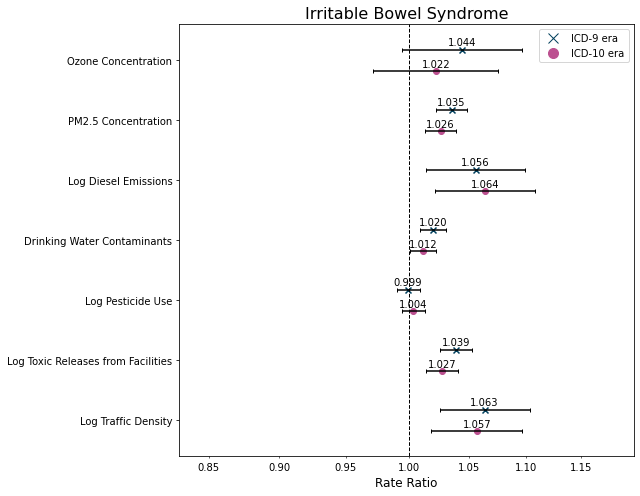

In [467]:
import matplotlib.lines as mlines

fig, ax = plt.subplots(1,1,figsize=(9,7))

err = []
err.append([df_res['rr_mid_x'].values - df_res['rr_low_x'].values, df_res['rr_high_x'].values - df_res['rr_mid_x'].values])
err.append([df_res['rr_mid_y'].values - df_res['rr_low_y'].values, df_res['rr_high_y'].values - df_res['rr_mid_y'].values])

df_res.plot(x='feature', y=['rr_mid_x', 'rr_mid_y'], kind='barh', legend=False, facecolor='none', xerr=err, capsize = 2, width=0.7, ax=ax)

plt.scatter(df_res['rr_mid_x'],  np.array(range(len(df_res)))-0.175, label='ICD-9 Era', color='#003f5c', marker='x')
plt.scatter(df_res['rr_mid_y'],  np.array(range(len(df_res)))+0.175, label='ICD-10 Era', color='#bc5090', marker='o')

plt.axvline(1.0 , color='black', linestyle='--', linewidth=1)

plt.xlim(0.83,1.2)
plt.xlabel('Rate Ratio', fontsize=12)
plt.ylabel('', fontsize=12)

title_lookup = {'FuncDyspep': 'Functional Dyspepsia', 'IBS': 'Irritable Bowel Syndrome', 'Ulcerative': 'Ulcerative Colitis',
               'Crohns': 'Crohn\'s Disease', 'Esoph': 'Eosinophilic Esophagitis', 'Femur': 'Control: Femur Break',
               'Shoulder': 'Neg. Control: Shoulder Dislocation', 'Asthma': 'Pos. Control: Asthma'}

plt.title(title_lookup[disease], fontsize=16)

plt.xscale('log')
plt.gca().invert_yaxis()

ax = plt.gca()
locs = np.array([0.8, 0.85, 0.9, 0.95, 1. , 1.05, 1.1, 1.15])

ax.xaxis.set_minor_locator(ticker.FixedLocator(locs))
ax.xaxis.set_major_locator(ticker.NullLocator())

ax.xaxis.set_minor_formatter(ticker.ScalarFormatter())

for i in range(len(df_res.rr_mid_x)):
    x = np.array(df_res.rr_mid_x)[i]
    y = i#np.array(df_res['feature'])[i]
    label = "{:.3f}".format(x)
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,15), # distance from text to points (x,y)
                 ha='center')
    
for i in range(len(df_res.rr_mid_y)):
    x = np.array(df_res.rr_mid_y)[i]
    y = i#np.array(df_res['feature'])[i]
    label = "{:.3f}".format(x)
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-7), # distance from text to points (x,y)
                 ha='center')

icd9_dot = mlines.Line2D([], [], color='#003f5c', marker='x', linestyle='None',
                          markersize=10, label='ICD-9 era')
icd10_dot = mlines.Line2D([], [], color='#bc5090', marker='o', linestyle='None',
                          markersize=10, label='ICD-10 era')

plt.legend(handles=[icd9_dot, icd10_dot], loc='upper right')    
    
plt.tight_layout()
plt.savefig('temp.pdf')

In [ ]:
#let's do some calculations to make these results a little more interpretable:

In [435]:
#average IBS cases / 100 patient years (ICD-9 era):
df_ans.cases_IBS_1.sum() / df_ans.offset_IBS_1.sum()

0.5442926216042517

In [456]:
# multiply by the rate ratio to get the new rate if the PM2.5 goes up by 1
0.5442926216042517 * 1.035 # 1.035 [1.022, 1.048]   1.039 [1.025, 1.052] 	0.000 	0.026 	1.027 [1.014, 1.041] 	0.000

0.28303216323421093

In [448]:
#how many extra cases would there be in California if PM2.5 went up by 10?
0.5442926216042517 * 0.048  *10 * 39000000 / 100

101891.57876431594

In [449]:
#average IBS cases / 100 patient years (ICD-10 era):
df_ans.cases_IBS_2.sum() / df_ans.offset_IBS_2.sum()

0.5360645848915999

In [459]:
# multiply by the rate ratio to get the new rate if the PM2.5 goes up by 1
0.5360645848915999 * .41

0.21978647980555596

In [452]:
#how many extra cases would there be in California if PM2.5 went up by 10?
0.5442926216042517 * 0.039  *10 * 39000000 / 100   #1.026 [1.013, 1.039]

82786.90774600669

ICD-9 era result: 
    An increase of 10 micrograms / m^3 will increase the rate of IBS from 0.544 cases / 100 patient-years to 0.735 cases / 100 patient-years.  Over the full California population of 39 million, that corresponds to an increase of around 75,000 extra cases of IBD/year.  

In [353]:
#GEE model

In [354]:
ex = sm.cov_struct.Exchangeable()

In [474]:
df_results = pd.DataFrame([], columns=['feature', 'rr_mid', 'rr_low', 'rr_high', 'rr', 'p', 'alpha0'])
i = 0

pollution_cols= ['Ozone (100)', 'PM2.5', 'Log Diesel PM', 'Drinking Water (100)', 'Log Pesticides', 'Log Tox. Release', 'Log Traffic']

controls = ['Total Pop', 'pop_density',  'frac_black',
       'frac_hispanic', 'frac_asian', 'frac_other',
        'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 
       'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
       'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k',
       'frac_gt_200k', 'frac_unemployed', 'frac_no_health_insurance',
        'frac_hs', 'frac_some_college', 'frac_college',
       'frac_graduate', 'frac_houses_owner_occupied', 'median_house_price',
       'food_insecurity', 'pct_snap', 'lila_tracts', 'frac_pop_included_in_Optum']

#controls = []

disease = 'IBS'

#diseases = ['FuncDyspep', 'IBS', 'Ulcerative', 'Crohns', 'Esoph', 'Femur', 'Shoulder', 'Asthma']



case_col = 'cases_' + disease + '_1'
offset_col = 'offset_' + disease + '_1'
rate_col = 'rate_' + disease + '_1'

def ct_response(row):
    #“Calculate response observation for Cameron-Trivedi dispersion test”
    y = row[case_col]
    m = row['bev_mu']
    return ((y - m)**2 - y) / m

print('ICD-9')
for feature in pollution_cols:
    
    print(feature)

    df_temp = df_ans[~df_ans[case_col].isna()].copy()
    
    y = df_temp[rate_col]#.clip(upper = np.percentile(df_temp[rate_col], 99)) 
    y_case = df_temp[case_col]
    X = sm.add_constant(df_temp[[feature] + controls])
    X = X.fillna(X.mean())
    
    res = sm.GLM(y_case, X,
        family=sm.families.Poisson(),
        offset = np.log(df_temp[offset_col]) 
    ).fit()#cov_type = 'cluster', cov_kwds = {'groups' : df_temp['County']})# (cov_type = 'HC3') #.fit
    

    ct_data = df_temp.copy()
    ct_data['bev_mu'] = res.mu
    ct_data['ct_resp'] = ct_data.apply(ct_response, axis=1)
        # Linear regression of auxiliary formula
    ct_results = smf.ols('ct_resp ~ bev_mu - 1', ct_data).fit()
        # Construct confidence interval for alpha, the coefficient of bev_mu
    alpha_ci95 = ct_results.conf_int(0.05).loc['bev_mu']
    #print('\nC-T dispersion test: alpha = {:5.3f}, 95% CI = ({:5.3f}, {:5.3f})'.format(ct_results.params[0], alpha_ci95.loc[0], alpha_ci95.loc[1]))
    alpha0 = ct_results.params[0]
    
    res = sm.GLM(y_case, X,
        family=sm.families.NegativeBinomial(alpha = alpha0),
        offset = np.log(df_temp[offset_col]) 
    ).fit() 
    
    res = sm.GEE( endog=y_case, exog=X, 
                        cov_struct=ex, 
                        groups=df_temp['County'],
                        family=sm.families.NegativeBinomial(alpha = alpha0),
                        offset = np.log(df_temp[offset_col]) ).fit(maxiter=500)

    results_as_html = res.summary().tables[1].as_html()
    temp = pd.read_html(results_as_html, header=0, index_col=0)[0]
    temp = temp[temp.index == feature]
    rr_mid = np.exp(temp['coef']).values[0]
    rr_low = np.exp(temp['[0.025']).values[0]
    rr_high = np.exp(temp['0.975]']).values[0]
    rr = (np.round(np.exp(temp['coef']),3).astype(str) + ' [' + np.round(np.exp(temp['[0.025']),3).astype(str) + ', ' + np.round(np.exp(temp['0.975]']),3).astype(str) + ']' ).values[0]
    p = (temp['P>|z|']).values[0]
    
    df_results.loc[i] = [feature, rr_mid, rr_low, rr_high, rr, p, np.round(alpha0,3)]
    i+=1
    
df_results['era'] = 'ICD-9'
df_icd9 = df_results.copy()


df_results = pd.DataFrame([], columns=['feature', 'rr_mid', 'rr_low', 'rr_high', 'rr', 'p', 'alpha0'])
i = 0

case_col = 'cases_' + disease + '_2'
offset_col = 'offset_' + disease + '_2'
rate_col = 'rate_' + disease + '_2'

print('ICD-10')
for feature in pollution_cols:
    
    print(feature)

    df_temp = df_ans[~df_ans[case_col].isna()].copy()
    
    y = df_temp[rate_col]#.clip(upper = np.percentile(df_temp[rate_col], 99)) 
    y_case = df_temp[case_col]
    X = sm.add_constant(df_temp[[feature] + controls])
    
    res = sm.GLM(y_case, X,
        family=sm.families.Poisson(),
        offset = np.log(df_temp[offset_col]) 
    ).fit()#cov_type = 'cluster', cov_kwds = {'groups' : df_temp['County']})# (cov_type = 'HC3') #.fit
    

    ct_data = df_temp.copy()
    ct_data['bev_mu'] = res.mu
    ct_data['ct_resp'] = ct_data.apply(ct_response, axis=1)
        # Linear regression of auxiliary formula
    ct_results = smf.ols('ct_resp ~ bev_mu - 1', ct_data).fit()
        # Construct confidence interval for alpha, the coefficient of bev_mu
    alpha_ci95 = ct_results.conf_int(0.05).loc['bev_mu']
    #print('\nC-T dispersion test: alpha = {:5.3f}, 95% CI = ({:5.3f}, {:5.3f})'.format(ct_results.params[0], alpha_ci95.loc[0], alpha_ci95.loc[1]))
    alpha0 = ct_results.params[0]
    
    res = sm.GEE( endog=y_case, exog=X, 
                        cov_struct=ex, 
                        groups=df_temp['County'],
                        family=sm.families.NegativeBinomial(alpha = alpha0),
                        offset = np.log(df_temp[offset_col]) ).fit(maxiter=500)

    results_as_html = res.summary().tables[1].as_html()
    temp = pd.read_html(results_as_html, header=0, index_col=0)[0]
    temp = temp[temp.index == feature]
    rr_mid = np.exp(temp['coef']).values[0]
    rr_low = np.exp(temp['[0.025']).values[0]
    rr_high = np.exp(temp['0.975]']).values[0]
    rr = (np.round(np.exp(temp['coef']),3).astype(str) + ' [' + np.round(np.exp(temp['[0.025']),3).astype(str) + ', ' + np.round(np.exp(temp['0.975]']),3).astype(str) + ']' ).values[0]
    p = (temp['P>|z|']).values[0]
    
    df_results.loc[i] = [feature, rr_mid, rr_low, rr_high, rr, p, np.round(alpha0,3)]
    i+=1

df_results['era'] = 'ICD-10'
df_icd10 = df_results.copy()

df_res = pd.merge(df_icd9, df_icd10, on='feature')

ICD-9
Ozone (100)
PM2.5
Log Diesel PM
Drinking Water (100)
Log Pesticides
Log Tox. Release
Log Traffic
ICD-10
Ozone (100)
PM2.5
Log Diesel PM
Drinking Water (100)
Log Pesticides
Log Tox. Release
Log Traffic


In [475]:
df_res[['feature', 'rr_x', 'p_x', 'alpha0_x', 'rr_y', 'p_y', 'alpha0_y']]

feature                  rr_x    p_x  alpha0_x  \
0           Ozone (100)   1.101 [1.05, 1.155]  0.000     0.034   
1                 PM2.5  1.035 [1.019, 1.051]  0.000     0.035   
2         Log Diesel PM  1.069 [1.017, 1.123]  0.008     0.037   
3  Drinking Water (100)  1.022 [1.008, 1.037]  0.003     0.035   
4        Log Pesticides  0.999 [0.986, 1.011]  0.846     0.038   
5      Log Tox. Release   1.042 [1.02, 1.066]  0.000     0.035   
6           Log Traffic  1.053 [1.009, 1.099]  0.017     0.037   

                   rr_y    p_y  alpha0_y  
0  1.048 [0.987, 1.112]  0.123     0.036  
1  1.025 [1.013, 1.038]  0.000     0.036  
2  1.053 [1.008, 1.101]  0.020     0.036  
3   1.01 [0.996, 1.024]  0.160     0.036  
4    1.0 [0.985, 1.015]  0.998     0.036  
5  1.028 [1.005, 1.052]  0.016     0.036  
6   1.038 [0.998, 1.08]  0.066     0.036

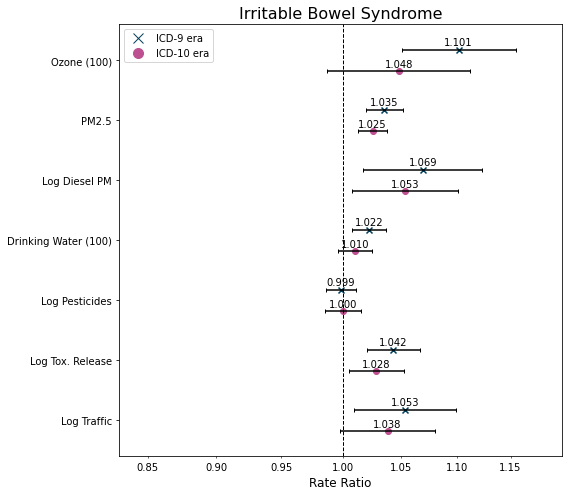

In [477]:
import matplotlib.lines as mlines

fig, ax = plt.subplots(1,1,figsize=(8,7))

err = []
err.append([df_res['rr_mid_x'].values - df_res['rr_low_x'].values, df_res['rr_high_x'].values - df_res['rr_mid_x'].values])
err.append([df_res['rr_mid_y'].values - df_res['rr_low_y'].values, df_res['rr_high_y'].values - df_res['rr_mid_y'].values])

df_res.plot(x='feature', y=['rr_mid_x', 'rr_mid_y'], kind='barh', legend=False, facecolor='none', xerr=err, capsize = 2, width=0.7, ax=ax)

plt.scatter(df_res['rr_mid_x'],  np.array(range(len(df_res)))-0.175, label='ICD-9 Era', color='#003f5c', marker='x')
plt.scatter(df_res['rr_mid_y'],  np.array(range(len(df_res)))+0.175, label='ICD-10 Era', color='#bc5090', marker='o')

plt.axvline(1.0 , color='black', linestyle='--', linewidth=1)

plt.xlim(0.83,1.2)
plt.xlabel('Rate Ratio', fontsize=12)
plt.ylabel('', fontsize=12)

title_lookup = {'FuncDyspep': 'Functional Dyspepsia', 'IBS': 'Irritable Bowel Syndrome', 'Ulcerative': 'Ulcerative Colitis',
               'Crohns': 'Chron\'s Disease', 'Esoph': 'Eosophilic Esophagitis', 'Femur': 'Control: Femur Break',
               'Shoulder': 'Neg. Control: Shoulder Dislocation', 'Asthma': 'Pos. Control: Asthma'}

plt.title(title_lookup[disease], fontsize=16)

plt.xscale('log')
plt.gca().invert_yaxis()

ax = plt.gca()
locs = np.array([0.8, 0.85, 0.9, 0.95, 1. , 1.05, 1.1, 1.15])

ax.xaxis.set_minor_locator(ticker.FixedLocator(locs))
ax.xaxis.set_major_locator(ticker.NullLocator())

ax.xaxis.set_minor_formatter(ticker.ScalarFormatter())

for i in range(len(df_res.rr_mid_x)):
    x = np.array(df_res.rr_mid_x)[i]
    y = i#np.array(df_res['feature'])[i]
    label = "{:.3f}".format(x)
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,15), # distance from text to points (x,y)
                 ha='center')
    
for i in range(len(df_res.rr_mid_y)):
    x = np.array(df_res.rr_mid_y)[i]
    y = i#np.array(df_res['feature'])[i]
    label = "{:.3f}".format(x)
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-7), # distance from text to points (x,y)
                 ha='center')

icd9_dot = mlines.Line2D([], [], color='#003f5c', marker='x', linestyle='None',
                          markersize=10, label='ICD-9 era')
icd10_dot = mlines.Line2D([], [], color='#bc5090', marker='o', linestyle='None',
                          markersize=10, label='ICD-10 era')

plt.legend(handles=[icd9_dot, icd10_dot], loc='upper left')    
    
plt.tight_layout()
plt.savefig('temp.pdf')

In [358]:
# Just county-level fixed effects, no census data at all

In [487]:
df_results = pd.DataFrame([], columns=['feature', 'rr_mid', 'rr_low', 'rr_high', 'rr', 'p', 'alpha0'])
i = 0

pollution_cols= ['Ozone (100)', 'PM2.5', 'Log Diesel PM', 'Drinking Water (100)', 'Log Pesticides', 'Log Tox. Release', 'Log Traffic']

controls = [
            'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
            'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80']

#['Total Pop', 'pop_density',  'frac_black',
#       'frac_hispanic', 'frac_asian', 'frac_other',
#        'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 
#       'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
#       'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k',
#       'frac_gt_200k', 'frac_unemployed', 'frac_no_health_insurance',
#        'frac_hs', 'frac_some_college', 'frac_college',
#       'frac_graduate', 'frac_houses_owner_occupied', 'median_house_price',
#       'food_insecurity', 'pct_snap', 'lila_tracts', 'frac_pop_included_in_Optum']

disease = 'IBS'

#diseases = ['FuncDyspep', 'IBS', 'Ulcerative', 'Crohns', 'Esoph', 'Femur', 'Shoulder', 'Asthma']



case_col = 'cases_' + disease + '_1'
offset_col = 'offset_' + disease + '_1'
rate_col = 'rate_' + disease + '_1'

def ct_response(row):
    #“Calculate response observation for Cameron-Trivedi dispersion test”
    y = row[case_col]
    m = row['bev_mu']
    return ((y - m)**2 - y) / m

print('ICD-9')
for feature in pollution_cols:
    
    print(feature)

    df_temp = df_ans[~df_ans[case_col].isna()].copy()
    
    y = df_temp[rate_col]#.clip(upper = np.percentile(df_temp[rate_col], 99)) 
    y_case = df_temp[case_col]
    X = sm.add_constant(df_temp[[feature] + controls])
    X = X.fillna(X.mean())
    
    X = pd.concat([X, pd.get_dummies(df_temp['County Code']).iloc[:,:-1]], axis=1)
    
    res = sm.GLM(y_case, X,
        family=sm.families.Poisson(),
        offset = np.log(df_temp[offset_col]) 
    ).fit()#cov_type = 'cluster', cov_kwds = {'groups' : df_temp['County']})# (cov_type = 'HC3') #.fit
    

    ct_data = df_temp.copy()
    ct_data['bev_mu'] = res.mu
    ct_data['ct_resp'] = ct_data.apply(ct_response, axis=1)
        # Linear regression of auxiliary formula
    ct_results = smf.ols('ct_resp ~ bev_mu - 1', ct_data).fit()
        # Construct confidence interval for alpha, the coefficient of bev_mu
    alpha_ci95 = ct_results.conf_int(0.05).loc['bev_mu']
    #print('\nC-T dispersion test: alpha = {:5.3f}, 95% CI = ({:5.3f}, {:5.3f})'.format(ct_results.params[0], alpha_ci95.loc[0], alpha_ci95.loc[1]))
    alpha0 = ct_results.params[0]
    
    res = sm.GLM(y_case, X,
        family=sm.families.NegativeBinomial(alpha = alpha0),
        offset = np.log(df_temp[offset_col]) 
    ).fit() 

    results_as_html = res.summary().tables[1].as_html()
    temp = pd.read_html(results_as_html, header=0, index_col=0)[0]
    temp = temp[temp.index == feature]
    rr_mid = np.exp(temp['coef']).values[0]
    rr_low = np.exp(temp['[0.025']).values[0]
    rr_high = np.exp(temp['0.975]']).values[0]
    rr = (np.round(np.exp(temp['coef']),3).astype(str) + ' [' + np.round(np.exp(temp['[0.025']),3).astype(str) + ', ' + np.round(np.exp(temp['0.975]']),3).astype(str) + ']' ).values[0]
    p = (temp['P>|z|']).values[0]
    
    df_results.loc[i] = [feature, rr_mid, rr_low, rr_high, rr, p, np.round(alpha0,3)]
    i+=1
    
df_results['era'] = 'ICD-9'
df_icd9 = df_results.copy()


df_results = pd.DataFrame([], columns=['feature', 'rr_mid', 'rr_low', 'rr_high', 'rr', 'p', 'alpha0'])
i = 0

case_col = 'cases_' + disease + '_2'
offset_col = 'offset_' + disease + '_2'
rate_col = 'rate_' + disease + '_2'

print('ICD-10')
for feature in pollution_cols:
    
    print(feature)

    df_temp = df_ans[~df_ans[case_col].isna()].copy()
    
    y = df_temp[rate_col]#.clip(upper = np.percentile(df_temp[rate_col], 99)) 
    y_case = df_temp[case_col]
    X = sm.add_constant(df_temp[[feature] + controls])
    X = X.fillna(X.mean())
    
    X = pd.concat([X, pd.get_dummies(df_temp['County Code']).iloc[:,:-1]], axis=1)
    
    res = sm.GLM(y_case, X,
        family=sm.families.Poisson(),
        offset = np.log(df_temp[offset_col]) 
    ).fit()#cov_type = 'cluster', cov_kwds = {'groups' : df_temp['County']})# (cov_type = 'HC3') #.fit
    

    ct_data = df_temp.copy()
    ct_data['bev_mu'] = res.mu
    ct_data['ct_resp'] = ct_data.apply(ct_response, axis=1)
        # Linear regression of auxiliary formula
    ct_results = smf.ols('ct_resp ~ bev_mu - 1', ct_data).fit()
        # Construct confidence interval for alpha, the coefficient of bev_mu
    alpha_ci95 = ct_results.conf_int(0.05).loc['bev_mu']
    #print('\nC-T dispersion test: alpha = {:5.3f}, 95% CI = ({:5.3f}, {:5.3f})'.format(ct_results.params[0], alpha_ci95.loc[0], alpha_ci95.loc[1]))
    alpha0 = ct_results.params[0]
    
    res = sm.GLM(y_case, X,
        family=sm.families.NegativeBinomial(alpha = alpha0),
        offset = np.log(df_temp[offset_col]) 
    ).fit() #cov_type = 'cluster', cov_kwds = {'groups' : df_temp['County Code']}) #.fit() #cov_type = 'HC3') #.

    results_as_html = res.summary().tables[1].as_html()
    temp = pd.read_html(results_as_html, header=0, index_col=0)[0]
    temp = temp[temp.index == feature]
    rr_mid = np.exp(temp['coef']).values[0]
    rr_low = np.exp(temp['[0.025']).values[0]
    rr_high = np.exp(temp['0.975]']).values[0]
    rr = (np.round(np.exp(temp['coef']),3).astype(str) + ' [' + np.round(np.exp(temp['[0.025']),3).astype(str) + ', ' + np.round(np.exp(temp['0.975]']),3).astype(str) + ']' ).values[0]
    p = (temp['P>|z|']).values[0]
    
    df_results.loc[i] = [feature, rr_mid, rr_low, rr_high, rr, p, np.round(alpha0,3)]
    i+=1

df_results['era'] = 'ICD-10'
df_icd10 = df_results.copy()

df_res = pd.merge(df_icd9, df_icd10, on='feature')

ICD-9
Ozone (100)
PM2.5
Log Diesel PM
Drinking Water (100)
Log Pesticides
Log Tox. Release
Log Traffic
ICD-10
Ozone (100)
PM2.5
Log Diesel PM
Drinking Water (100)
Log Pesticides
Log Tox. Release
Log Traffic


In [488]:
feature_translate = {'Ozone (100)': 'Ozone Concentration',
                     'PM2.5': 'PM2.5 Concentration',
                     'Log Diesel PM': 'Log Diesel Emissions',
                     'Log Pesticides': 'Log Pesticide Use',
'Drinking Water (100)': 'Drinking Water Contaminants', 
'Log Tox. Release': 'Log Toxic Releases from Facilities',
'Log Traffic': 'Log Traffic Density'}


df_res['feature'].replace(feature_translate, inplace=True)

df_res[['feature', 'rr_x', 'p_x', 'alpha0_x', 'rr_y', 'p_y', 'alpha0_y']]

feature                  rr_x    p_x  alpha0_x  \
0                 Ozone Concentration  0.999 [0.956, 1.044]  0.961     0.032   
1                 PM2.5 Concentration   1.038 [1.026, 1.05]  0.000     0.029   
2                Log Diesel Emissions  1.075 [1.039, 1.113]  0.000     0.030   
3         Drinking Water Contaminants  1.012 [1.002, 1.022]  0.024     0.032   
4                   Log Pesticide Use  0.997 [0.988, 1.006]  0.498     0.032   
5  Log Toxic Releases from Facilities  1.045 [1.033, 1.058]  0.000     0.029   
6                 Log Traffic Density   1.07 [1.034, 1.108]  0.000     0.031   

                   rr_y    p_y  alpha0_y  
0  0.969 [0.926, 1.015]  0.185     0.025  
1  1.034 [1.022, 1.046]  0.000     0.025  
2  1.101 [1.063, 1.141]  0.000     0.024  
3  1.004 [0.994, 1.015]  0.440     0.025  
4   1.001 [0.991, 1.01]  0.871     0.025  
5  1.036 [1.022, 1.049]  0.000     0.024  
6    1.08 [1.042, 1.12]  0.000     0.024

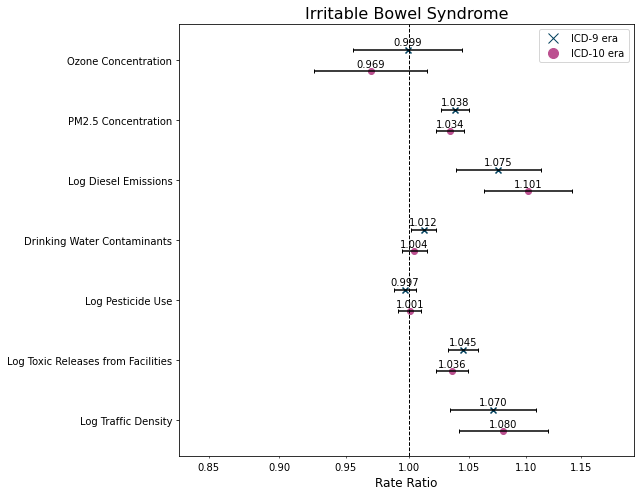

In [489]:
import matplotlib.lines as mlines

fig, ax = plt.subplots(1,1,figsize=(9,7))

err = []
err.append([df_res['rr_mid_x'].values - df_res['rr_low_x'].values, df_res['rr_high_x'].values - df_res['rr_mid_x'].values])
err.append([df_res['rr_mid_y'].values - df_res['rr_low_y'].values, df_res['rr_high_y'].values - df_res['rr_mid_y'].values])

df_res.plot(x='feature', y=['rr_mid_x', 'rr_mid_y'], kind='barh', legend=False, facecolor='none', xerr=err, capsize = 2, width=0.7, ax=ax)

plt.scatter(df_res['rr_mid_x'],  np.array(range(len(df_res)))-0.175, label='ICD-9 Era', color='#003f5c', marker='x')
plt.scatter(df_res['rr_mid_y'],  np.array(range(len(df_res)))+0.175, label='ICD-10 Era', color='#bc5090', marker='o')

plt.axvline(1.0 , color='black', linestyle='--', linewidth=1)

plt.xlim(0.83,1.2)
plt.xlabel('Rate Ratio', fontsize=12)
plt.ylabel('', fontsize=12)

title_lookup = {'FuncDyspep': 'Functional Dyspepsia', 'IBS': 'Irritable Bowel Syndrome', 'Ulcerative': 'Ulcerative Colitis',
               'Crohns': 'Crohn\'s Disease', 'Esoph': 'Eosinophilic Esophagitis', 'Femur': 'Control: Femur Break',
               'Shoulder': 'Neg. Control: Shoulder Dislocation', 'Asthma': 'Pos. Control: Asthma'}

plt.title(title_lookup[disease], fontsize=16)

plt.xscale('log')
plt.gca().invert_yaxis()

ax = plt.gca()
locs = np.array([0.8, 0.85, 0.9, 0.95, 1. , 1.05, 1.1, 1.15])

ax.xaxis.set_minor_locator(ticker.FixedLocator(locs))
ax.xaxis.set_major_locator(ticker.NullLocator())

ax.xaxis.set_minor_formatter(ticker.ScalarFormatter())

for i in range(len(df_res.rr_mid_x)):
    x = np.array(df_res.rr_mid_x)[i]
    y = i#np.array(df_res['feature'])[i]
    label = "{:.3f}".format(x)
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,15), # distance from text to points (x,y)
                 ha='center')
    
for i in range(len(df_res.rr_mid_y)):
    x = np.array(df_res.rr_mid_y)[i]
    y = i#np.array(df_res['feature'])[i]
    label = "{:.3f}".format(x)
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-7), # distance from text to points (x,y)
                 ha='center')

icd9_dot = mlines.Line2D([], [], color='#003f5c', marker='x', linestyle='None',
                          markersize=10, label='ICD-9 era')
icd10_dot = mlines.Line2D([], [], color='#bc5090', marker='o', linestyle='None',
                          markersize=10, label='ICD-10 era')

plt.legend(handles=[icd9_dot, icd10_dot], loc='upper right')    
    
plt.tight_layout()
plt.savefig('temp.pdf')

In [114]:
#make maps

In [362]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import ImageGrid
import us
from shapely.geometry import Point, Polygon

In [417]:
CAshapes = gpd.read_file(us.states.CA.shapefile_urls('zcta'))
CAshapes['zip_int'] = CAshapes.ZCTA5CE10.astype(int)

In [418]:
us.states.CA.shapefile_urls()['tract']

'https://www2.census.gov/geo/tiger/TIGER2010/TRACT/2010/tl_2010_06_tract10.zip'

In [419]:
shapes2 = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_zcta510_500k.zip')

In [420]:
shapes_tract = gpd.read_file(us.states.CA.shapefile_urls()['tract'])

In [421]:
us.states.CA.shapefile_urls()['zcta']

'https://www2.census.gov/geo/tiger/TIGER2010/ZCTA5/2010/tl_2010_06_zcta510.zip'

In [422]:
CAshapes = gpd.read_file(us.states.CA.shapefile_urls()['zcta'])
 

In [423]:
county_shape = gpd.read_file(us.states.CA.shapefile_urls('county'))
ca_shape = gpd.read_file(us.states.CA.shapefile_urls('state'))


In [424]:
df_ans['split_zip'] = df_ans.ZIPCODE_5.str.split('_')
df_temp = df_ans.explode('split_zip')
df_temp['zip_int'] = df_temp.split_zip.astype(int)
shapes2['zip_int'] = shapes2.ZCTA5CE10.astype(int)
#df_temp = pd.merge(CAshapes[['ZCTA5CE10','zip_int', 'geometry']], df_temp, on = 'zip_int', how='left')
df_temp = pd.merge(shapes2[['ZCTA5CE10','zip_int', 'geometry']], df_temp, on = 'zip_int')

In [425]:
shapes_tract['GEOID'] = shapes_tract.GEOID10.astype(int)

In [426]:
df_temp = pd.merge(shapes_tract[['GEOID', 'geometry']], df, on = 'GEOID')

In [427]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

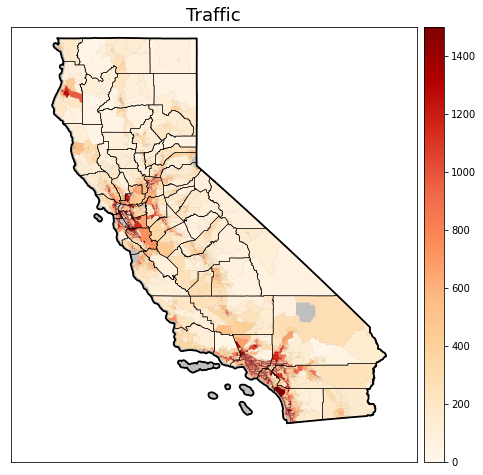

In [428]:
col = 'Traffic'

lookup = {'Ozone': 0.08, 'PM2.5': 18,'Diesel PM': 40, 'Drinking Water':1200, 'Pesticides':3000,
         'Tox. Release': 5000, 'Traffic':1500}

fig, ax = plt.subplots(1,1,figsize=(8,8))

df_temp = df_temp.to_crs(epsg=3857)
ca_shape = ca_shape.to_crs(epsg=3857)
county_shape = county_shape.to_crs(epsg=3857)

ca_shape.plot(color = 'gray', alpha=0.5, ax=ax)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

df_temp.plot(column=col,
             cmap='OrRd',
                legend=True,
                vmin = 0,
                vmax = lookup[col],
                ax=ax,
                cax=cax)

county_shape.boundary.plot(color='k', ax=ax, linewidth= 0.5)
ca_shape.boundary.plot(color='k', ax=ax, linewidth= 1.8)

ax.set_xlim([-1.4e7, -1.26e7])
ax.set_ylim([3.7e6, 5.2e6])

ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])

ax.set_title(col, fontsize=18)
plt.savefig('temp.pdf', dpi=40)

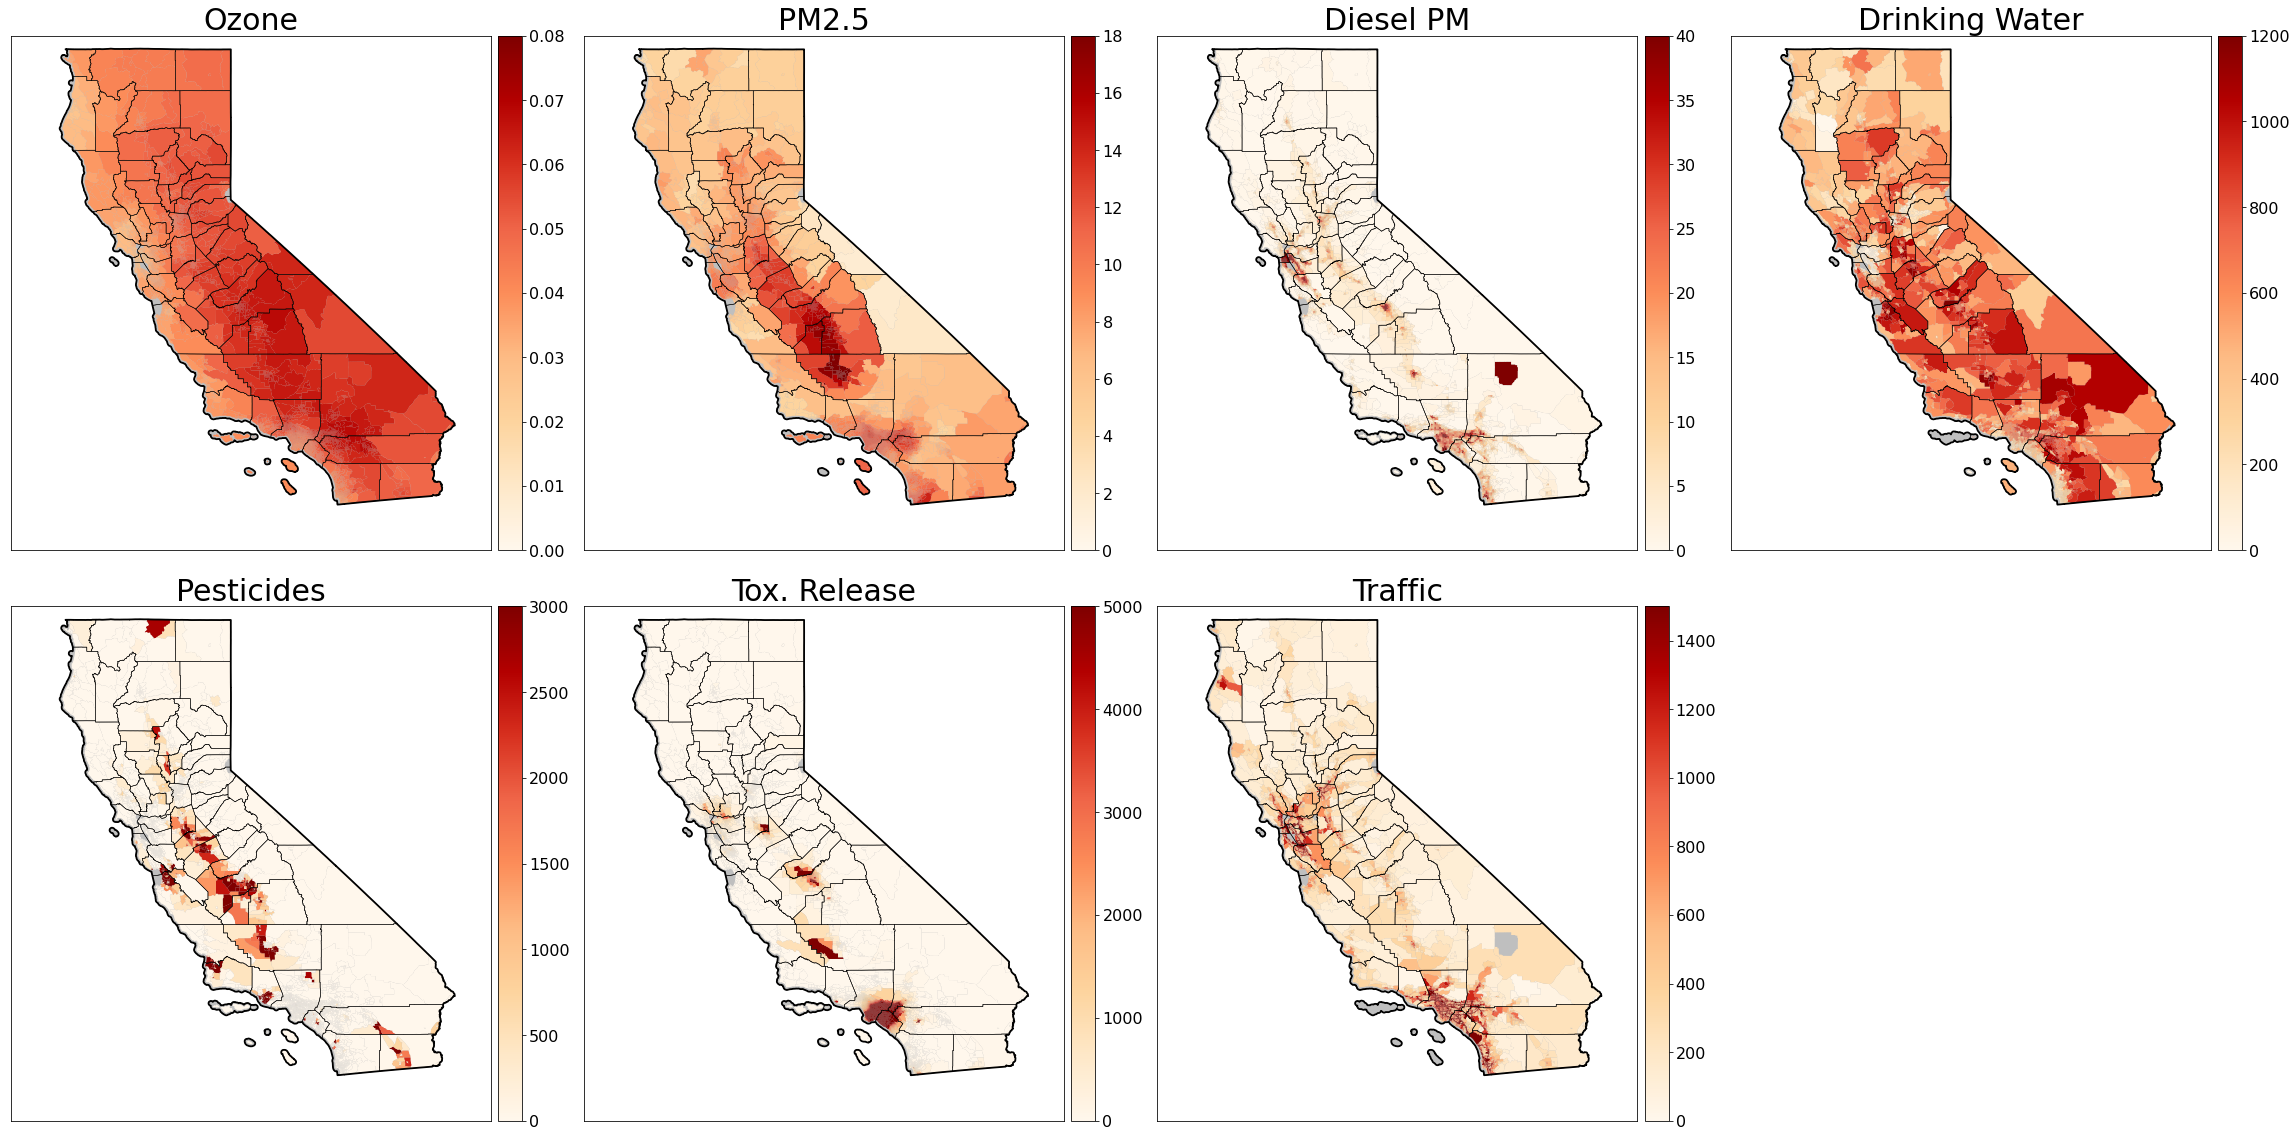

In [429]:
df_temp = df_temp.to_crs(epsg=3857)
ca_shape = ca_shape.to_crs(epsg=3857)
county_shape = county_shape.to_crs(epsg=3857)

lookup = {'Ozone': 0.08, 'PM2.5': 18,'Diesel PM': 40, 'Drinking Water':1200, 'Pesticides':3000,
         'Tox. Release': 5000, 'Traffic':1500}

def make_map_enviro(col, ax):

    lookup = {'Ozone': 0.08, 'PM2.5': 18,'Diesel PM': 40, 'Drinking Water':1200, 'Pesticides':3000,
         'Tox. Release': 5000, 'Traffic':1500}

    ca_shape.plot(color = 'gray', alpha=0.5, ax=ax)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    df_temp.plot(column=col,
             cmap='OrRd',
                legend=True,
                vmin = 0,
                vmax = lookup[col],
                ax=ax,
                cax=cax)

    county_shape.boundary.plot(color='k', ax=ax, linewidth= 0.5)
    ca_shape.boundary.plot(color='k', ax=ax, linewidth= 1.8)

    ax.set_xlim([-1.4e7, -1.26e7])
    ax.set_ylim([3.7e6, 5.2e6])
    
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    ax.set_title(col, fontsize=30)
    
    cax.tick_params(labelsize=16)


fig, axes = plt.subplots(2,4,figsize=(4*8,2*8))
for i in range(len(lookup)):
    make_map_enviro(list(lookup.keys())[i], axes[(i)//4,np.mod(i,4)])
    
axes[1,3].set_axis_off()

plt.tight_layout()
    
plt.savefig('enviro_maps.jpg', dpi=200)

In [162]:
#roll down to census tract level

In [392]:
df_crosswalk_2 = pd.read_excel('ZIP_TRACT_092019.xlsx')

In [393]:
df_ans['split_zip'] = df_ans.ZIPCODE_5.str.split('_')
df_temp = df_ans.explode('split_zip')
df_temp['zip_int'] = df_temp.split_zip.astype(int)

df_temp=pd.merge(df_temp, df_crosswalk_2[['tract', 'zip', 'res_ratio']], left_on = 'zip_int', right_on = 'zip')

In [394]:
df_temp

ZIPCODE_5     Total Pop  Square Miles  frac_white  frac_black  \
0         94545  32723.470236     20.568979    0.148432    0.083812   
1         94545  32723.470236     20.568979    0.148432    0.083812   
2         94545  32723.470236     20.568979    0.148432    0.083812   
3         94545  32723.470236     20.568979    0.148432    0.083812   
4         94545  32723.470236     20.568979    0.148432    0.083812   
...         ...           ...           ...         ...         ...   
14390     95961  27651.416222     46.083265    0.454899    0.021208   
14391     95961  27651.416222     46.083265    0.454899    0.021208   
14392     95961  27651.416222     46.083265    0.454899    0.021208   
14393     95961  27651.416222     46.083265    0.454899    0.021208   
14394     95903   1613.716284     35.784901    0.539264    0.084663   

       frac_hispanic  frac_asian  frac_other  frac_under_18  frac_18_to_40  \
0           0.320684    0.359156    0.087916       0.198559       0.319729   
1           0.320684    0.359156    0.087916       0.198559       0.319729   
2           0.320684    0.359156    0.087916       0.198559       0.319729   
3           0.320684    0.359156    0.087916       0.198559       0.319729   
4           0.320684    0.359156    0.087916       0.198559       0.319729   
...              ...         ...         ...            ...            ...   
14390       0.382287    0.068029    0.073576       0.300946       0.315165   
14391       0.382287    0.068029    0.073576       0.300946       0.315165   
14392       0.382287    0.068029    0.073576       0.300946       0.315165   
14393       0.382287    0.068029    0.073576       0.300946       0.315165   
14394       0.218405    0.064417    0.093252       0.246012       0.706748   

       ...  Log Pesticides  Log Tox. Release  Log Traffic  \
0      ...        0.000000          6.603354     7.333069   
1      ...        0.000000          6.603354     7.333069   
2      ...        0.000000          6.603354     7.333069   
3      ...        0.000000          6.603354     7.333069   
4      ...        0.000000          6.603354     7.333069   
...    ...             ...               ...          ...   
14390  ...        5.330286          1.012846     5.876049   
14391  ...        5.330286          1.012846     5.876049   
14392  ...        5.330286          1.012846     5.876049   
14393  ...        5.330286          1.012846     5.876049   
14394  ...        1.137287          0.357635     4.735584   

       Drinking Water (100)  Ozone (100)  split_zip  zip_int       tract  \
0                  1.021077     3.253239      94545    94545  6001438300   
1                  1.021077     3.253239      94545    94545  6001437300   
2                  1.021077     3.253239      94545    94545  6001436900   
3                  1.021077     3.253239      94545    94545  6001436800   
4                  1.021077     3.253239      94545    94545  6001437200   
...                     ...          ...        ...      ...         ...   
14390              7.533819     4.831085      95961    95961  6115040500   
14391              7.533819     4.831085      95961    95961  6115040700   
14392              7.533819     4.831085      95961    95961  6115040600   
14393              7.533819     4.831085      95961    95961  6115040400   
14394              2.445280     5.124264      95903    95903  6115040902   

         zip  res_ratio  
0      94545   0.084099  
1      94545   0.085449  
2      94545   0.000180  
3      94545   0.093283  
4      94545   0.243202  
...      ...        ...  
14390  95961   0.215070  
14391  95961   0.421551  
14392  95961   0.181247  
14393  95961   0.182132  
14394  95903   1.000000  

[14395 rows x 101 columns]

In [395]:
weighted_average_metrics = ['rate_FuncDyspep_1',
       'rate_IBS_1',
       'rate_Ulcerative_1',
      'rate_Crohns_1',
       'rate_Esoph_1',
                            'rate_Shoulder_1', 
       'rate_FuncDyspep_2', 
       'rate_IBS_2', 'rate_Ulcerative_2',
       'rate_Crohns_2',
       'rate_Esoph_2', 'rate_Shoulder_2']


def weighted_avg(group, column, weight):
    x = group[column]
    w = group[weight]
    return (x * w).sum() /  w.sum()

df_unroll = pd.DataFrame(df_temp.tract.unique(), columns = ['tract'])

for column in weighted_average_metrics:
    df_unroll = pd.merge(df_unroll, pd.DataFrame(df_temp.groupby('tract').apply(weighted_avg, column, 'res_ratio'), 
                               columns = [column]), on='tract')


In [396]:
df_unroll

tract  rate_FuncDyspep_1  rate_IBS_1  rate_Ulcerative_1  \
0     6001438300           0.672907    0.384254           0.127815   
1     6001437300           0.929841    0.394015           0.058165   
2     6001436900           0.578232    0.489587           0.233494   
3     6001436800           0.929218    0.393992           0.058334   
4     6001437200           0.672907    0.384254           0.127815   
...          ...                ...         ...                ...   
8017  6113011001           0.410150    0.411395           0.097471   
8018  6113011203           0.410150    0.411395           0.097471   
8019  6113010901           0.410150    0.411395           0.097471   
8020  6113011002           0.410150    0.411395           0.097471   
8021  6115040400           0.303772    0.300677           0.099297   

      rate_Crohns_1  rate_Esoph_1  rate_Shoulder_1  rate_FuncDyspep_2  \
0          0.050805      0.000000         0.101605           0.538801   
1          0.064102      0.012000         0.092338           0.614356   
2          0.101854      0.014466         0.058201           0.516721   
3          0.064070      0.011971         0.092360           0.614173   
4          0.050805      0.000000         0.101605           0.538801   
...             ...           ...              ...                ...   
8017       0.038836      0.019406         0.233854           0.220738   
8018       0.038836      0.019406         0.233854           0.220738   
8019       0.038836      0.019406         0.233854           0.220738   
8020       0.038836      0.019406         0.233854           0.220738   
8021       0.000000      0.098953         0.099206           0.112644   

      rate_IBS_2  rate_Ulcerative_2  rate_Crohns_2  rate_Esoph_2  \
0       0.237924           0.206029       0.029366      0.058565   
1       0.527890           0.161477       0.068247      0.004610   
2       0.331821           0.049276       0.081442      0.016292   
3       0.527187           0.161585       0.068153      0.004741   
4       0.237924           0.206029       0.029366      0.058565   
...          ...                ...            ...           ...   
8017    0.552010           0.092425       0.046051      0.034459   
8018    0.552010           0.092425       0.046051      0.034459   
8019    0.552010           0.092425       0.046051      0.034459   
8020    0.552010           0.092425       0.046051      0.034459   
8021    0.448472           0.110752       0.000000      0.000000   

      rate_Shoulder_2  
0            0.413915  
1            0.485432  
2            0.377200  
3            0.485258  
4            0.413915  
...               ...  
8017         0.546681  
8018         0.546681  
8019         0.546681  
8020         0.546681  
8021         0.222346  

[8022 rows x 13 columns]

In [397]:
shapes_tract['GEOID'] = shapes_tract.GEOID10.astype(int)
df_temp_2 = pd.merge(shapes_tract[['GEOID', 'geometry']], df_unroll, left_on = 'GEOID', right_on='tract')

In [398]:
df_temp_2.columns

Index(['GEOID', 'geometry', 'tract', 'rate_FuncDyspep_1', 'rate_IBS_1',
       'rate_Ulcerative_1', 'rate_Crohns_1', 'rate_Esoph_1', 'rate_Shoulder_1',
       'rate_FuncDyspep_2', 'rate_IBS_2', 'rate_Ulcerative_2', 'rate_Crohns_2',
       'rate_Esoph_2', 'rate_Shoulder_2'],
      dtype='object')

Text(0.5, 1.0, 'Eosophilic Esophagitis (ICD-9)')

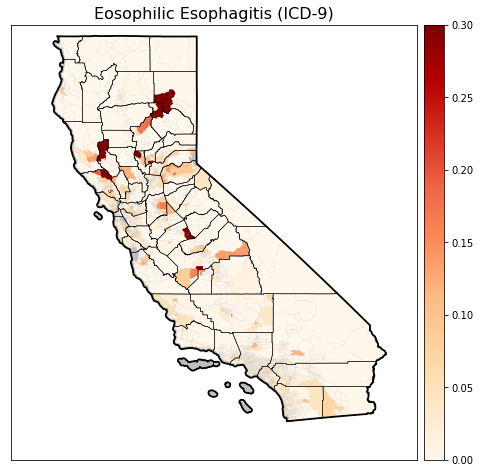

In [412]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

lookup = {'rate_FuncDyspep_1': 3, 'rate_IBS_1': 2.5,'rate_Ulcerative_1': 1.2, 
          'rate_Crohns_1':1.5, 'rate_Esoph_1':0.3, 'rate_Shoulder_1': 2}

lookup_name = {'rate_FuncDyspep_1': 'Functional Dyspepsia', 'rate_IBS_1': 'IBS','rate_Ulcerative_1': 'Ulcerative Colitis', 
          'rate_Crohns_1': 'Crohn\'s', 'rate_Esoph_1': 'Eosophilic Esophagitis', 'rate_Shoulder_1': 'Neg. Cont.: Shoulder Dislocation'}

df_temp_2 = df_temp_2.to_crs(epsg=3857)
ca_shape = ca_shape.to_crs(epsg=3857)
county_shape = county_shape.to_crs(epsg=3857)

col='rate_Esoph_1'


ca_shape.plot(color = 'gray', alpha=0.5, ax=ax)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

df_temp_2.plot(column=col,
             cmap='OrRd',
                legend=True,
                vmax = lookup[col],
                                           ax=ax, cax=cax)
cax.tick_params(labelsize=10)

county_shape.boundary.plot(color='k', ax=ax, linewidth= 0.5)
ca_shape.boundary.plot(color='k', ax=ax, linewidth= 1.8)

ax.set_xlim([-1.4e7, -1.26e7])
ax.set_ylim([3.7e6, 5.2e6])
    
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
    

ax.set_title(lookup_name[col] + ' (ICD-9)', fontsize = 16)

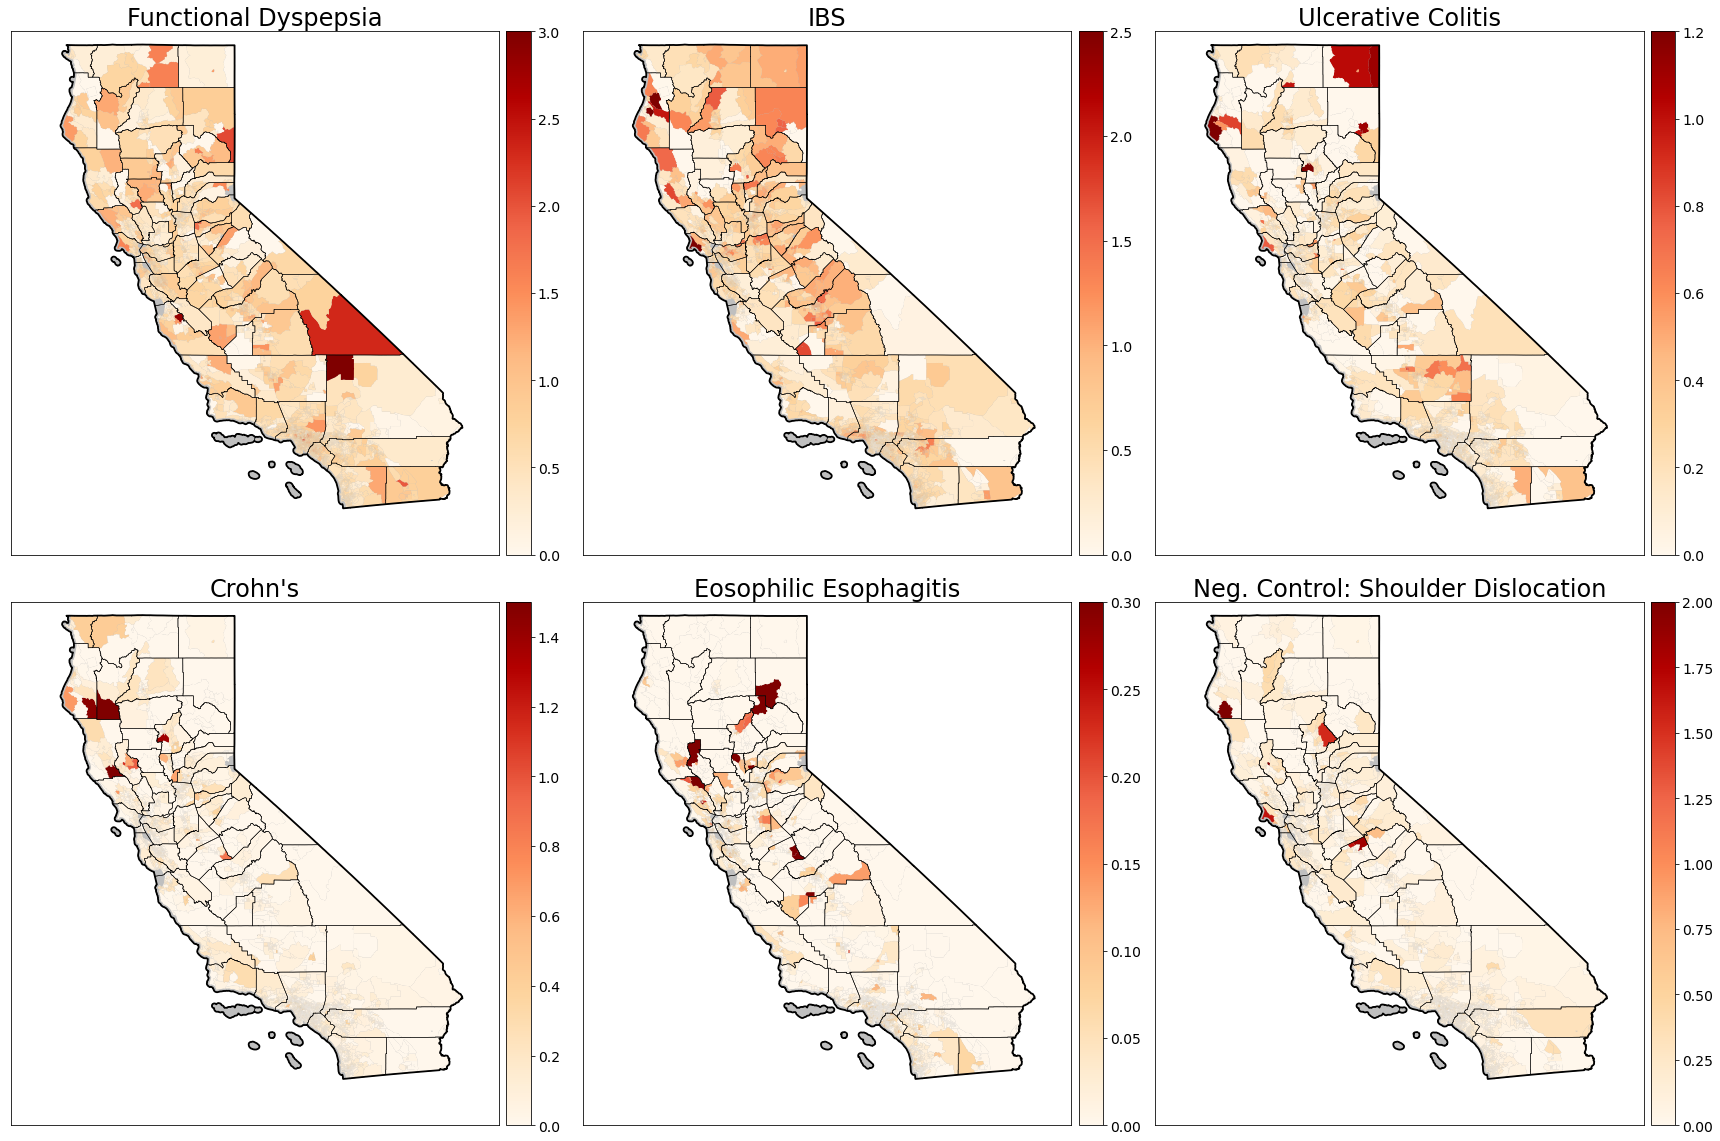

In [414]:
df_temp_2 = df_temp_2.to_crs(epsg=3857)
ca_shape = ca_shape.to_crs(epsg=3857)
county_shape = county_shape.to_crs(epsg=3857)

lookup = {'rate_FuncDyspep_1': 3, 'rate_IBS_1': 2.5,'rate_Ulcerative_1': 1.2, 
          'rate_Crohns_1':1.5, 'rate_Esoph_1':0.3, 'rate_Shoulder_1': 2}

lookup_name = {'rate_FuncDyspep_1': 'Functional Dyspepsia', 'rate_IBS_1': 'IBS','rate_Ulcerative_1': 'Ulcerative Colitis', 
          'rate_Crohns_1': 'Crohn\'s', 'rate_Esoph_1': 'Eosophilic Esophagitis', 'rate_Shoulder_1': 'Neg. Control: Shoulder Dislocation'}

def make_map_disease(col, ax):

    ca_shape.plot(color = 'gray', alpha=0.5, ax=ax)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    df_temp_2.plot(column=col,
             cmap='OrRd',
                legend=True,
                vmin = 0,
                vmax = lookup[col],
                ax=ax,
                cax=cax)

    county_shape.boundary.plot(color='k', ax=ax, linewidth= 0.5)
    ca_shape.boundary.plot(color='k', ax=ax, linewidth= 1.8)

    ax.set_xlim([-1.4e7, -1.26e7])
    ax.set_ylim([3.7e6, 5.2e6])
    
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    ax.set_title(lookup_name[col], fontsize=24)
    
    cax.tick_params(labelsize=14)


fig, axes = plt.subplots(2,3,figsize=(3*8,2*8))
for i in range(len(lookup)):
    make_map_disease(list(lookup.keys())[i], axes[(i)//3,np.mod(i,3)])
    


plt.tight_layout()
    
plt.savefig('disease_maps_icd9.jpg', dpi=200)

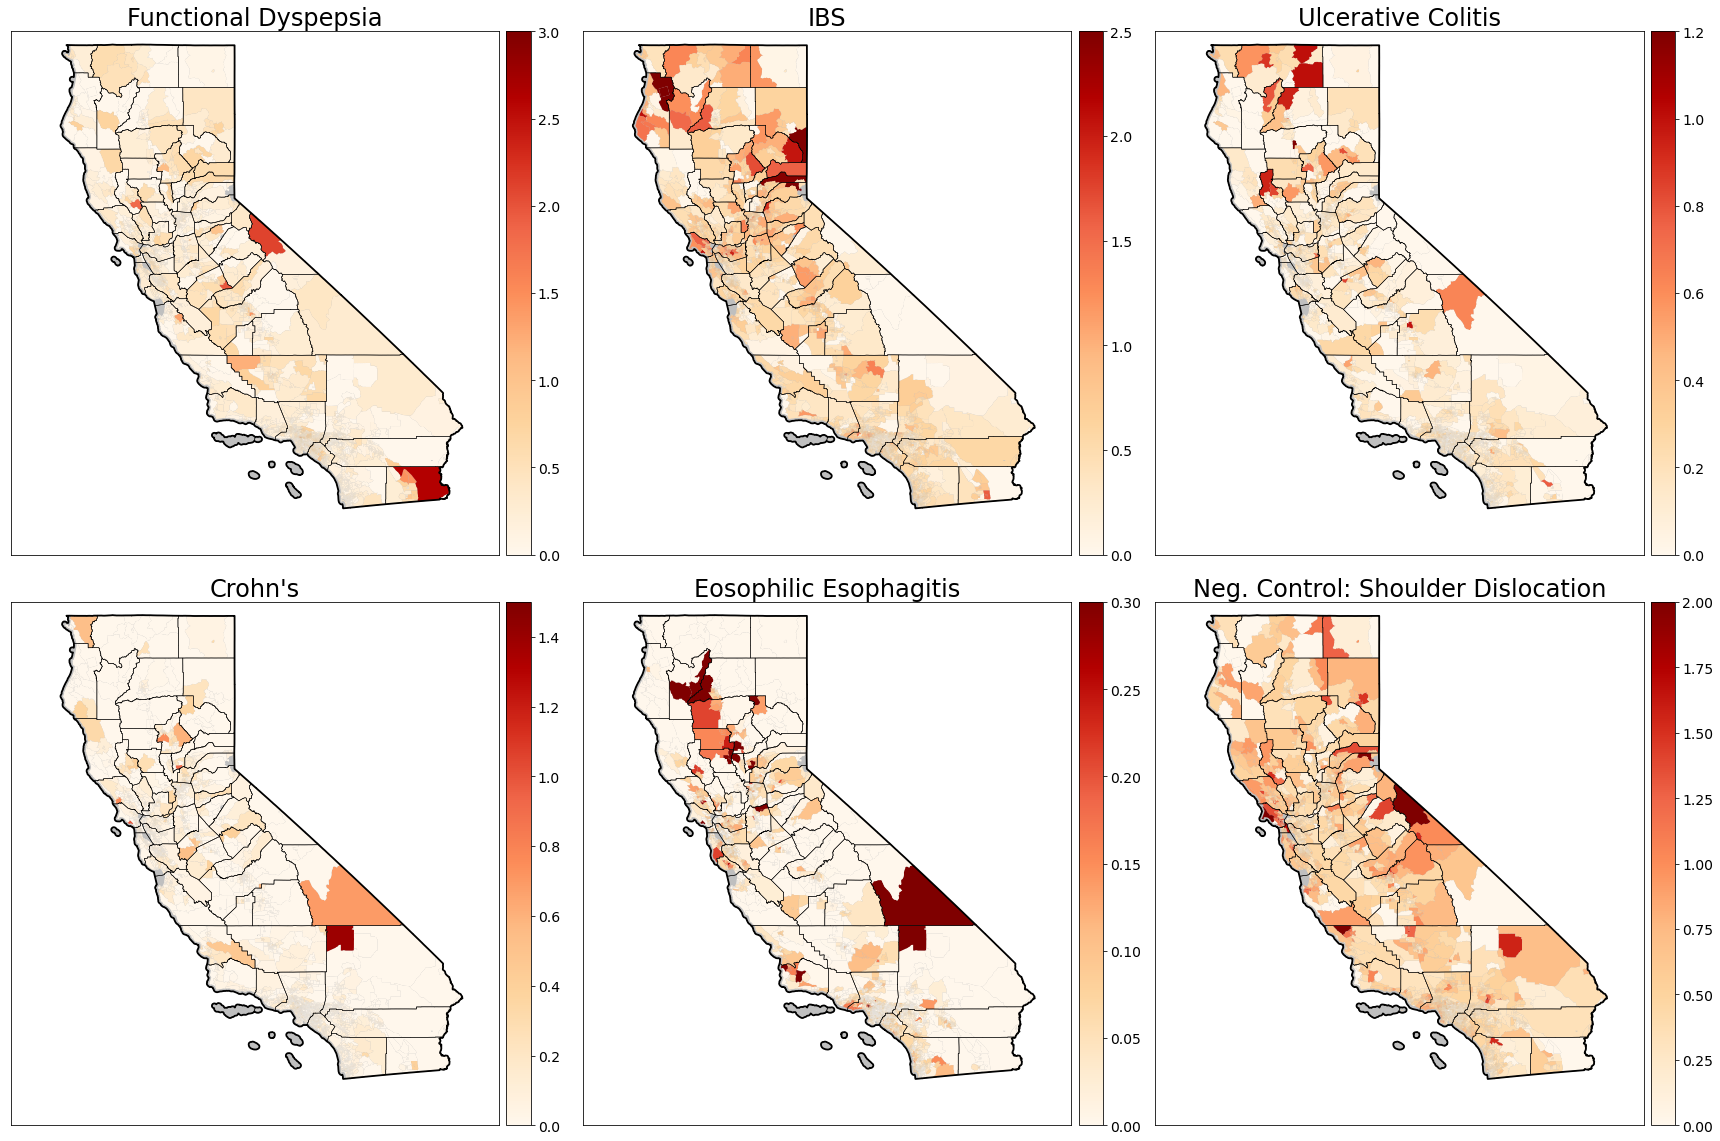

In [415]:
df_temp_2 = df_temp_2.to_crs(epsg=3857)
ca_shape = ca_shape.to_crs(epsg=3857)
county_shape = county_shape.to_crs(epsg=3857)

lookup = {'rate_FuncDyspep_2': 3, 'rate_IBS_2': 2.5,'rate_Ulcerative_2': 1.2, 
          'rate_Crohns_2':1.5, 'rate_Esoph_2':0.3, 'rate_Shoulder_2': 2}

lookup_name = {'rate_FuncDyspep_2': 'Functional Dyspepsia', 'rate_IBS_2': 'IBS','rate_Ulcerative_2': 'Ulcerative Colitis', 
          'rate_Crohns_2': 'Crohn\'s', 'rate_Esoph_2': 'Eosophilic Esophagitis', 'rate_Shoulder_2': 'Neg. Control: Shoulder Dislocation'}


fig, axes = plt.subplots(2,3,figsize=(3*8,2*8))
for i in range(len(lookup)):
    make_map_disease(list(lookup.keys())[i], axes[(i)//3,np.mod(i,3)])
    


plt.tight_layout()
    
plt.savefig('disease_maps_icd10.jpg', dpi=200)

In [ ]:
# table 1

In [540]:
df_ans[['frac_white', 'frac_black',
       'frac_hispanic', 'frac_asian', 'frac_other', 'frac_lt_15k',
       'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
       'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k',
       'frac_gt_200k', 'frac_unemployed', 'frac_no_health_insurance',
       'frac_lt_hs', 'frac_hs', 'frac_some_college', 'frac_college',
       'frac_graduate', 'frac_houses_owner_occupied', 'median_house_price',
       'food_insecurity', 'pct_snap', 'lila_tracts']].apply(lambda x: np.average(x,weights=df_ans['Total Pop']))

frac_white                         0.377990
frac_black                         0.055223
frac_hispanic                      0.388719
frac_asian                         0.138806
frac_other                         0.039262
frac_lt_15k                        0.094391
frac_15k_to_30k                    0.122110
frac_30k_to_45k                    0.118027
frac_45k_to_60k                    0.103908
frac_60k_to_100k                   0.215389
frac_100k_to_125k                  0.093867
frac_125k_to_200k                  0.147861
frac_gt_200k                       0.102326
frac_unemployed                    0.069664
frac_no_health_insurance           0.119497
frac_lt_hs                         0.181030
frac_hs                            0.209725
frac_some_college                  0.290740
frac_college                       0.199370
frac_graduate                      0.119049
frac_houses_owner_occupied         0.554777
median_house_price            525880.164824
food_insecurity                 

In [539]:
df_ans[~df_ans.Optum_pop.isna()][['frac_white', 'frac_black',
       'frac_hispanic', 'frac_asian', 'frac_other', 'frac_lt_15k',
       'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
       'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k',
       'frac_gt_200k', 'frac_unemployed', 'frac_no_health_insurance',
       'frac_lt_hs', 'frac_hs', 'frac_some_college', 'frac_college',
       'frac_graduate', 'frac_houses_owner_occupied', 'median_house_price',
       'food_insecurity', 'pct_snap', 'lila_tracts']].apply(lambda x: np.average(x,weights=df_ans[~df_ans.Optum_pop.isna()]['Optum_pop']))

frac_white                         0.431527
frac_black                         0.045956
frac_hispanic                      0.325754
frac_asian                         0.155900
frac_other                         0.040862
frac_lt_15k                        0.082290
frac_15k_to_30k                    0.106577
frac_30k_to_45k                    0.105877
frac_45k_to_60k                    0.096219
frac_60k_to_100k                   0.210897
frac_100k_to_125k                  0.098158
frac_125k_to_200k                  0.166053
frac_gt_200k                       0.132597
frac_unemployed                    0.062892
frac_no_health_insurance           0.102123
frac_lt_hs                         0.141335
frac_hs                            0.191267
frac_some_college                  0.288700
frac_college                       0.229642
frac_graduate                      0.148979
frac_houses_owner_occupied         0.585318
median_house_price            616449.070763
food_insecurity                 

In [523]:
df_ans[['frac_white', 'frac_black',
       'frac_hispanic', 'frac_asian', 'frac_other', 'frac_lt_15k',
       'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
       'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k',
       'frac_gt_200k', 'frac_unemployed', 'frac_no_health_insurance',
       'frac_lt_hs', 'frac_hs', 'frac_some_college', 'frac_college',
       'frac_graduate', 'frac_houses_owner_occupied', 'median_house_price',
       'food_insecurity', 'pct_snap', 'lila_tracts']].apply(lambda x: np.average(x,weights=df_ans['cases_Crohns_1']))

frac_white                         0.467920
frac_black                         0.045248
frac_hispanic                      0.300675
frac_asian                         0.143812
frac_other                         0.042346
frac_lt_15k                        0.081786
frac_15k_to_30k                    0.104756
frac_30k_to_45k                    0.104329
frac_45k_to_60k                    0.095678
frac_60k_to_100k                   0.211824
frac_100k_to_125k                  0.099220
frac_125k_to_200k                  0.167527
frac_gt_200k                       0.133549
frac_unemployed                    0.062443
frac_no_health_insurance           0.098802
frac_lt_hs                         0.128939
frac_hs                            0.187298
frac_some_college                  0.293699
frac_college                       0.237147
frac_graduate                      0.152757
frac_houses_owner_occupied         0.584498
median_house_price            623212.595395
food_insecurity                 